# Library version 1.0 tests

In [2]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import unsupervised_library as unsuplib

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
unsup_datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Regression

In [2]:
# load data
csvname = datapath + 'universal_regression_samples_0.csv'
# csvname = datapath + 'universal_regression_function.csv'
# csvname = datapath + 'discrete_function.csv'
# csvname = datapath + 'universal_regression_function.csv'

csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
# ind = list(np.random.permutation(data.shape[1])[:50])

<IPython.core.display.Javascript object>


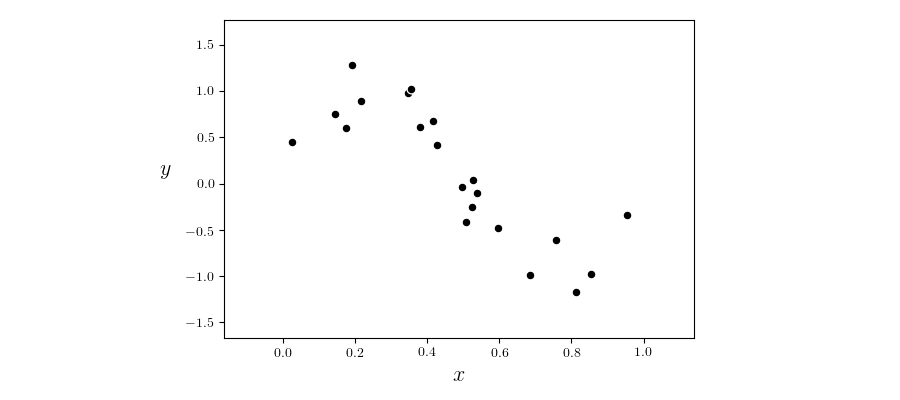

In [86]:
# x = data[:-1,ind]
# y = data[-1:,ind] + np.random.randn(1,len(ind))
# data = np.vstack((x,y))

# plot dataset
demo = regress_plotter.Visualizer(data)
demo.plot_data()

<IPython.core.display.Javascript object>


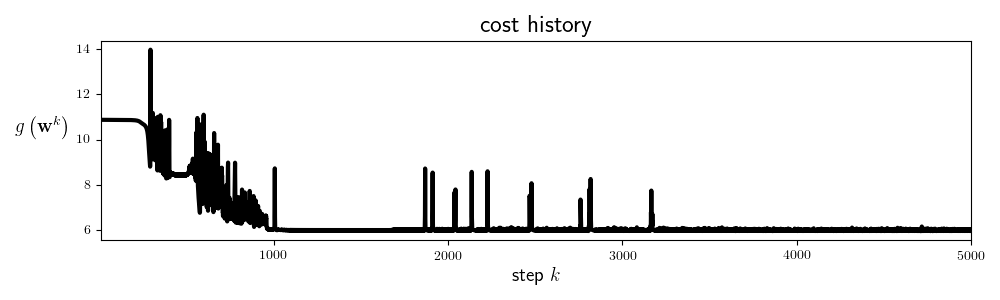

In [71]:
csvname = datapath + 'universal_regression_samples_0.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [1,10,10,10,10,10,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 5000,alpha_choice = 10**(-1))

# plot cost history
mylib.show_histories(start = 10)

<IPython.core.display.Javascript object>


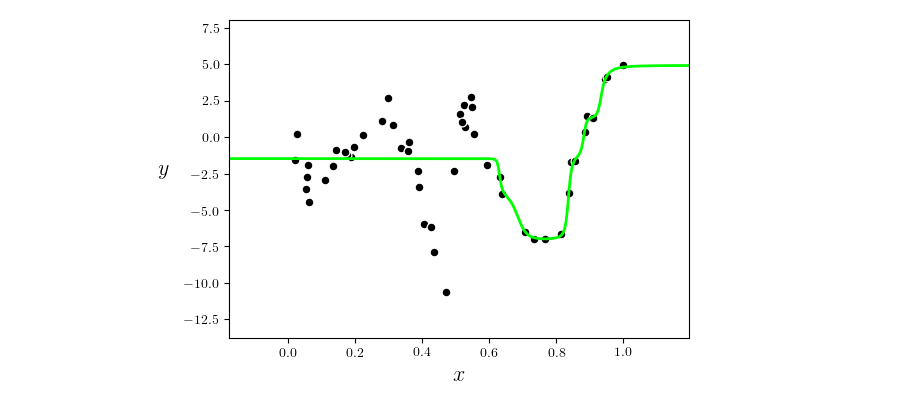

In [72]:
# plot dataset
demo = regress_plotter.Visualizer(data)

# and plot resulting fit
ind = np.argmin(mylib.cost_histories[0])
w_best = mylib.weight_histories[0][ind]
demo.plot_fit(w_best,mylib.model,normalizer = mylib.normalizer);

In [88]:
import itertools
N = x.shape[0]
D = 10
degs = np.array(list(itertools.product(list(np.arange(D+1)), repeat = N)))
b = np.sum(degs,axis = 1)
ind = np.argwhere(b <= D)
ind = [v[0] for v in ind]
degs = degs[ind,:]     
degs = degs[1:,:]

In [89]:
x_transformed = np.array([np.prod(x**v,axis = 0)[:,np.newaxis] for v in degs])[:,:,0]

In [95]:
blah = mylib.initializer()

In [98]:
y.shape

(1, 50)

In [91]:
f = np.array([(x.flatten()**d) for d in range(1,11)])   


In [92]:
np.linalg.norm(x_transformed - f,'fro')

0.0

<IPython.core.display.Javascript object>


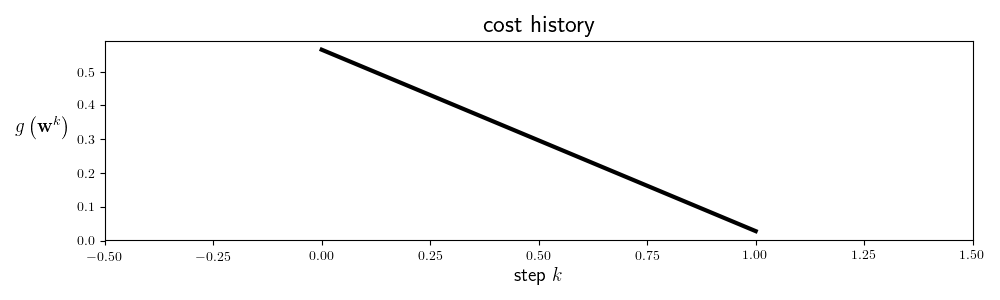

<IPython.core.display.Javascript object>


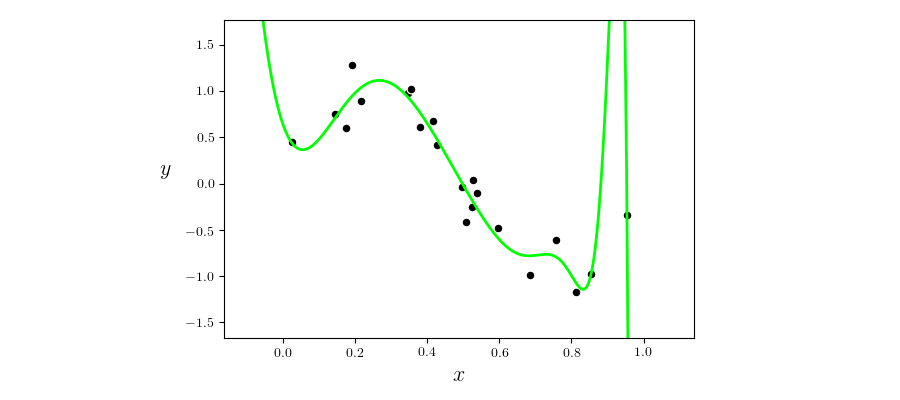

In [9]:
# import the v1 library
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'polys',degree = 30)

# choose normalizer
mylib.choose_normalizer(name = 'none')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(optimizer = 'newtons method',max_its = 1,epsilon = 10**(-9))
# mylib.fit(max_its = 1000,alpha_choice = 10**(-1))

# plot cost history
mylib.show_histories(start = 0)

# plot dataset
demo = regress_plotter.Visualizer(data)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = mylib.cost_histories[-1]
w_best = mylib.weight_histories[0][-1]
demo.plot_fit(w_best,mylib.model,normalizer = mylib.normalizer);

here


<IPython.core.display.Javascript object>


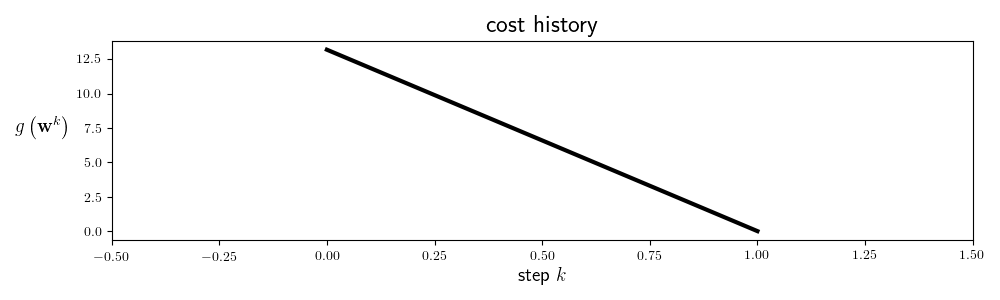

<IPython.core.display.Javascript object>


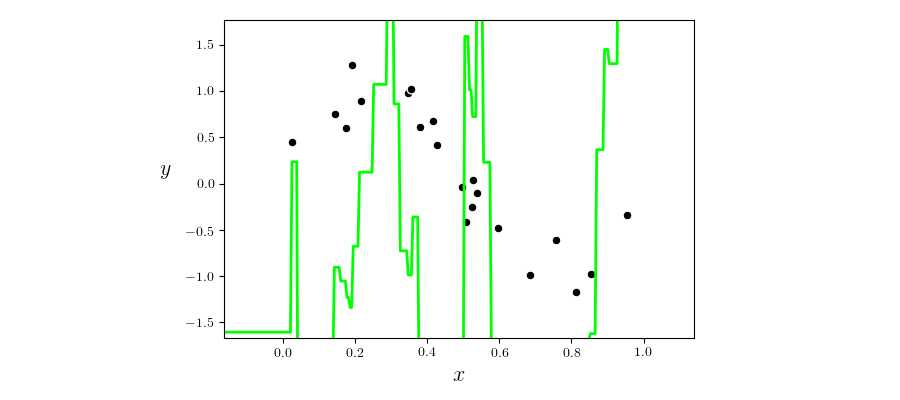

In [109]:
# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
D = 10
mylib.choose_features(name = 'stumps')

# choose normalizer
mylib.choose_normalizer(name = 'none')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(optimizer = 'newtons method',max_its = 1,alpha_choice = 10**(-2))

# plot cost history
mylib.show_histories(start = 0)

# plot dataset
demo = regress_plotter.Visualizer(data)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = mylib.cost_histories[-1]
w_best = mylib.weight_histories[0][-1]
demo.plot_fit(w_best,mylib.model,normalizer = mylib.normalizer);

In [112]:
np.linalg.norm(x - mylib.normalizer(mylib.x),'fro')

0.0

In [111]:
np.linalg.norm(y - mylib.y,'fro')

0.0

## Custom features

Put in a custom feature transformation - e.g., polynomial

In [46]:
# a elliptical feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = []
    for i in range(0,D):
        for j in range(0,D-i):
            if i > 0 or j > 0:
                term = (x[0,:]**i)*((x[1,:])**j)
                f.append(term)
    return np.array(f)

In [16]:
import itertools
j = [0,1,2,3,4,5,6,7,8,9]
x = 11
ops=[list(c) for l in range(1,len(j)) for c in itertools.permutations(j,l) if sum(c) < x]

In [93]:
# compute all powers for polynomial
import itertools
D = 5     # degree of polynomial
N = 2     # dimension of input

# all monomial terms degrees
degs = np.array(list(itertools.product(list(np.arange(D)), repeat=N)))
b = np.sum(degs,axis = 1)
ind = np.argwhere(b <= D)
ind = [v[0] for v in ind]
degs = degs[ind,:]

# input data
x = np.random.randn(100,N)

# polynomial terms
x_poly = np.array([np.prod(x**v,axis = 1)[:,np.newaxis] for v in degs])[:,:,0]

In [ ]:
def feature_transforms(x):
    # calculate feature transform
    f = np.array([(x.flatten()**d) for d in range(1,D)])   
    return f

def initializer():
    scale = 0.1
    r = scale*np.random.randn(D,1)
    return r

<IPython.core.display.Javascript object>


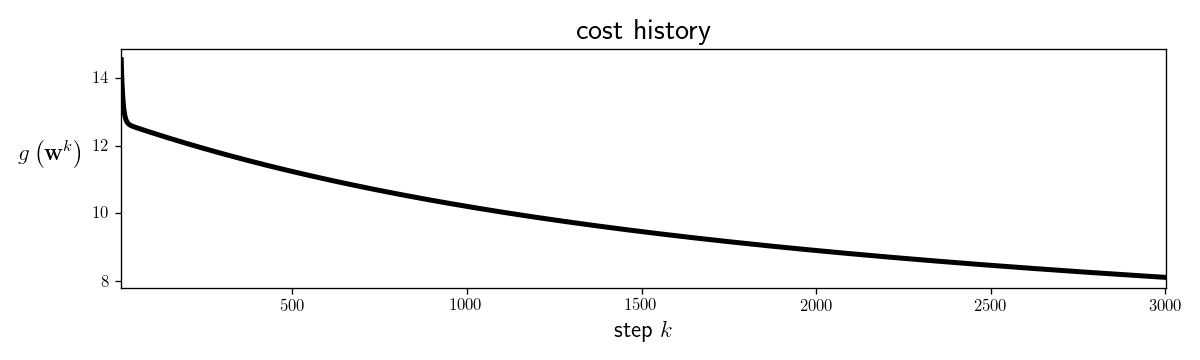

In [51]:
csvname = datapath + 'universal_regression_function.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
D = 10
mylib.choose_features(name = 'custom',feature_transforms = feature_transforms,initializer = initializer)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 3000,alpha_choice = 10**(-4))

# plot cost history
mylib.show_histories(start = 10)

In [26]:
csvname = datapath + 'noisy_sin_sample.csv'
csvname = datapath + 'universal_regression_samples_0.csv'
csvname = datapath + 'universal_regression_function.csv'

# Continuous function approximation

<IPython.core.display.Javascript object>


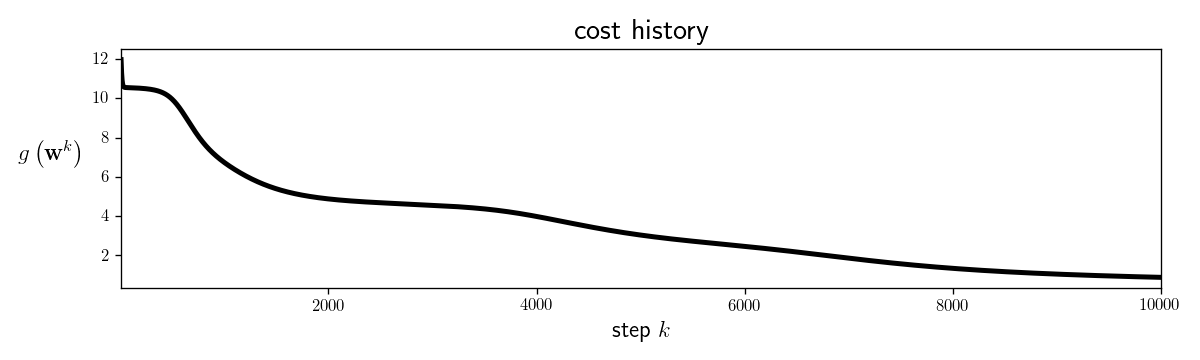

In [53]:
csvname = datapath + 'universal_regression_function.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [1,100,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 10000,alpha_choice = 10**(-2))

# plot cost history
mylib.show_histories(start = 10)


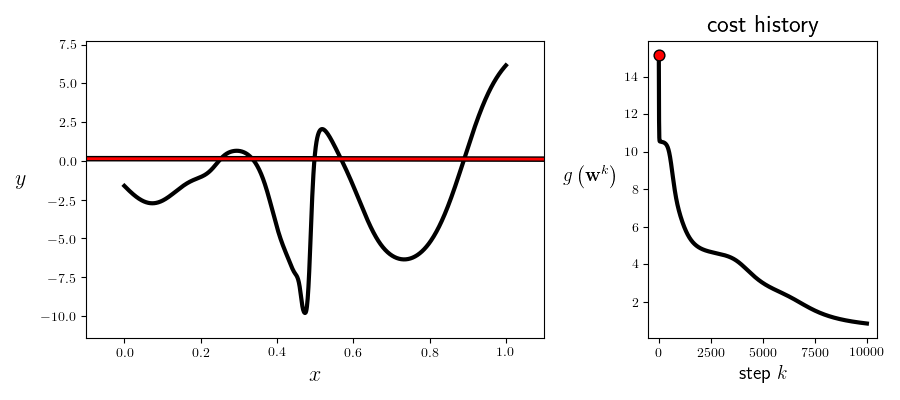
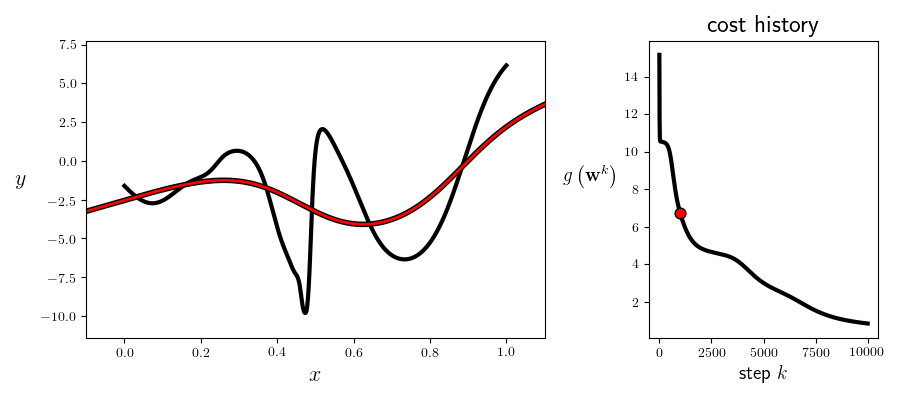
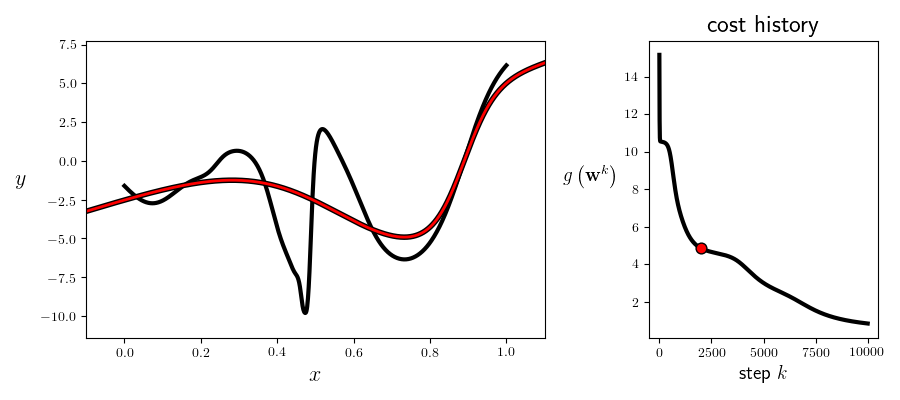
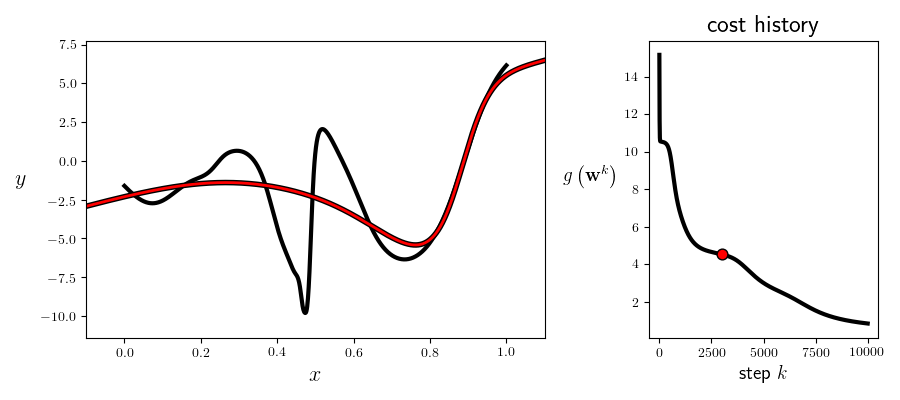
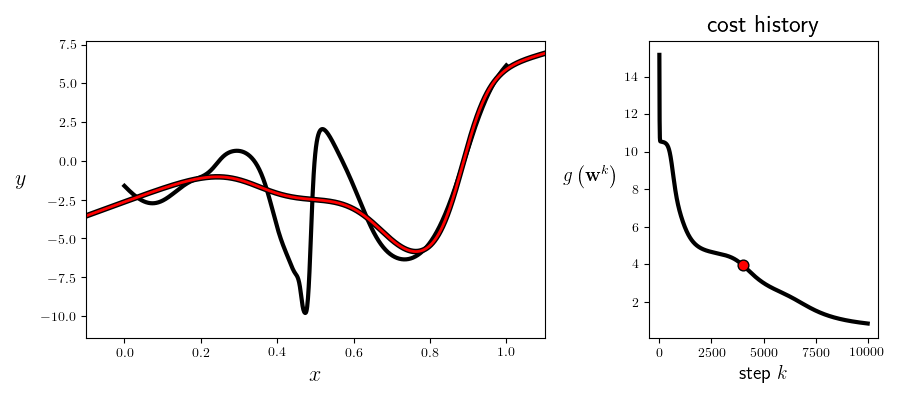
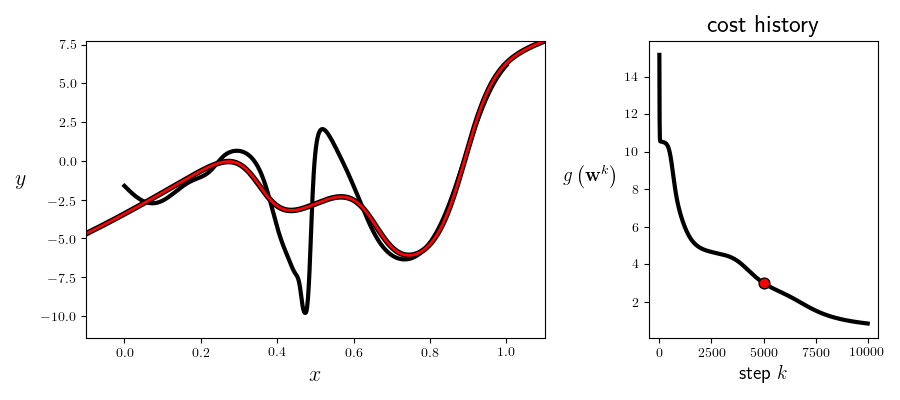
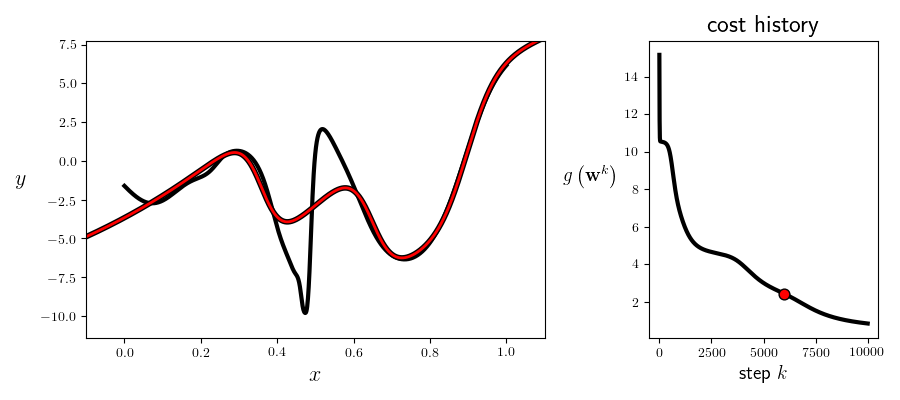
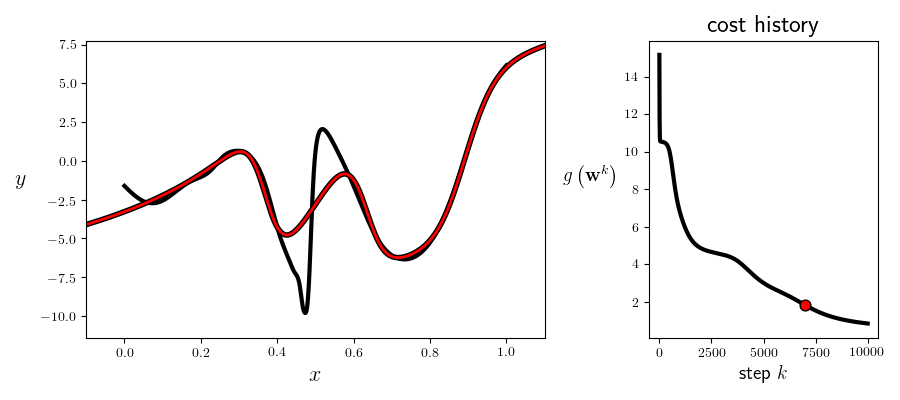
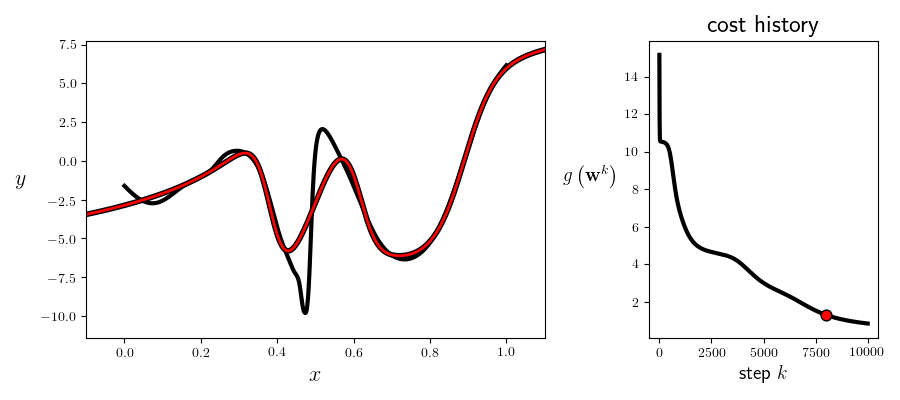
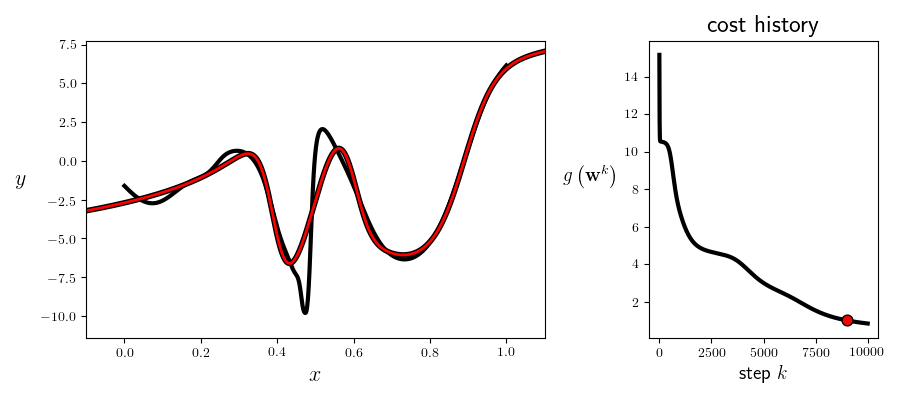
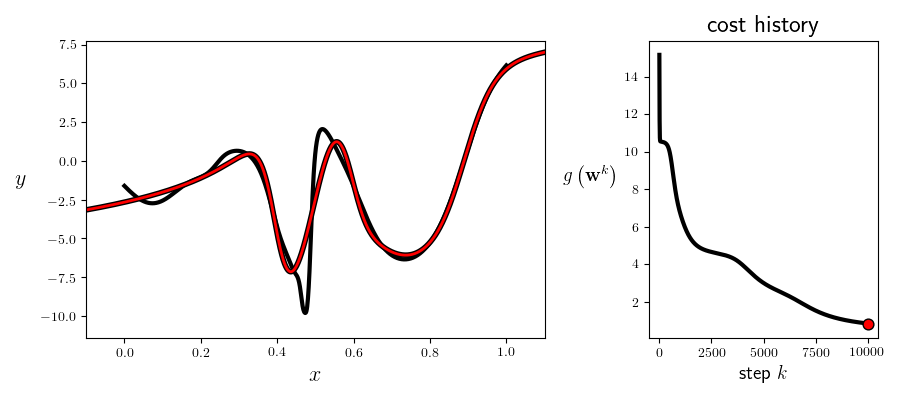

In [54]:
# load up animator
demo = nonlib.run_animators.Visualizer(csvname)

# pluck out a sample of the weight history
num_frames = 10 # how many evenly spaced weights from the history to animate

# animate based on the sample weight history
demo.animate_1d_regression(mylib,num_frames,scatter = 'none',show_history = True)

# Discrete function approximation

In [ ]:
csvname = datapath + 'discrete_function.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
D = 10
# mylib.choose_features(name = 'custom',feature_transforms = feature_transforms,initializer = initializer)
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [1,100,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 10000,alpha_choice = 10**(-1))

# plot cost history
mylib.show_histories(start = 10)


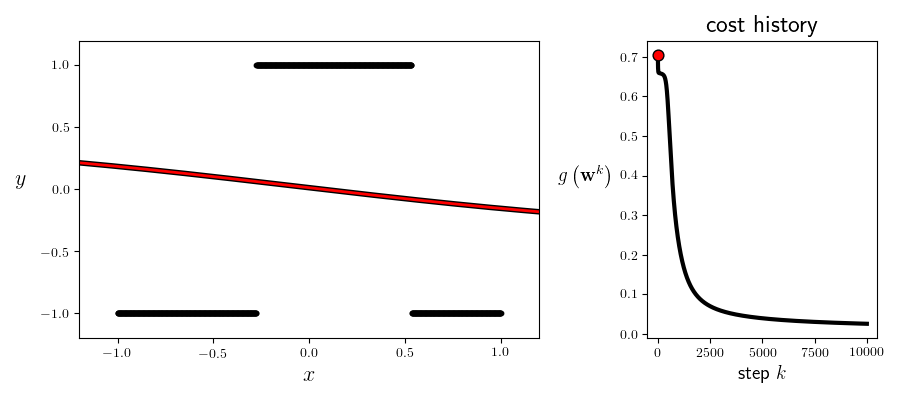
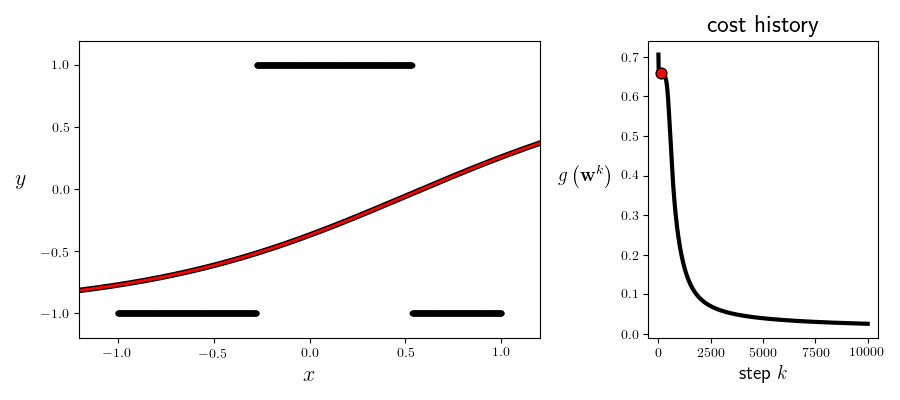
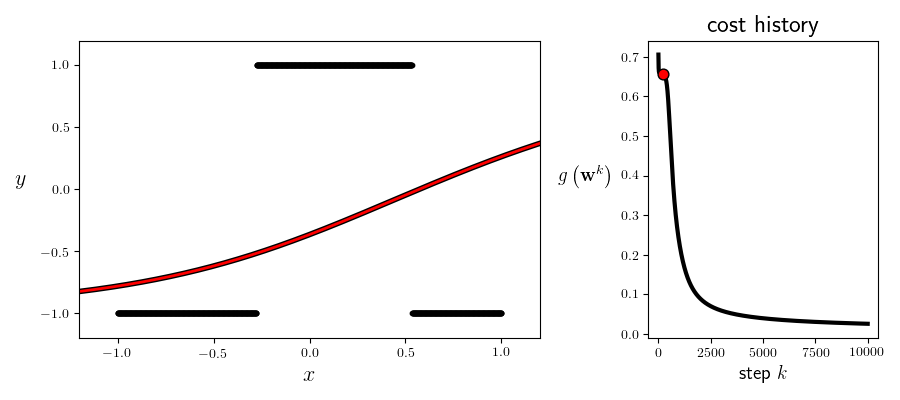
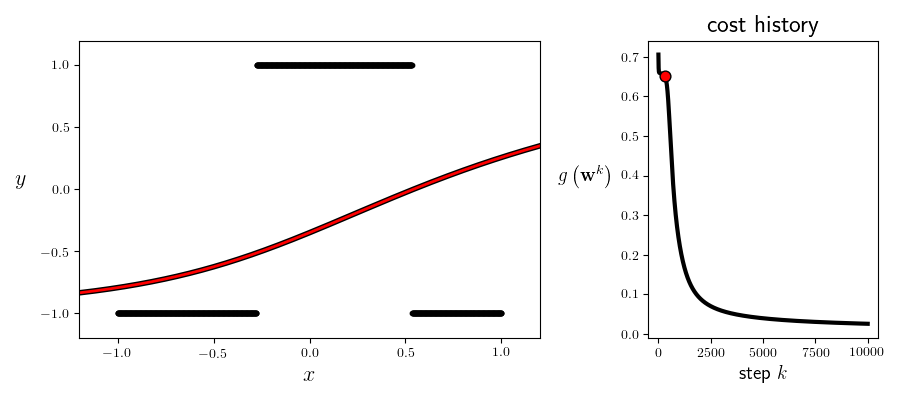
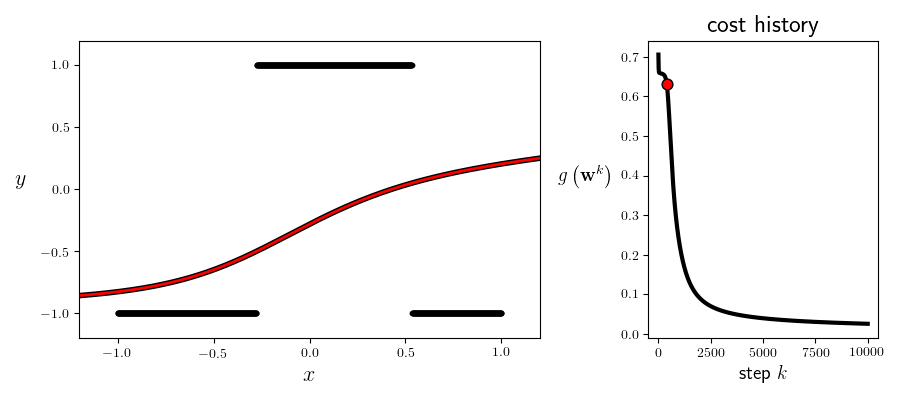
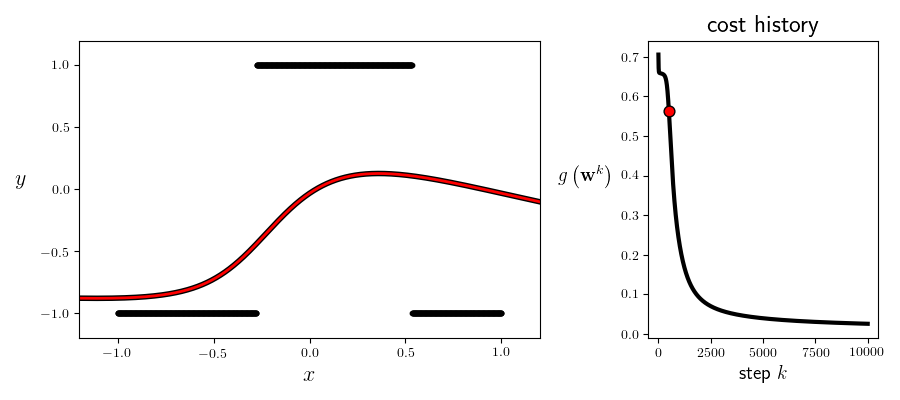
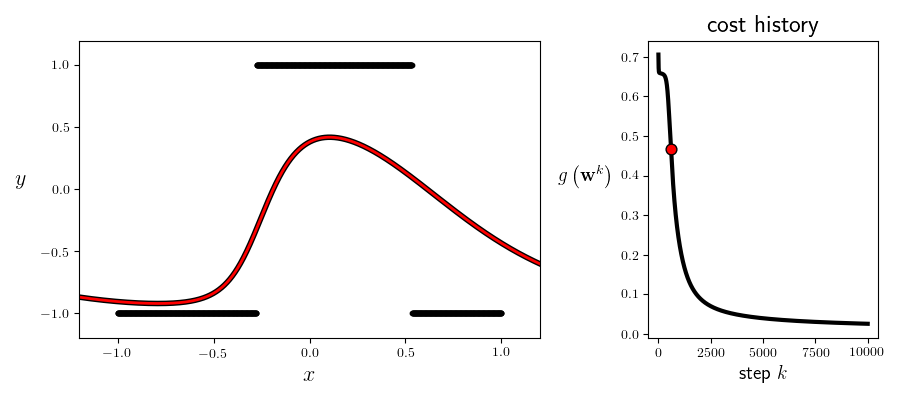
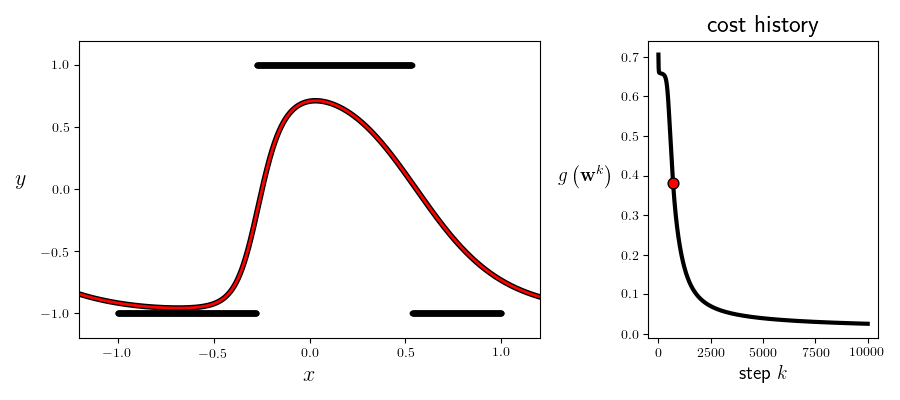
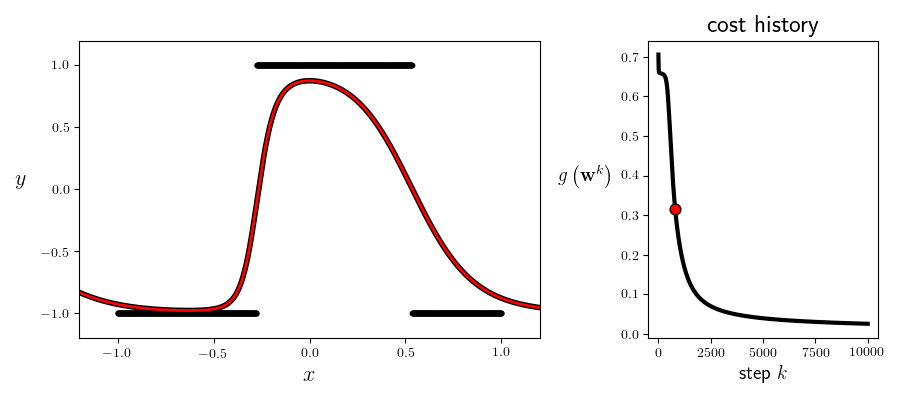
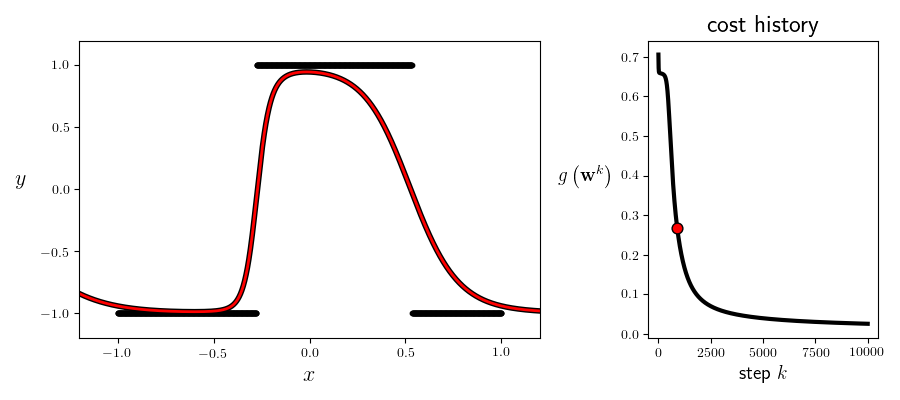
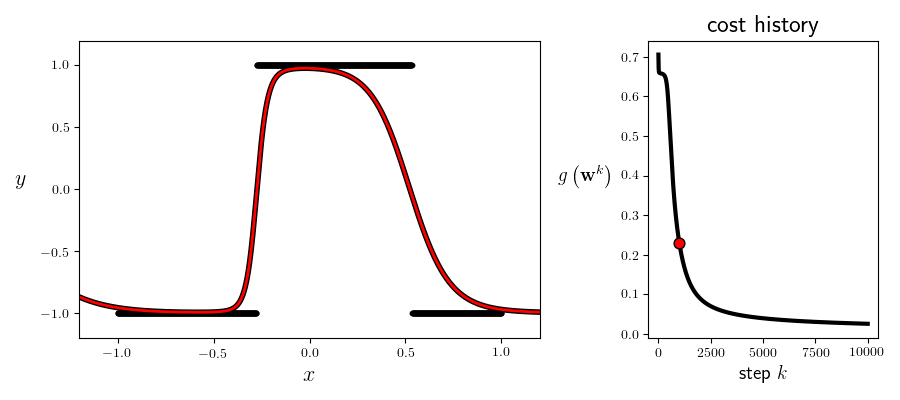
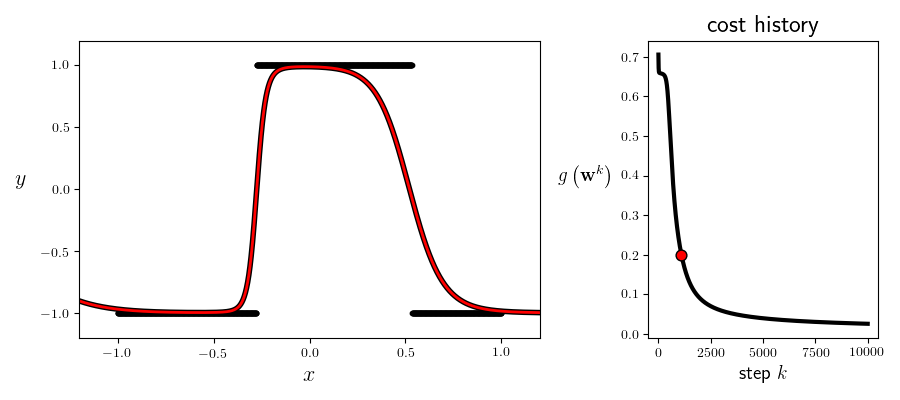
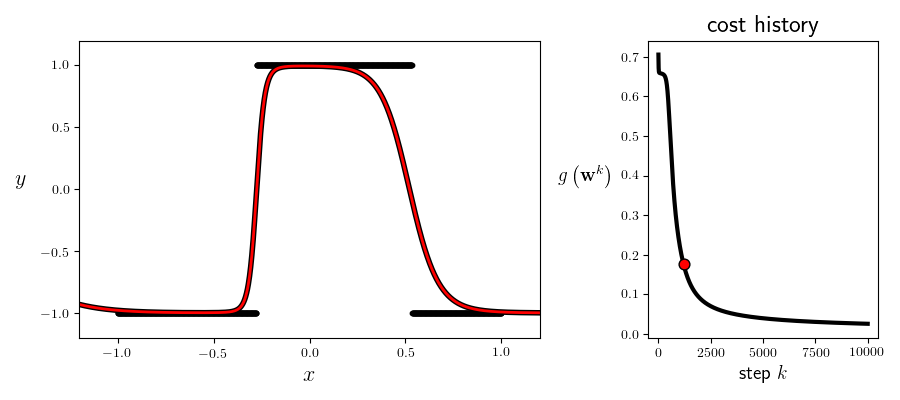
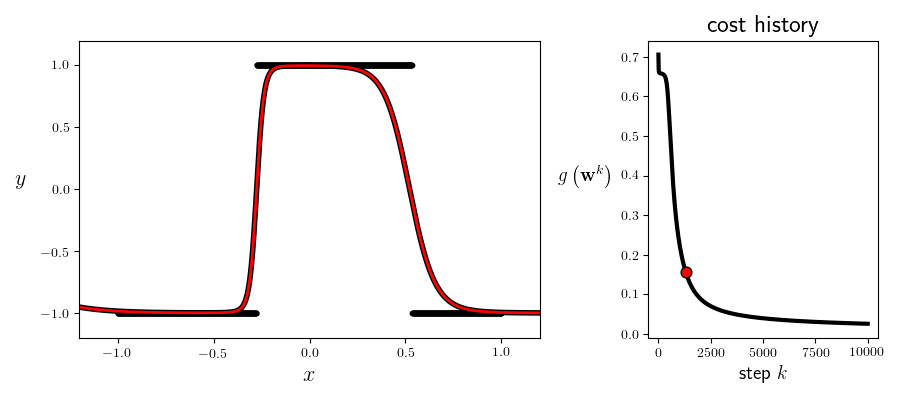
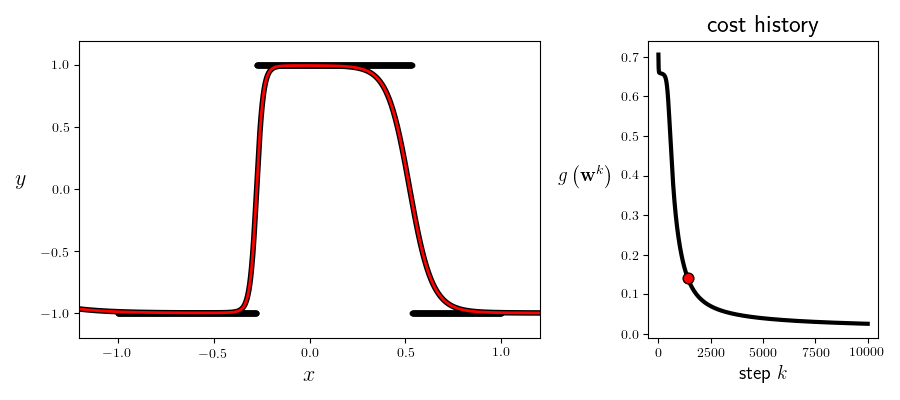
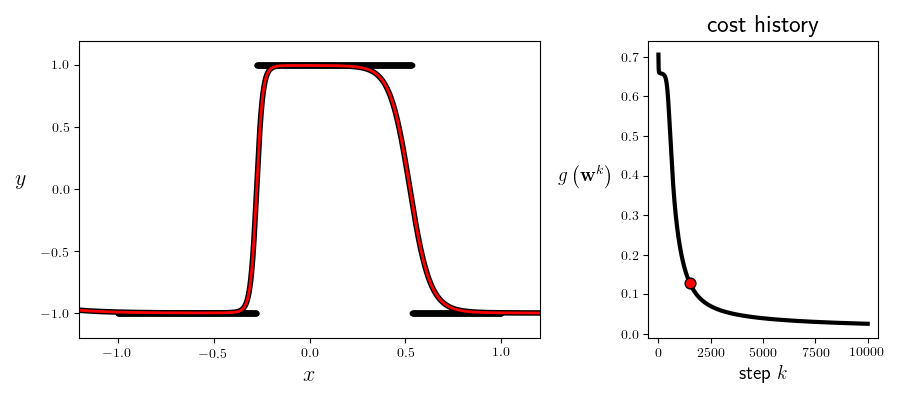
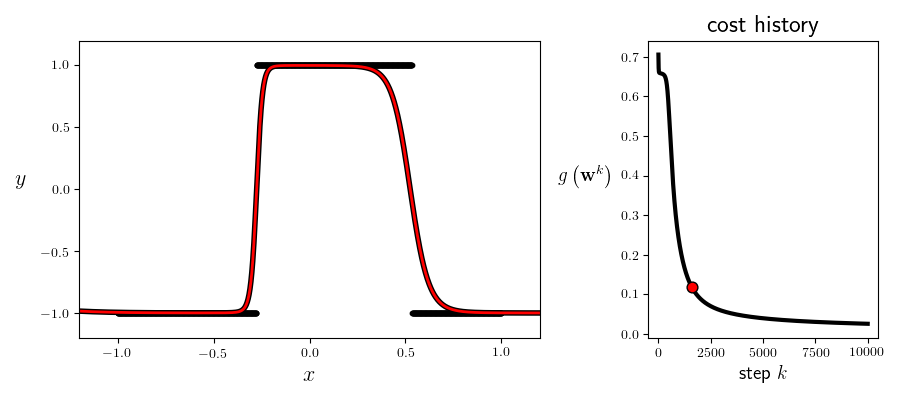
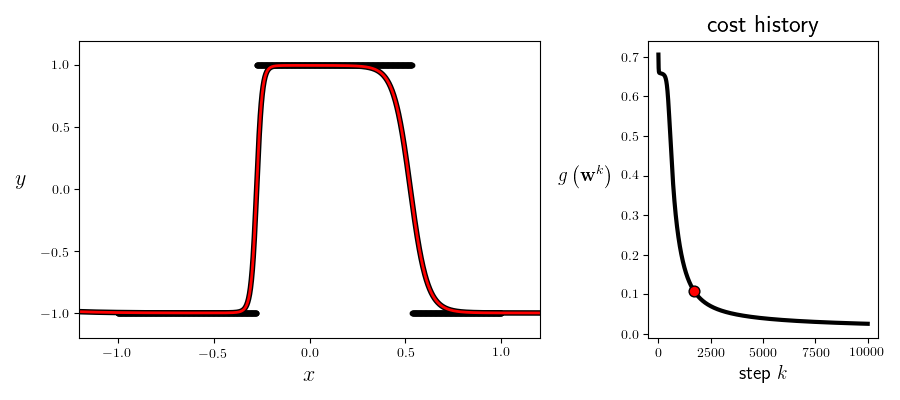
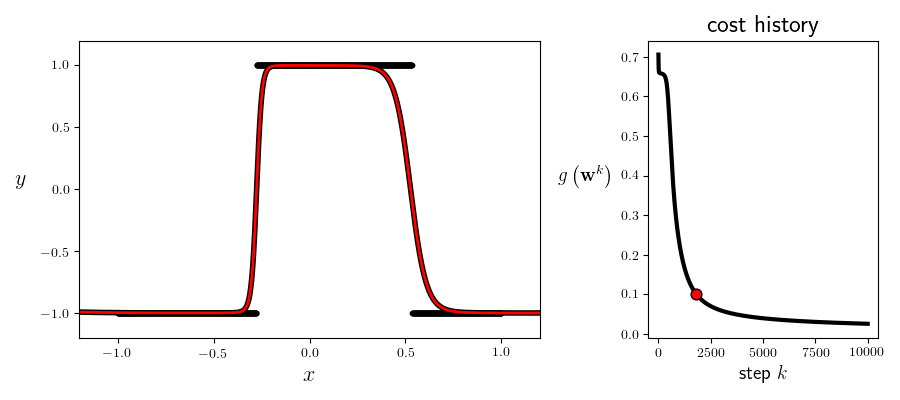
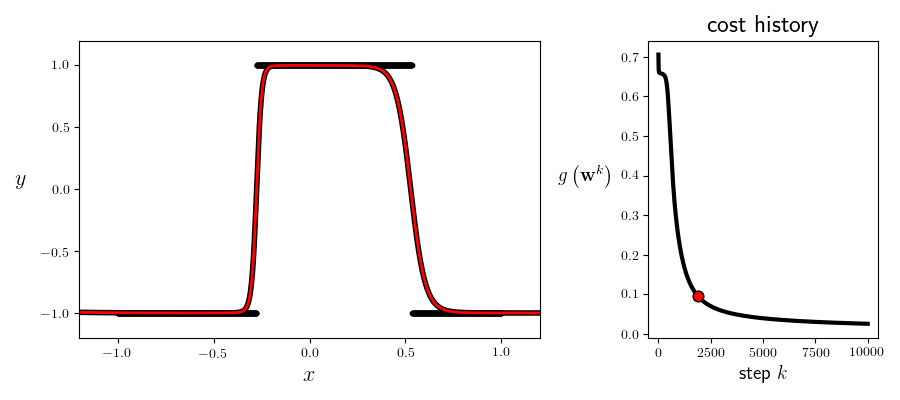
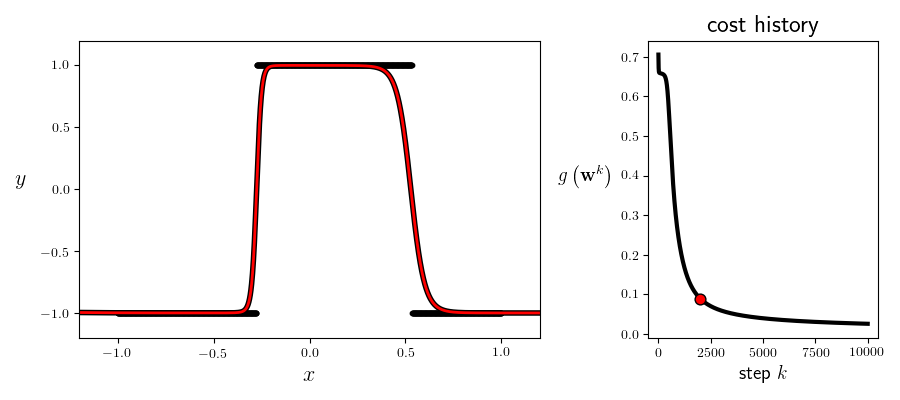
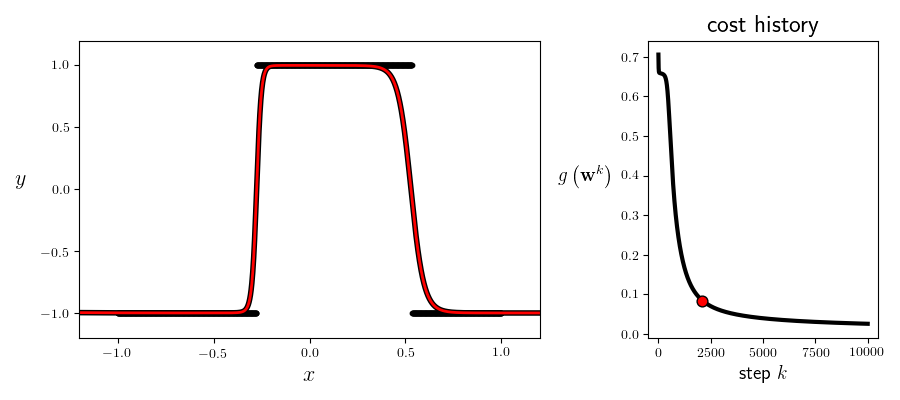
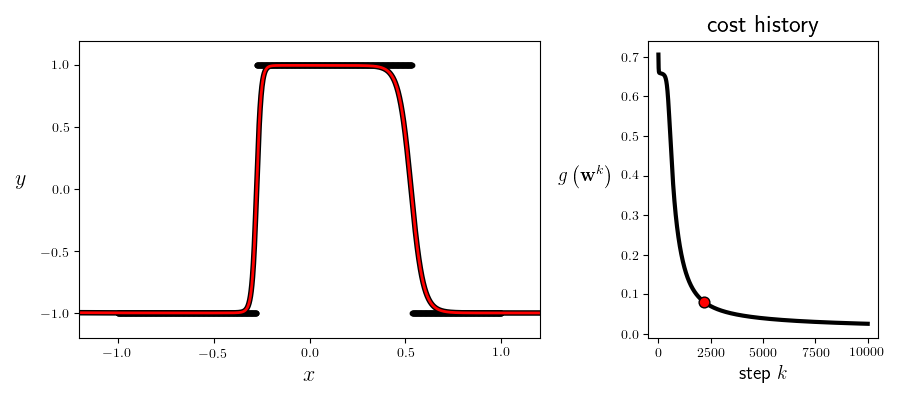
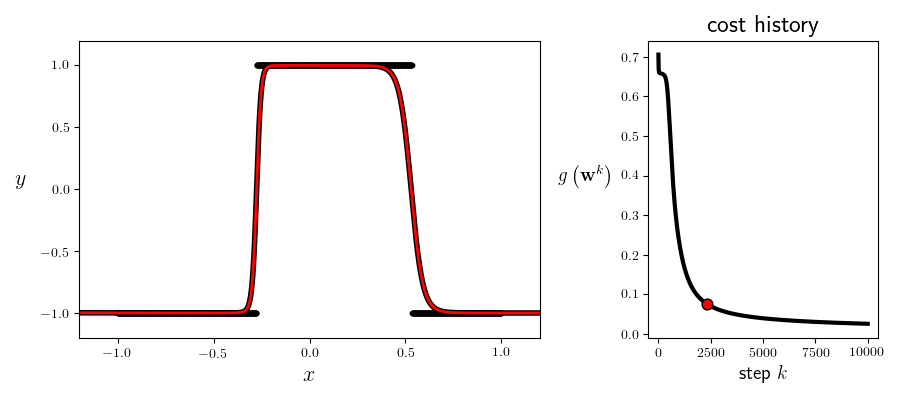
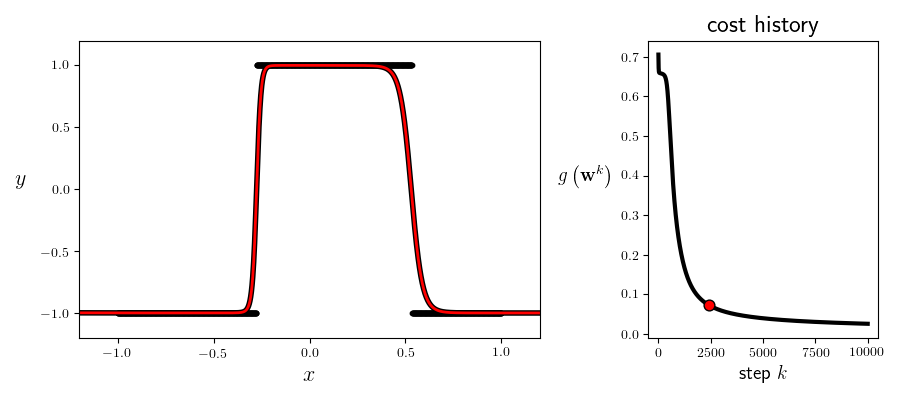
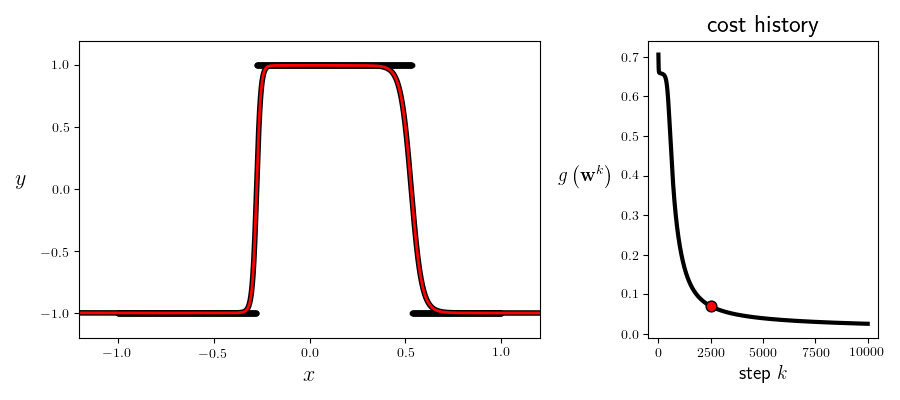
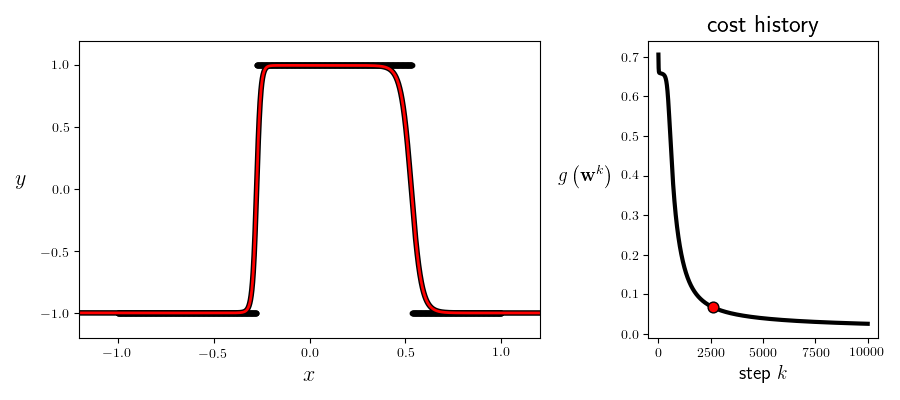
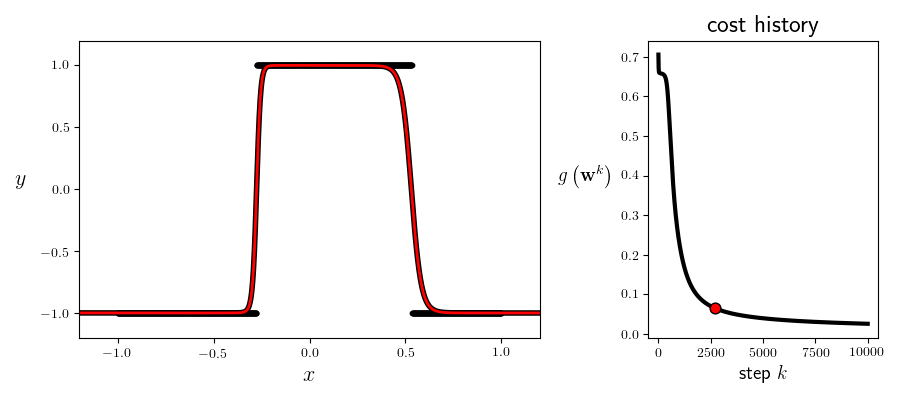
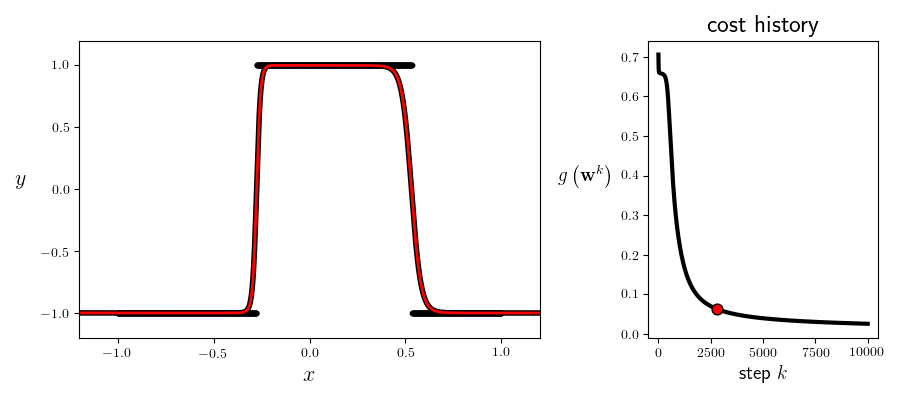
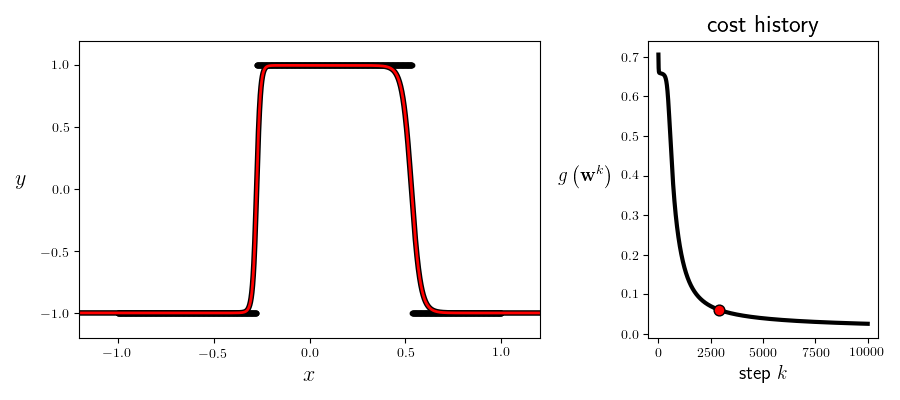
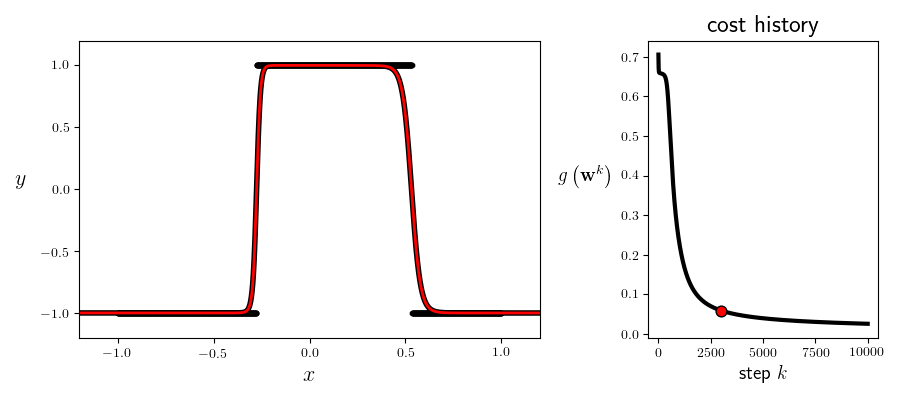
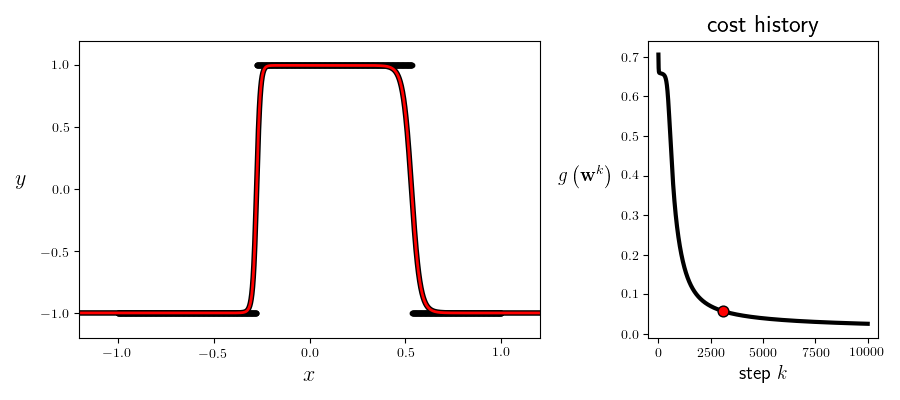
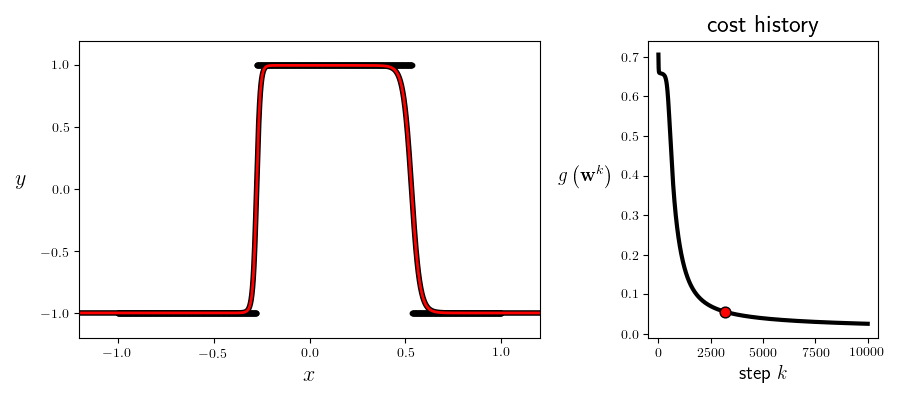
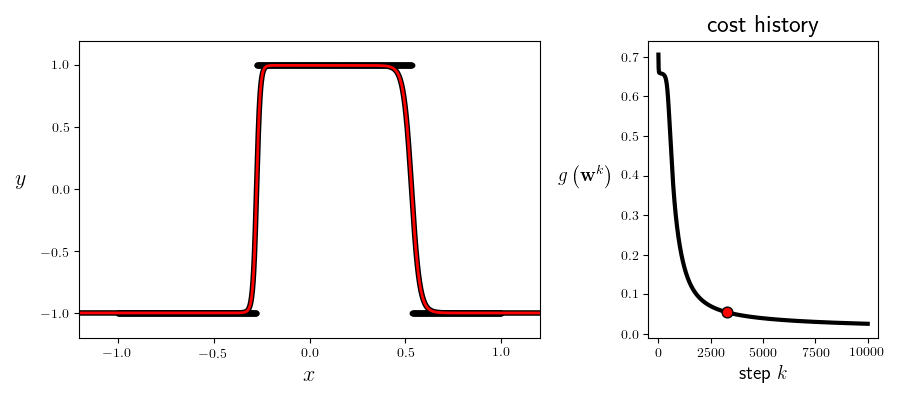
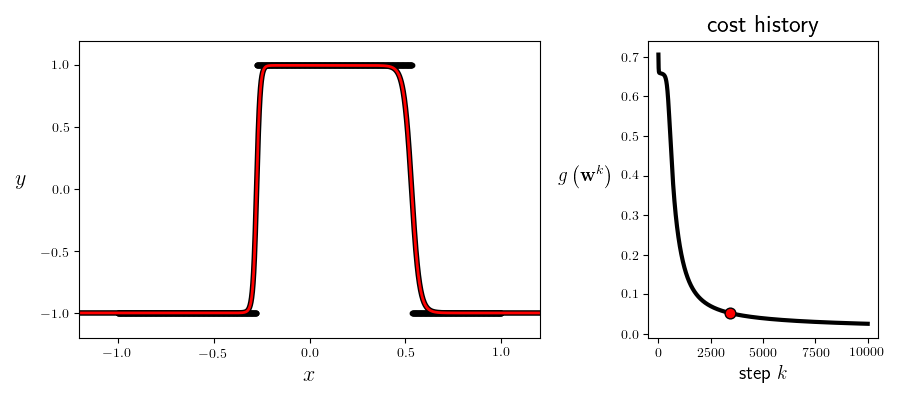
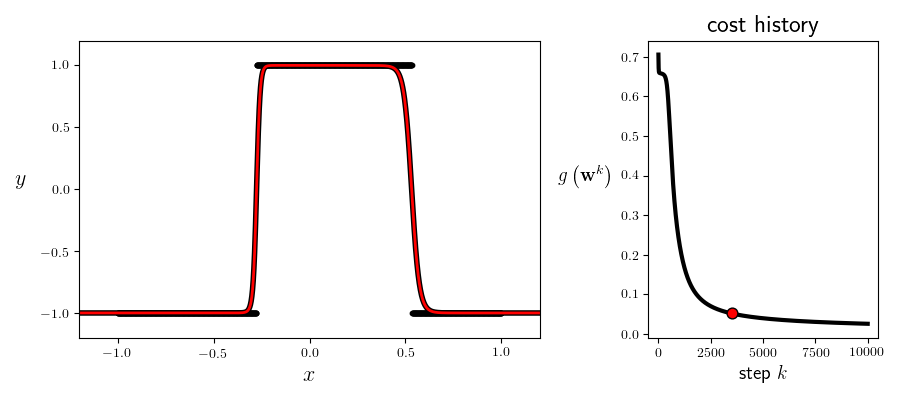
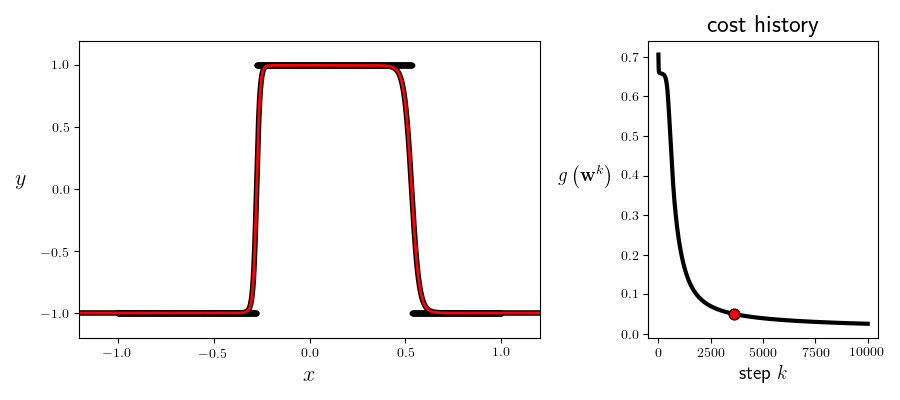
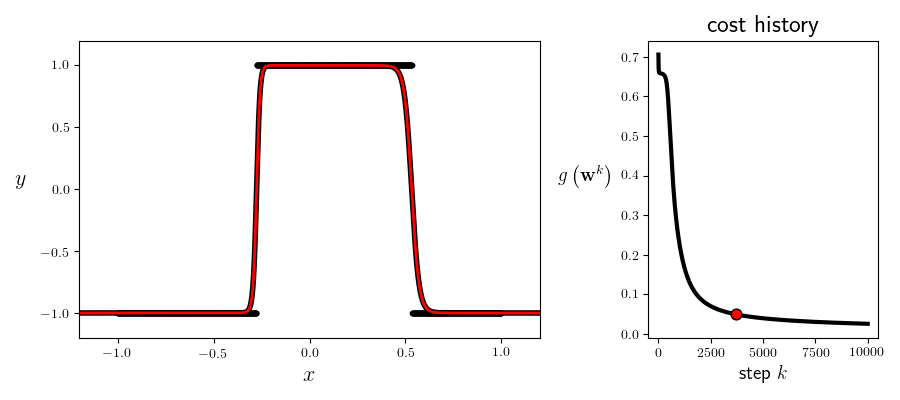
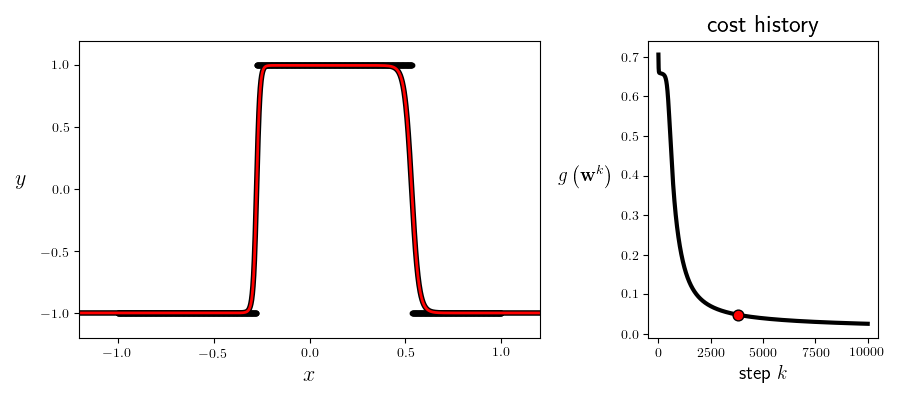
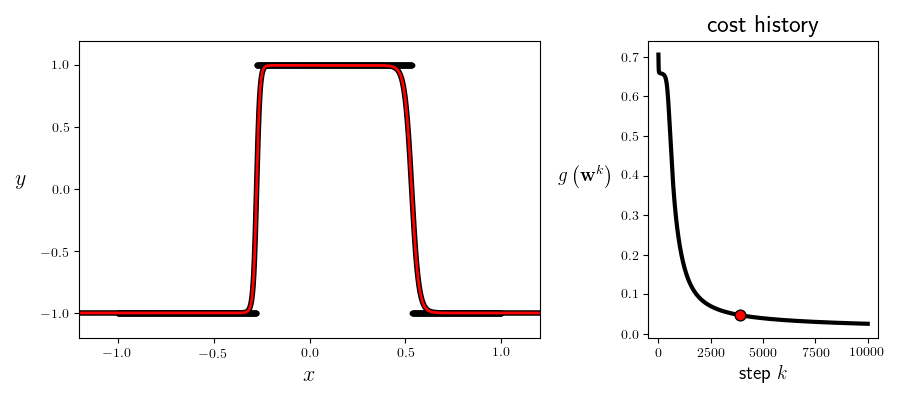
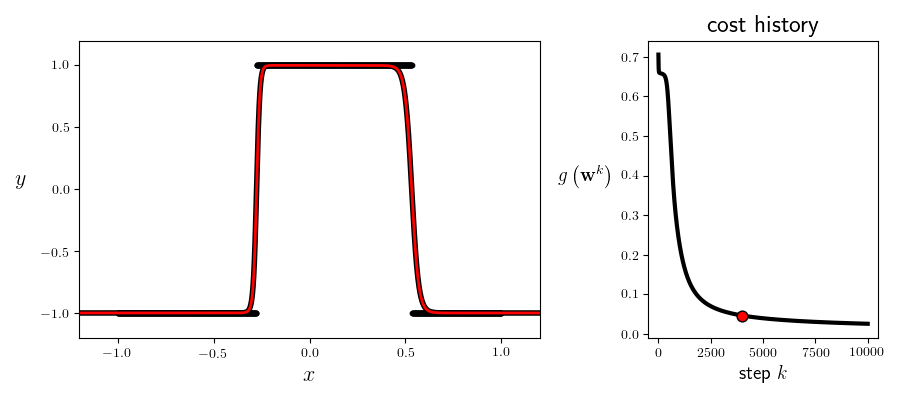
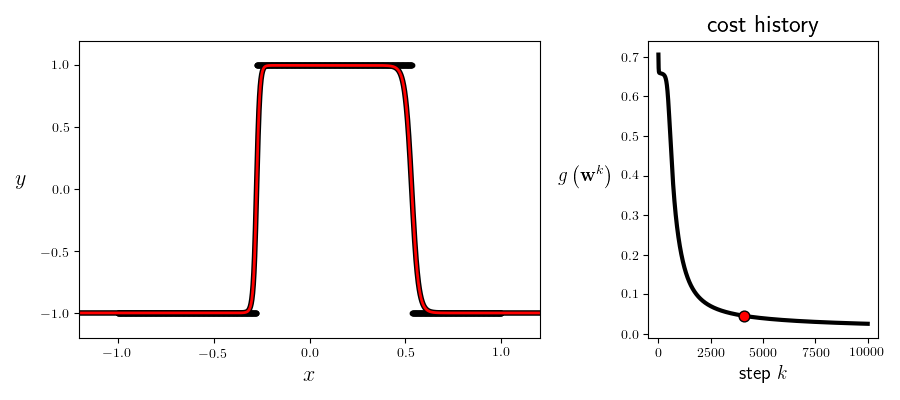
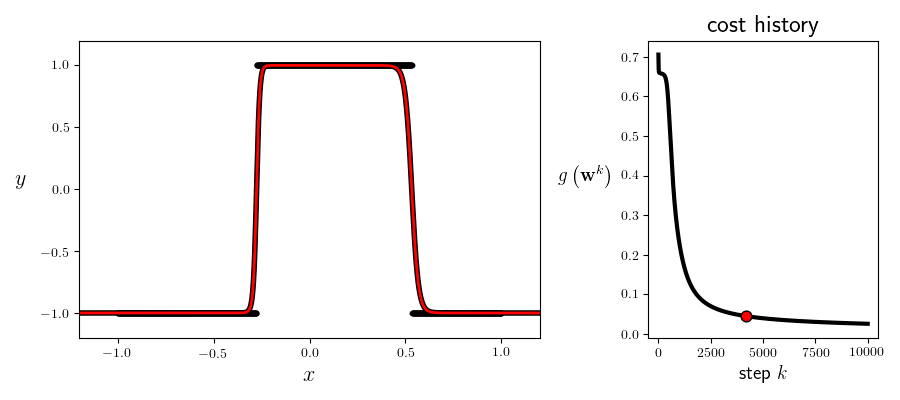
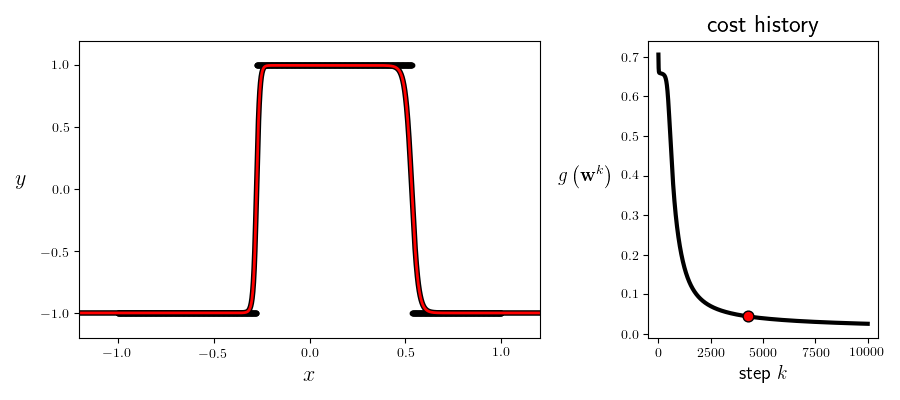
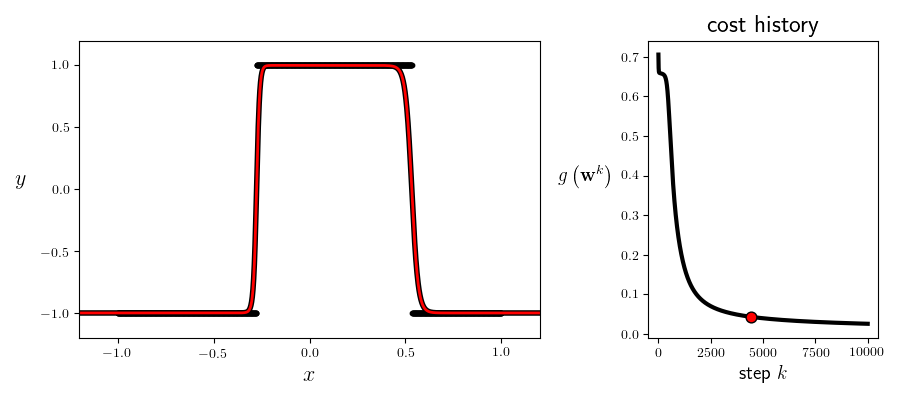
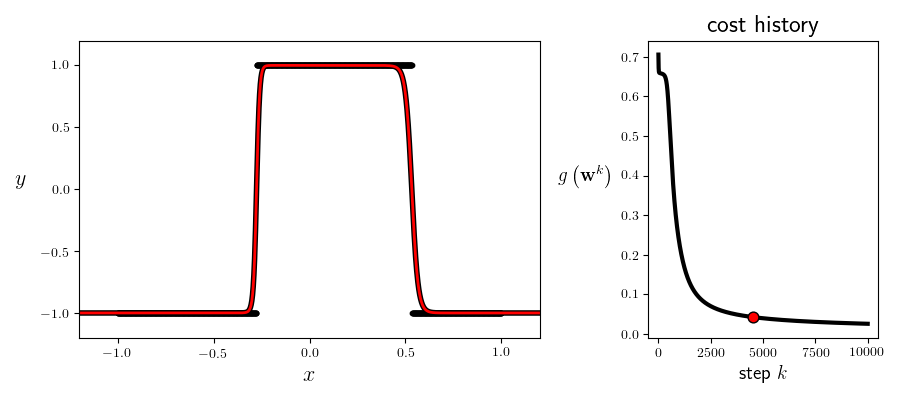
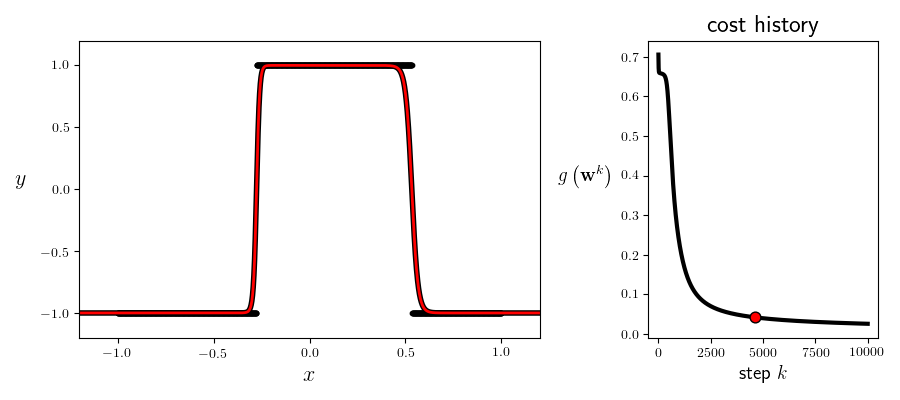
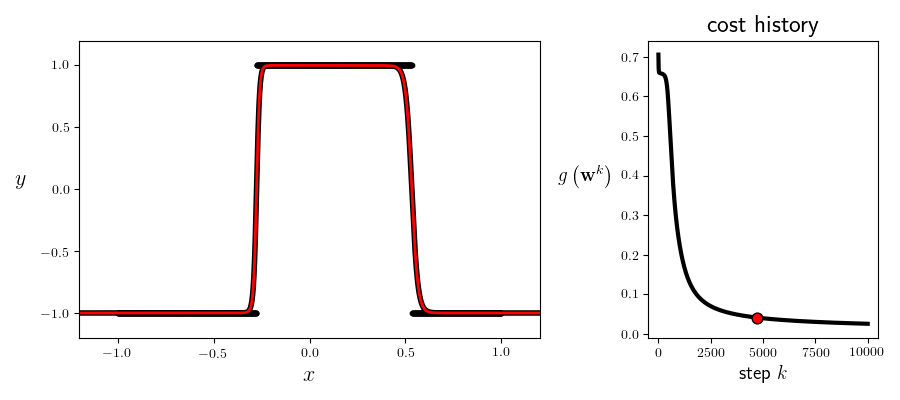
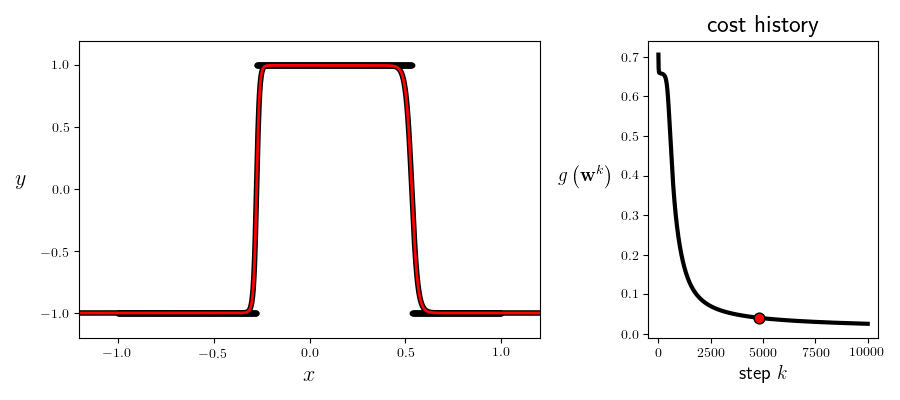
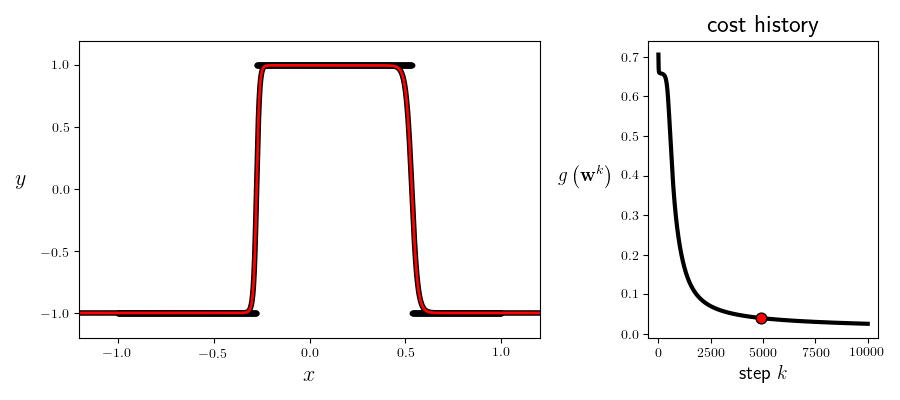
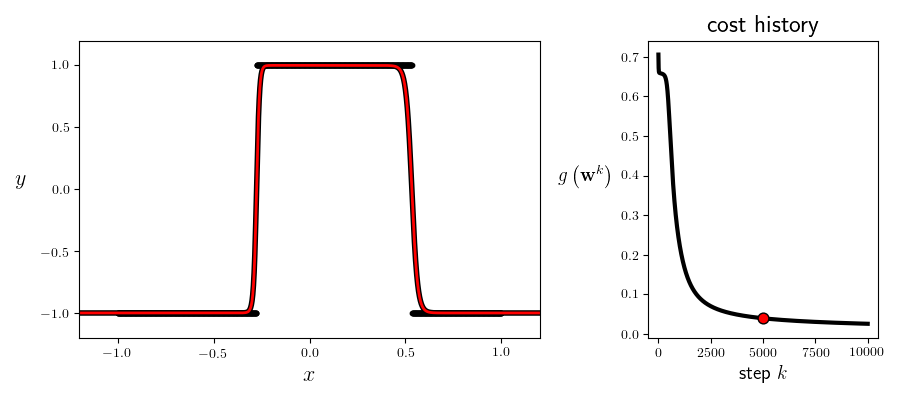
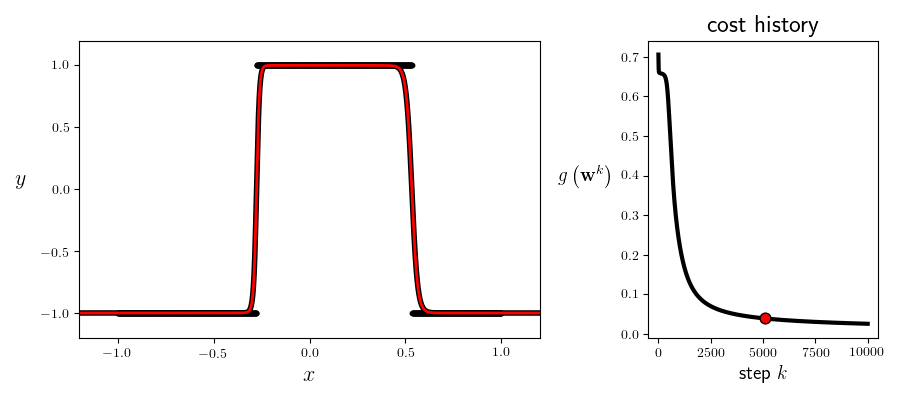
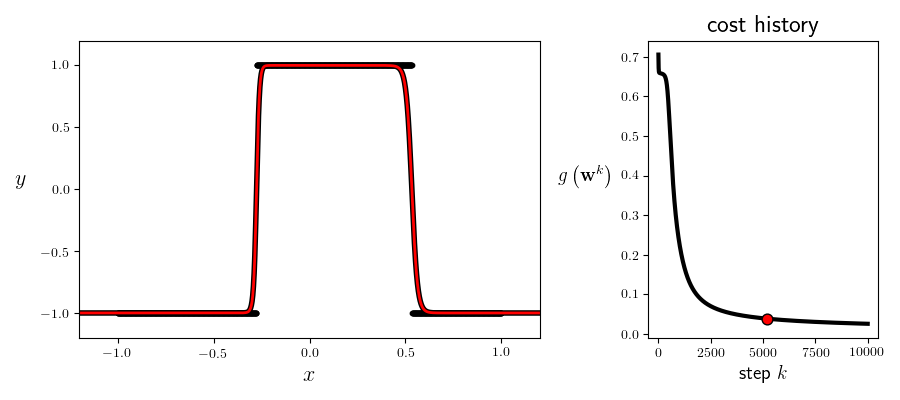
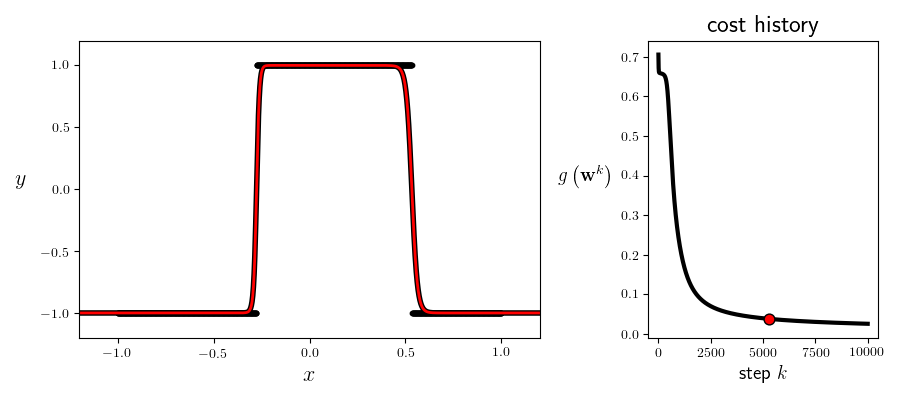
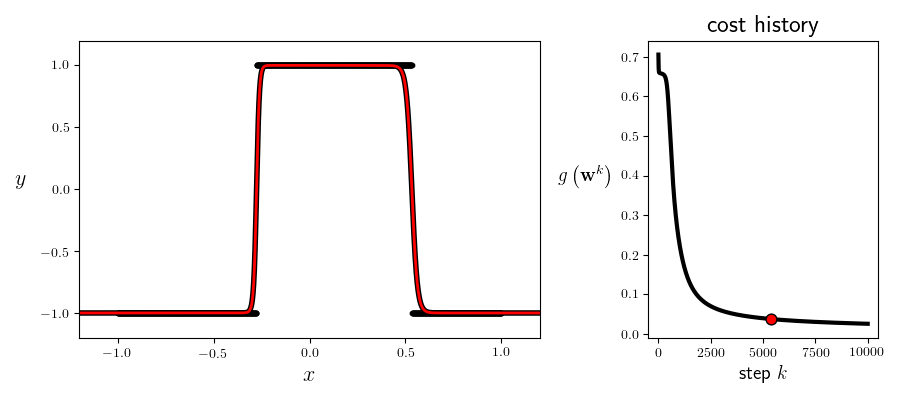
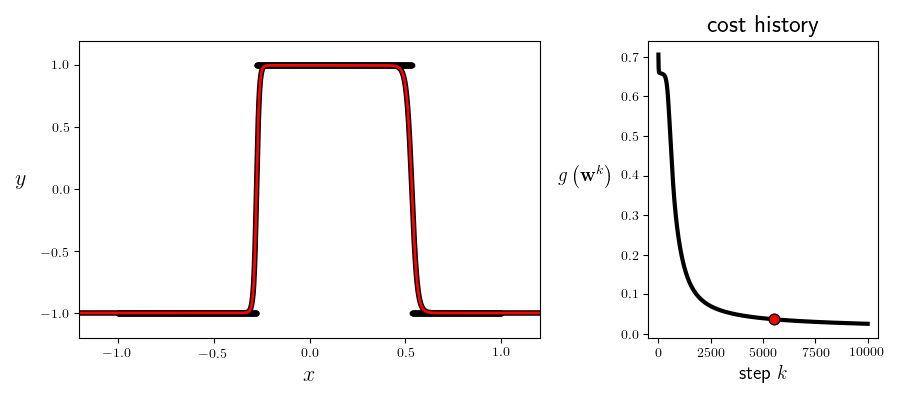
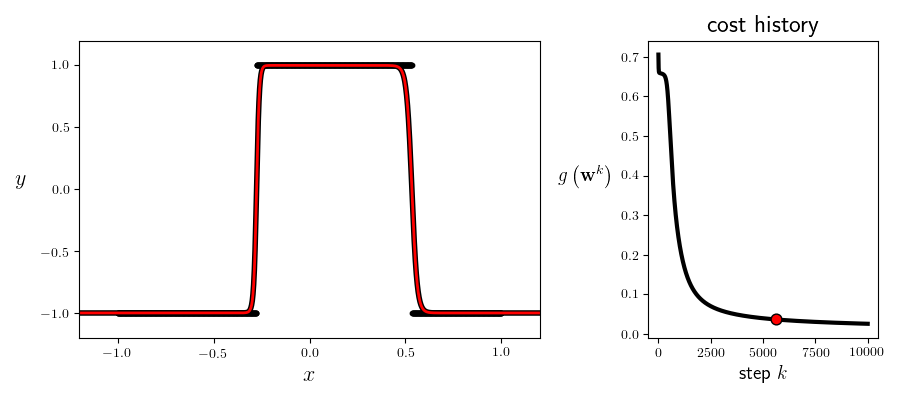
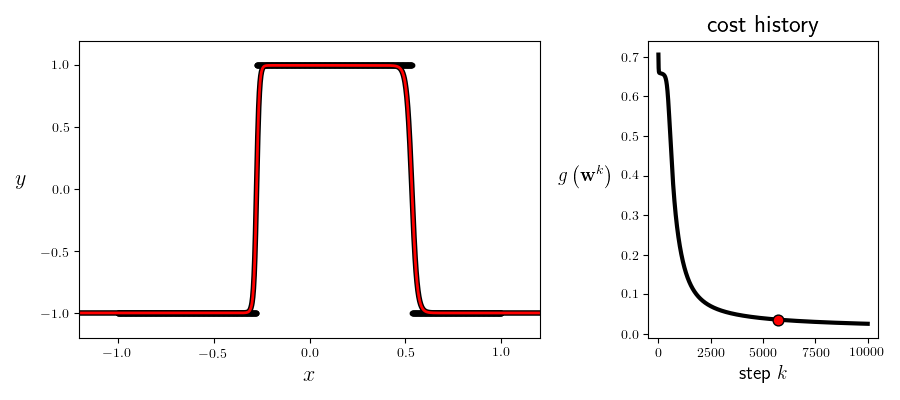
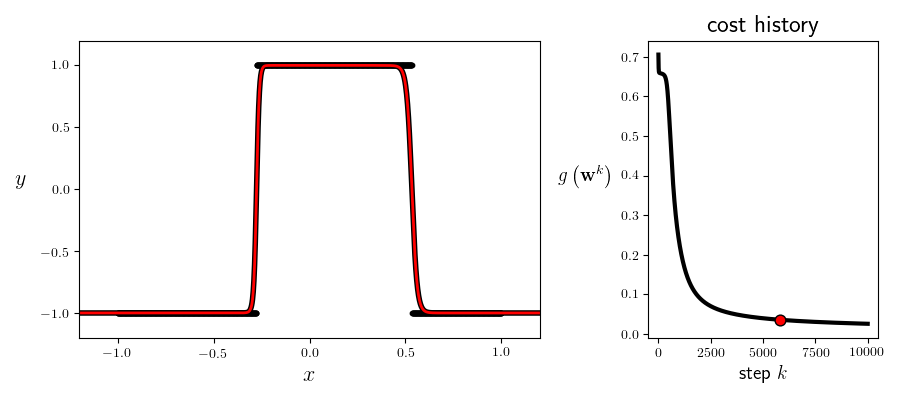
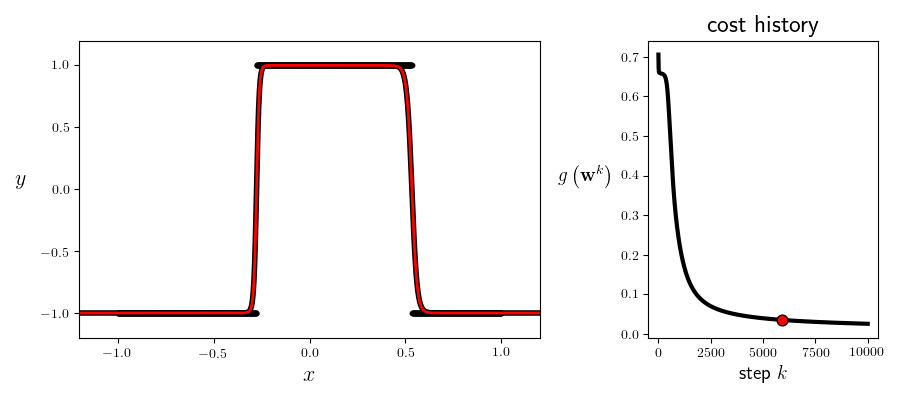
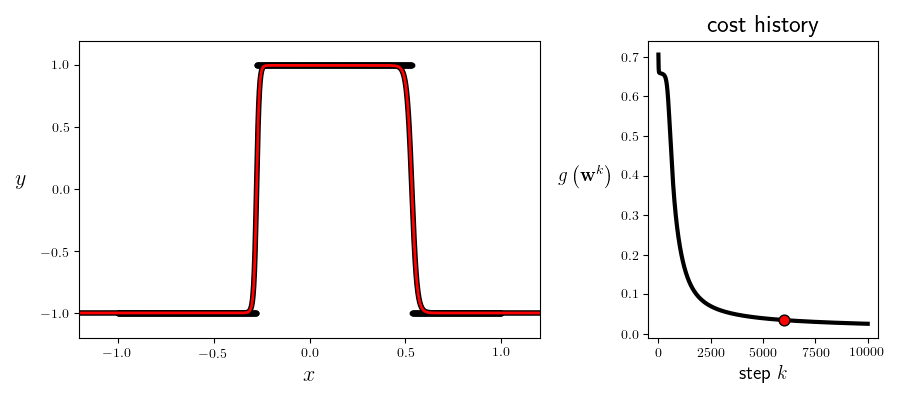
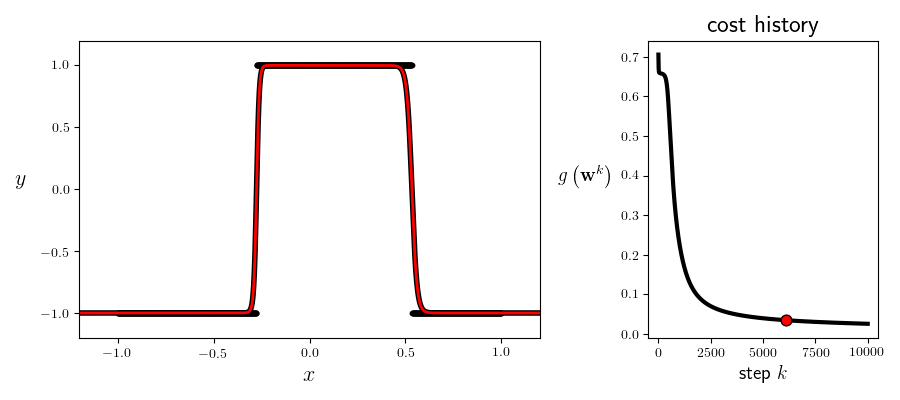
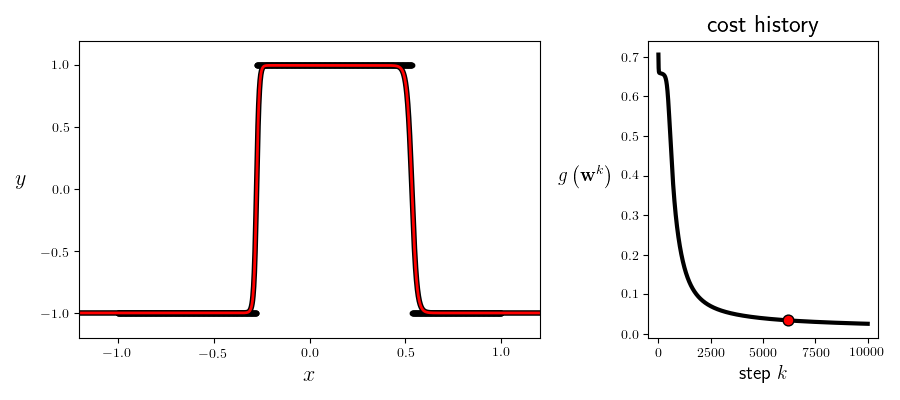
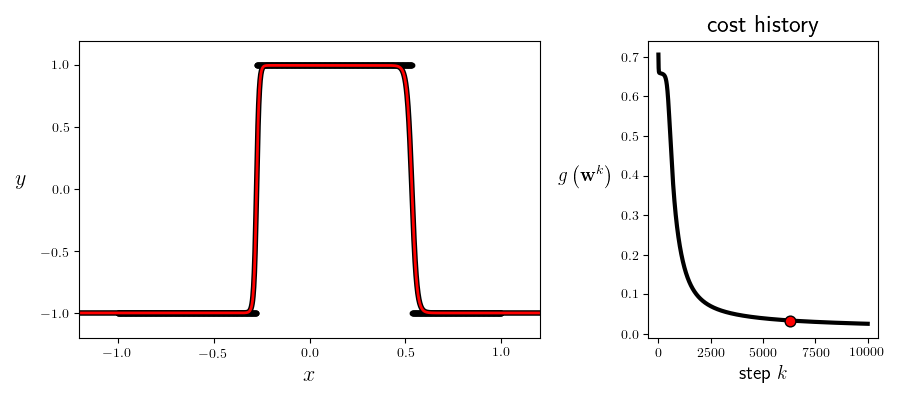
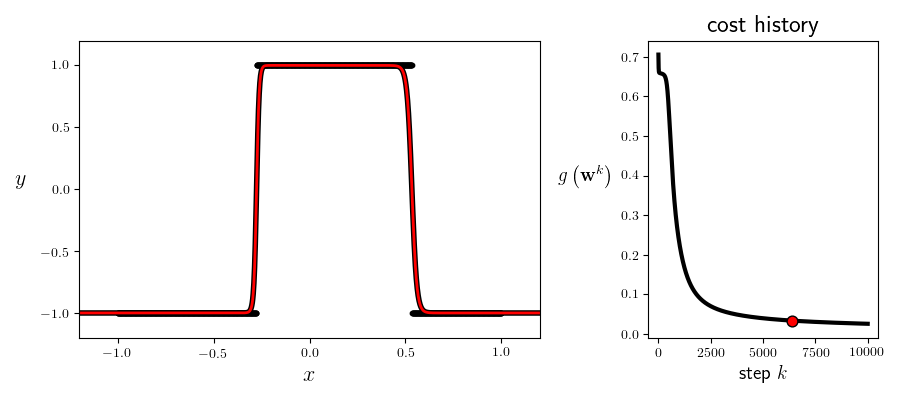
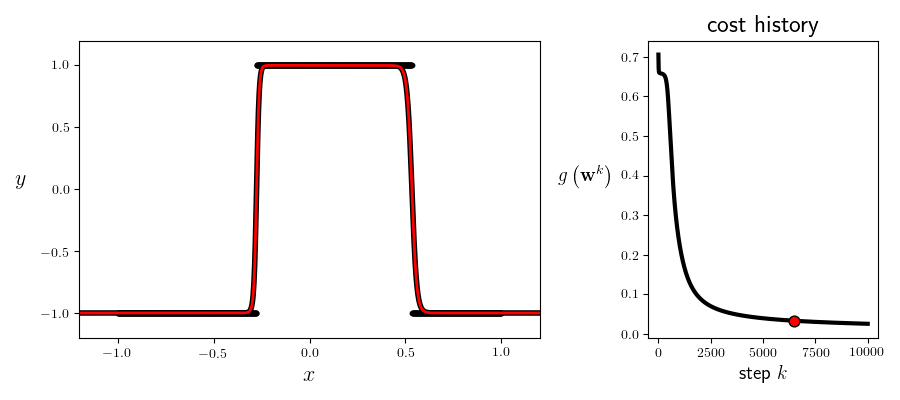
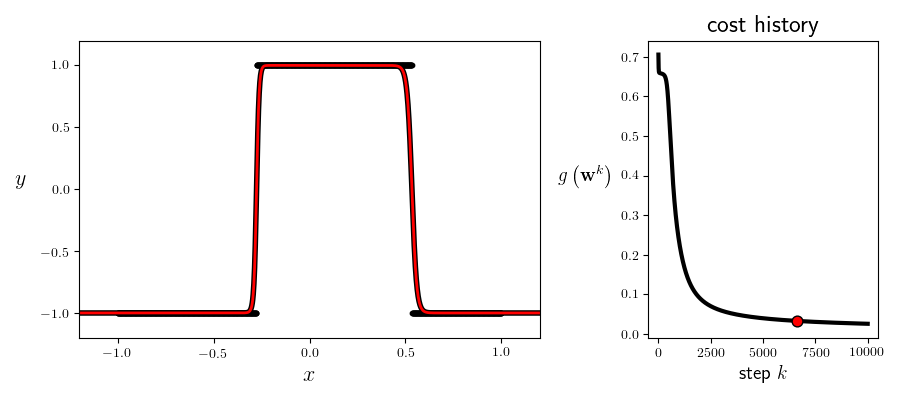
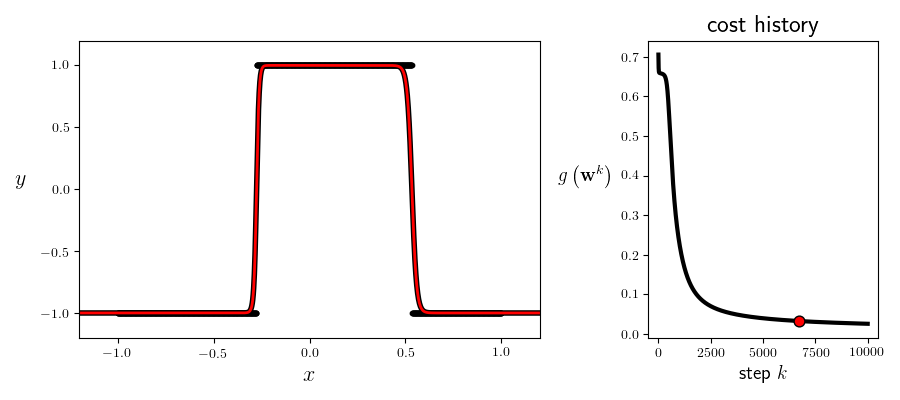
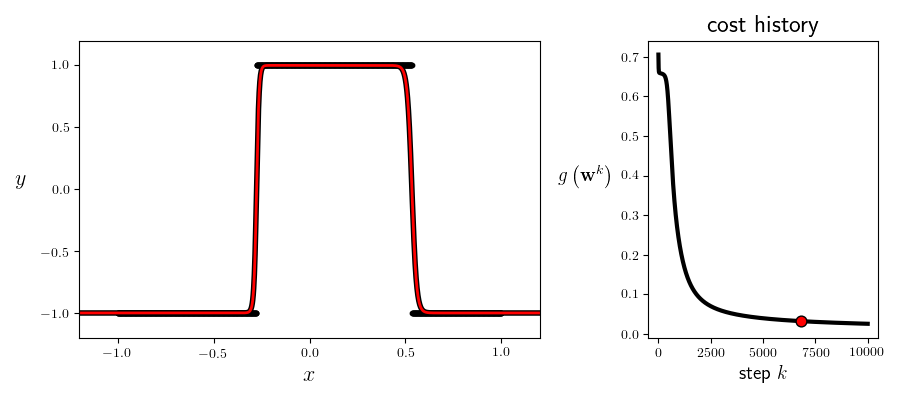
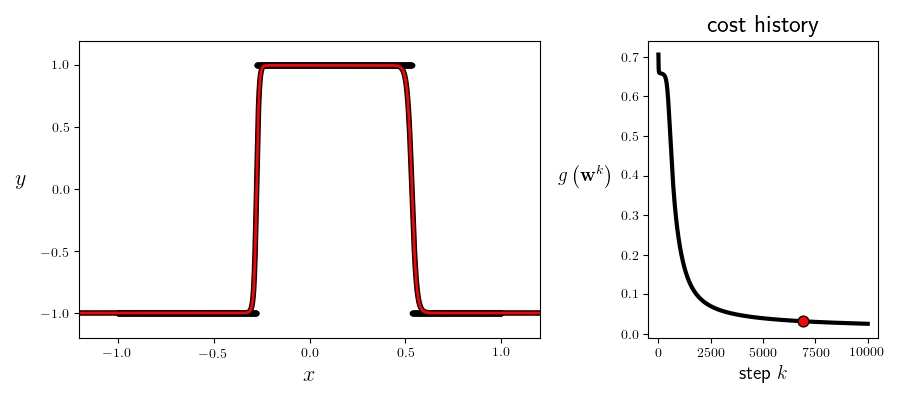
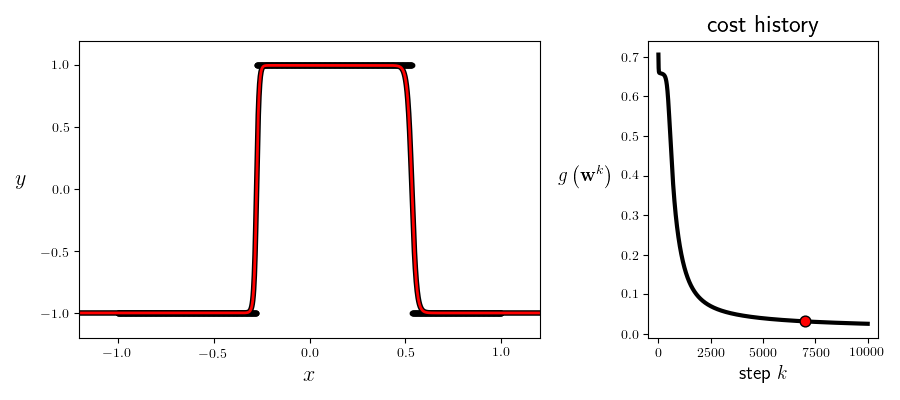
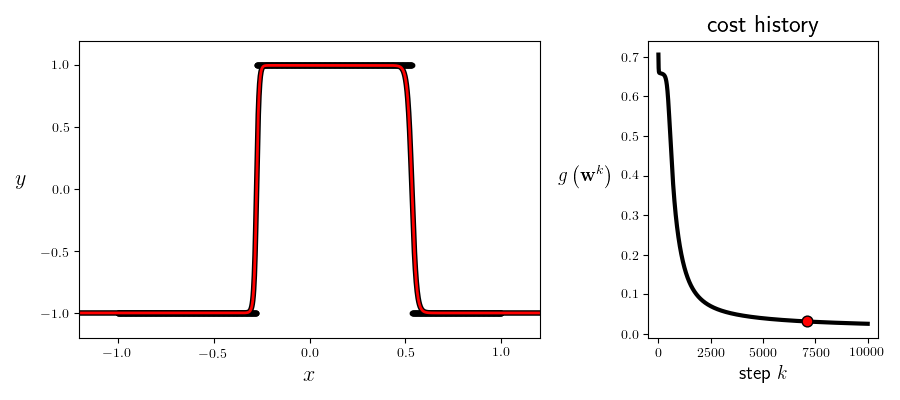
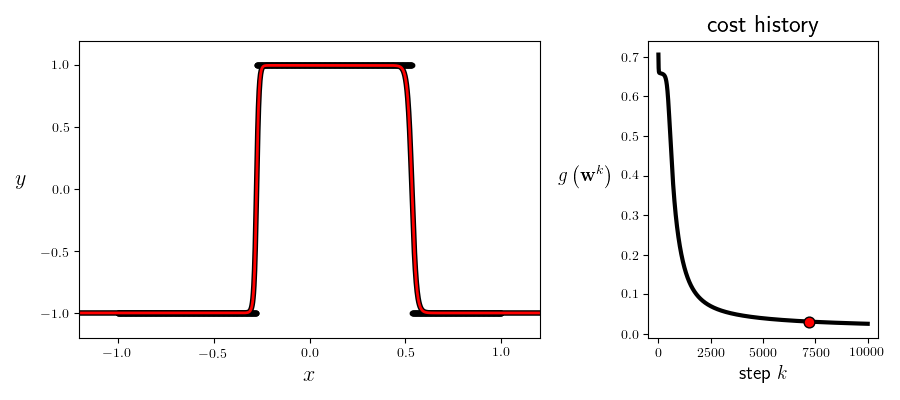
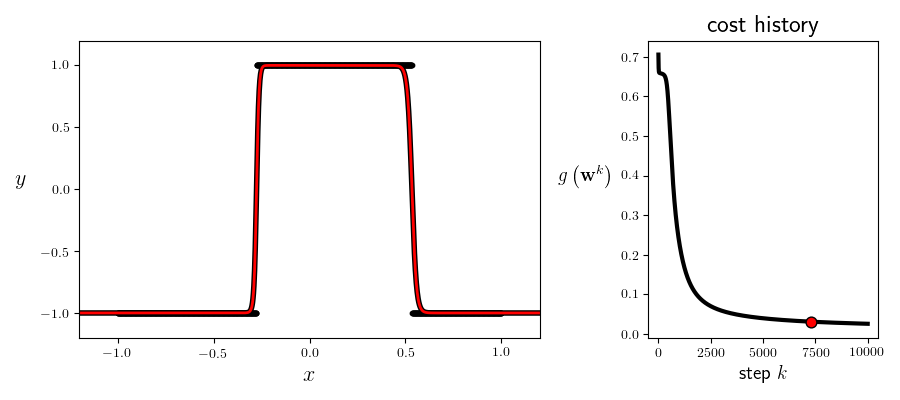
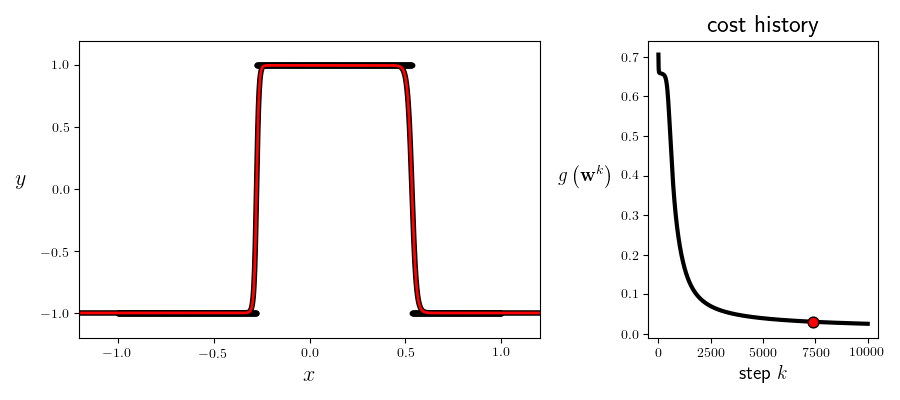
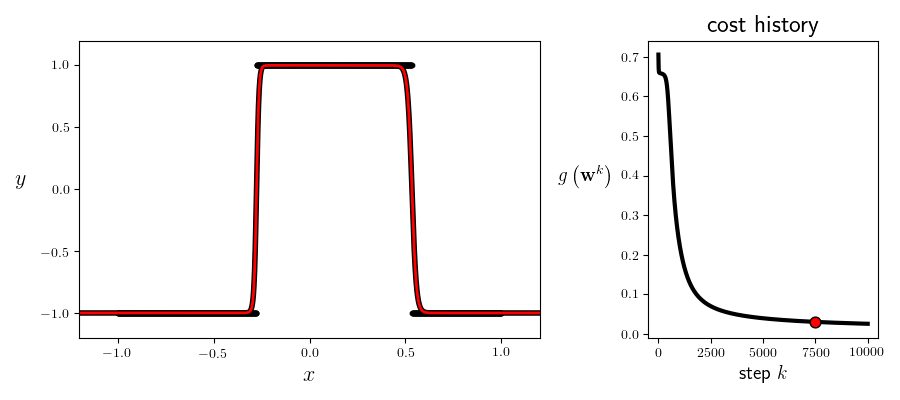
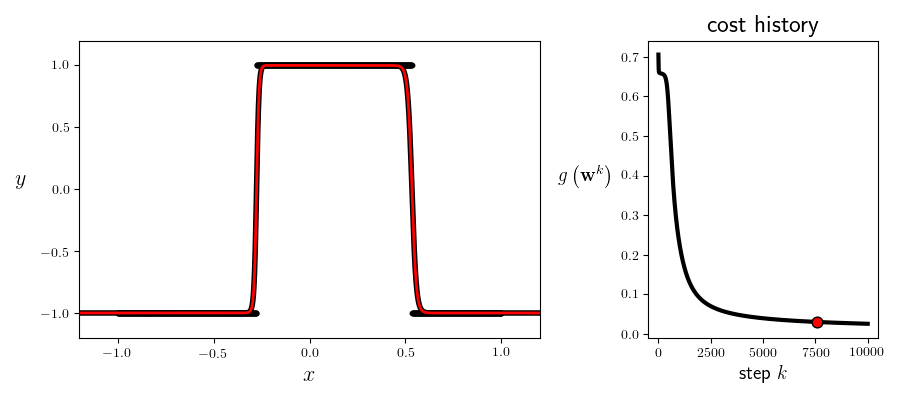
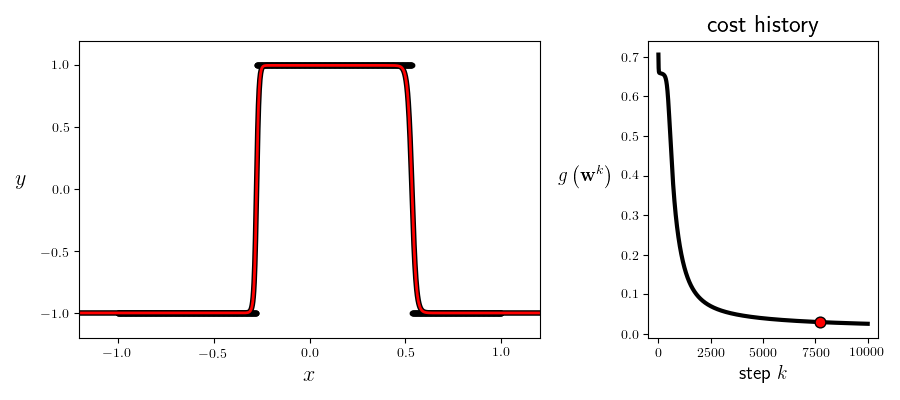
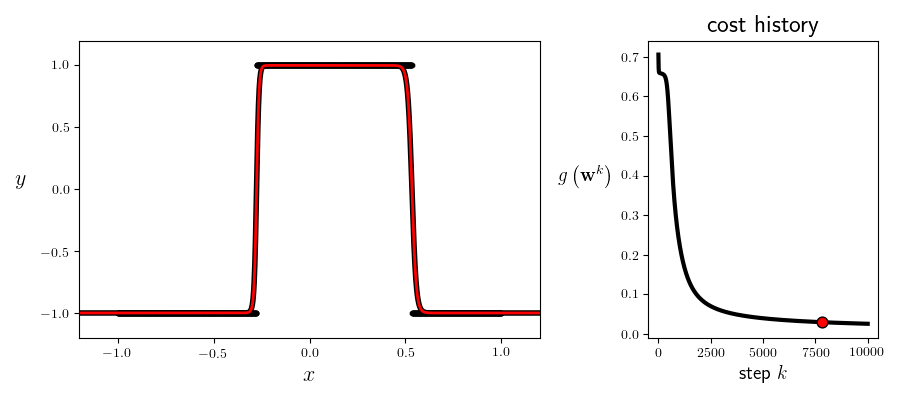
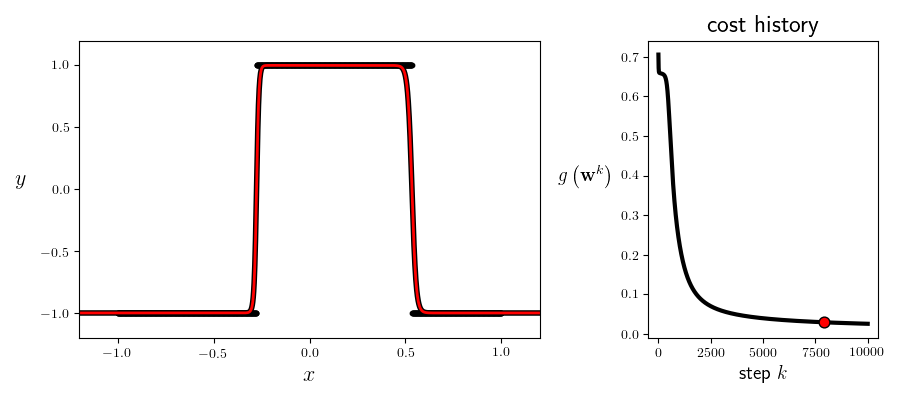
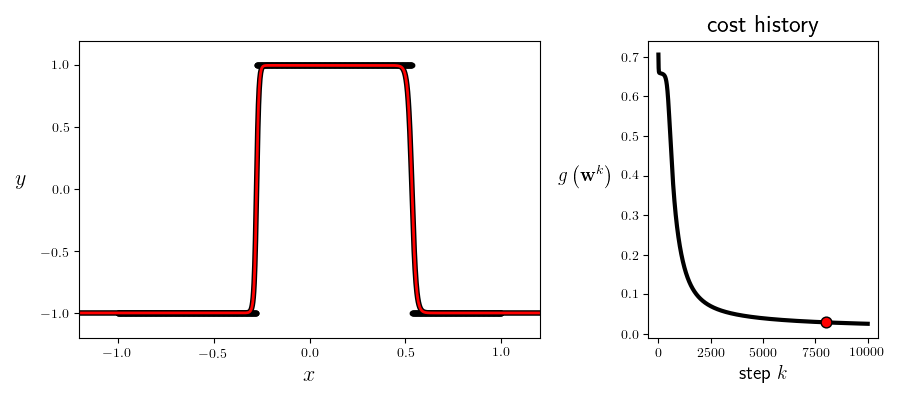
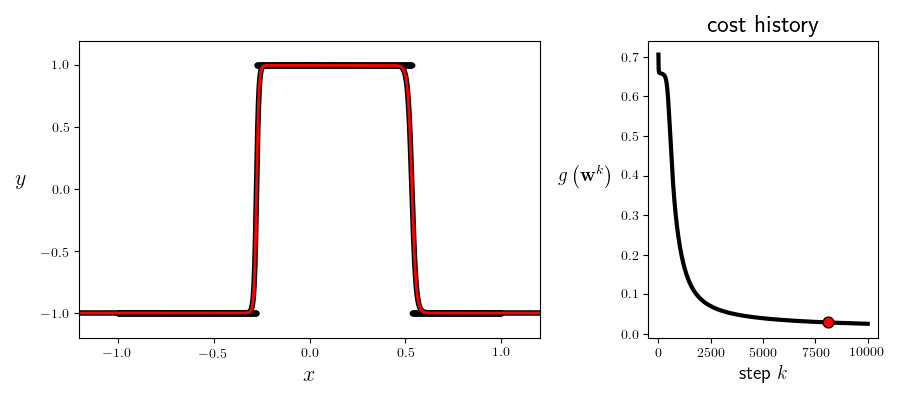
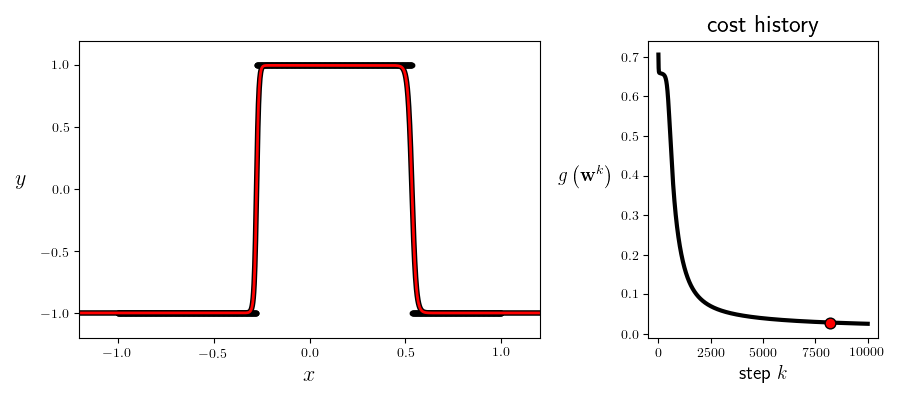
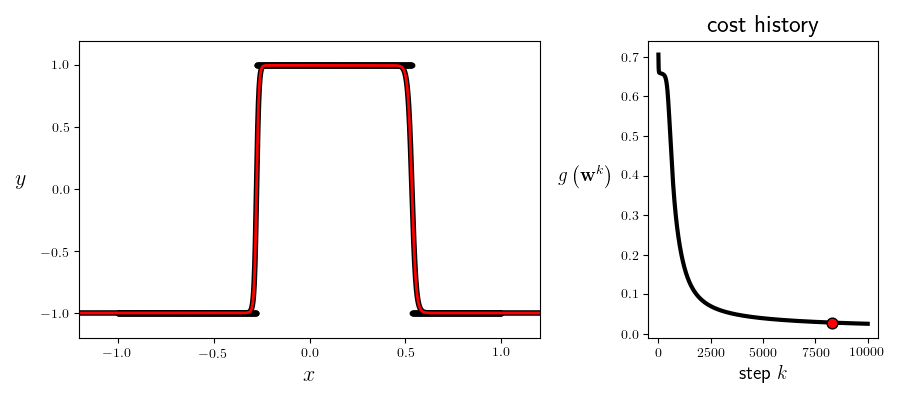
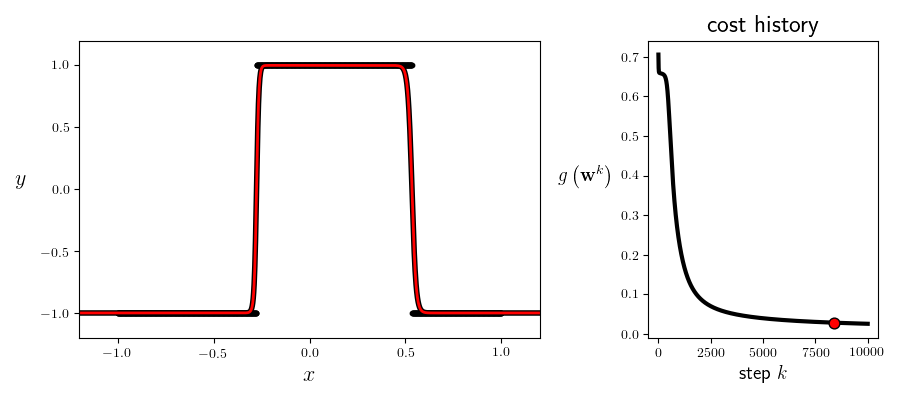
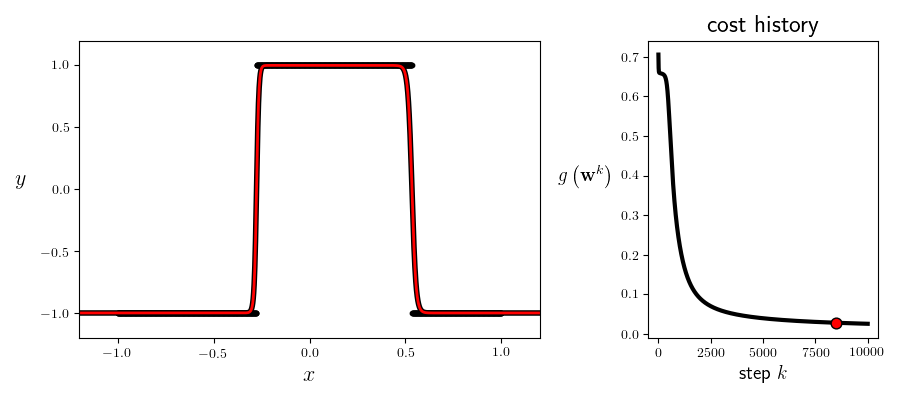
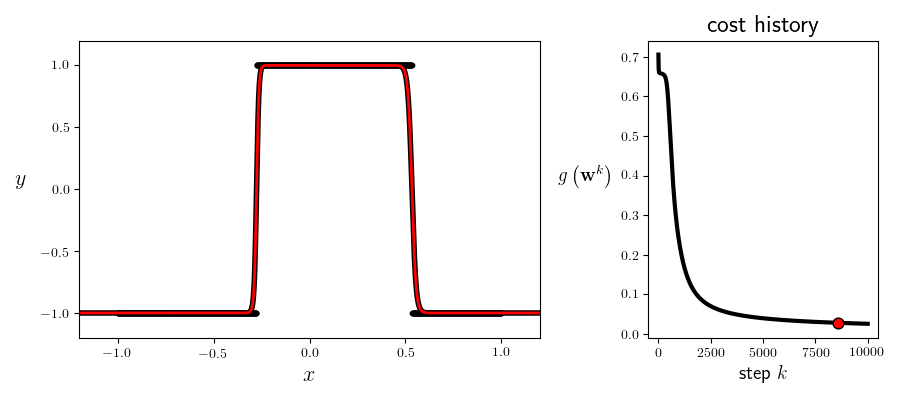
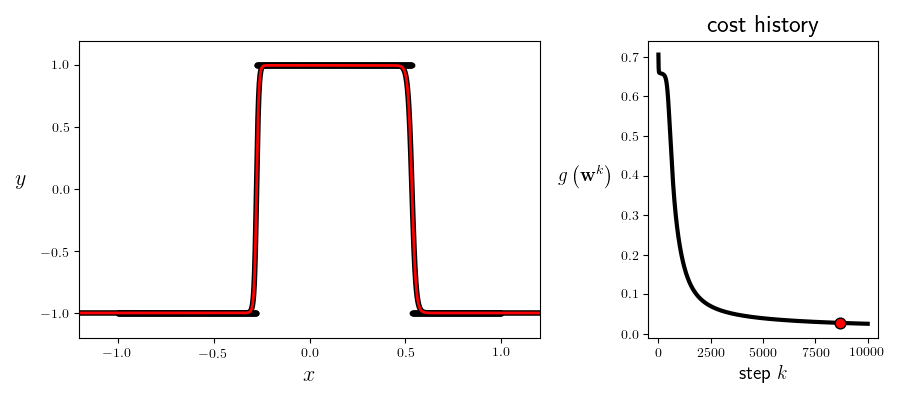
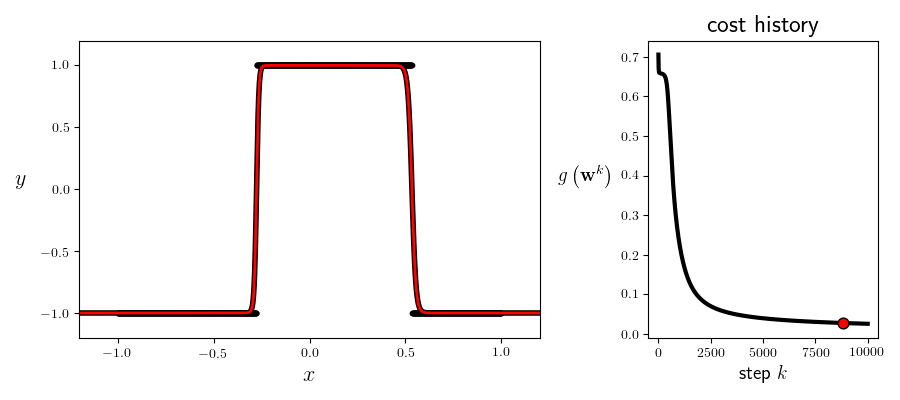
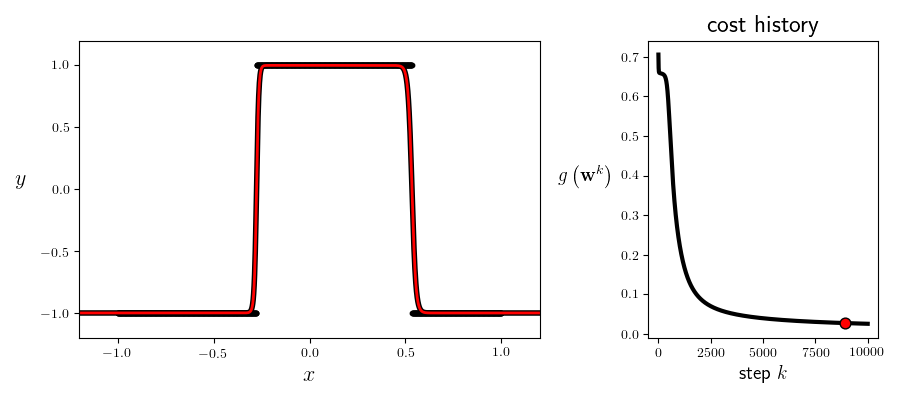
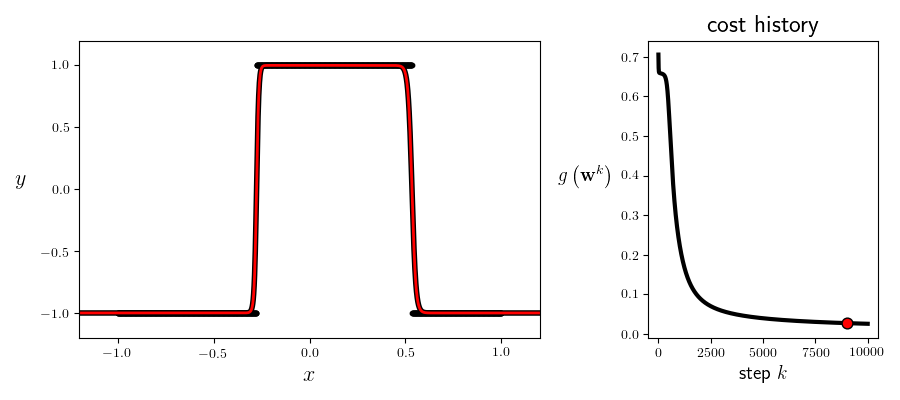
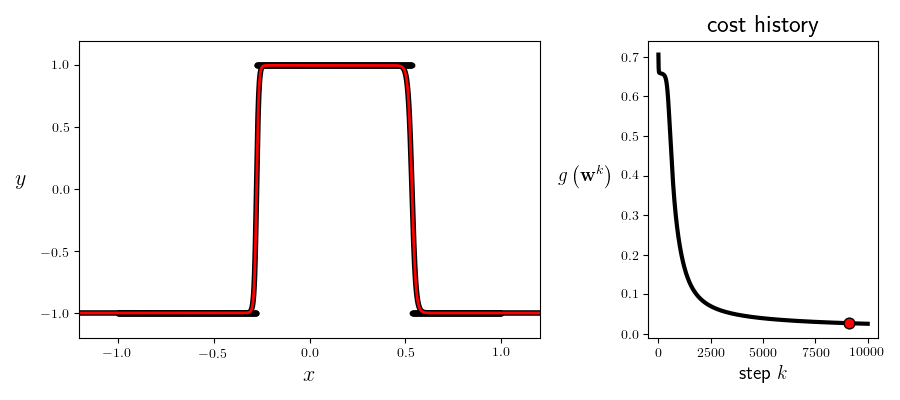
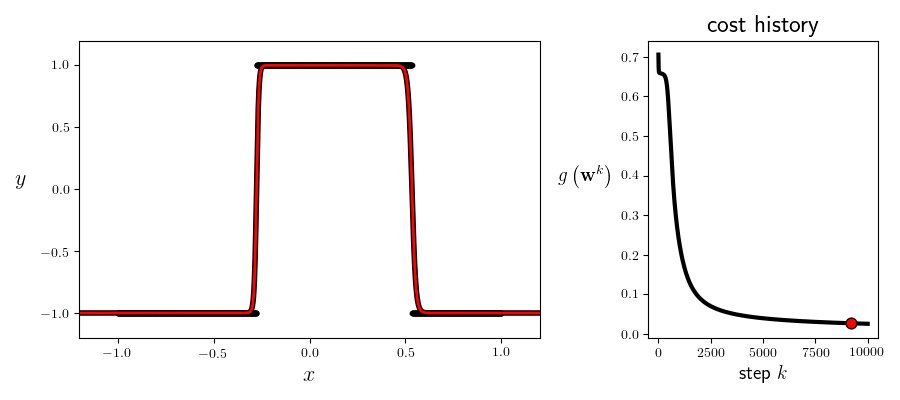
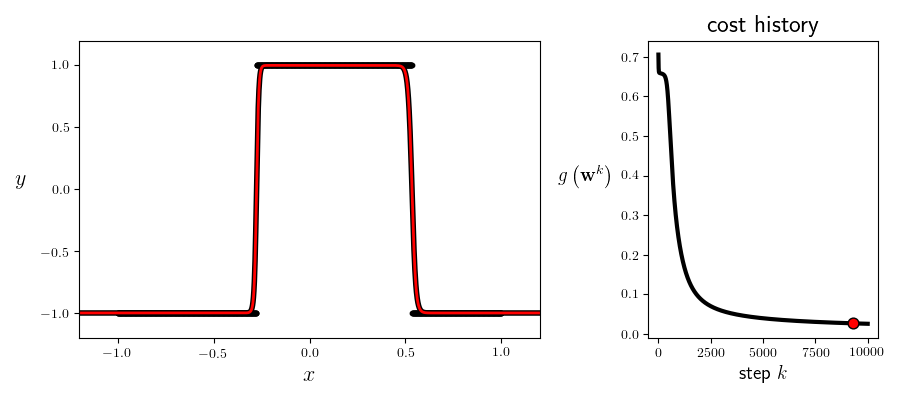
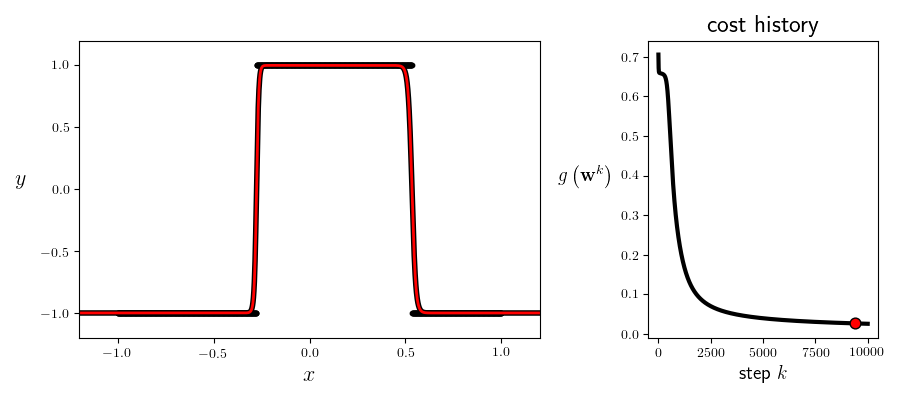
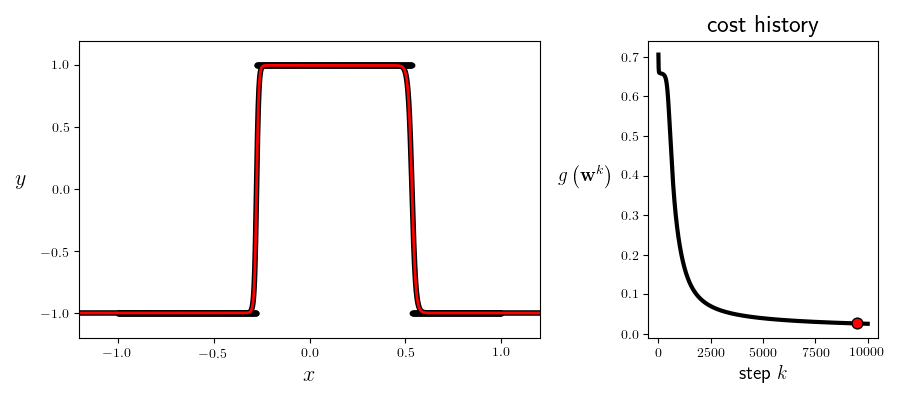
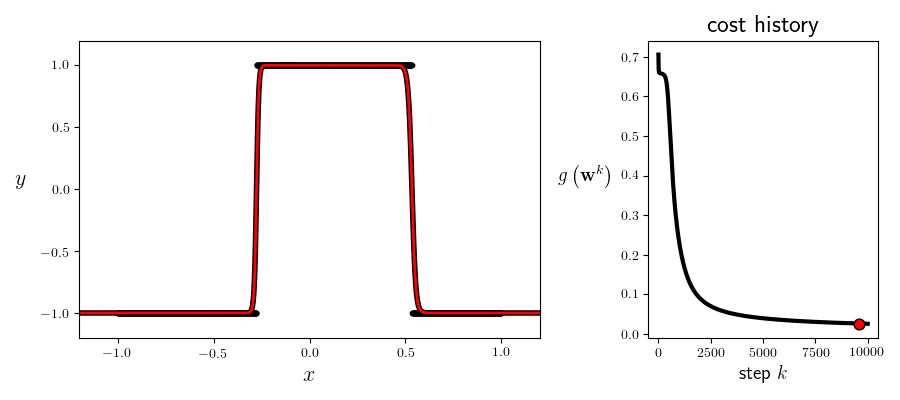
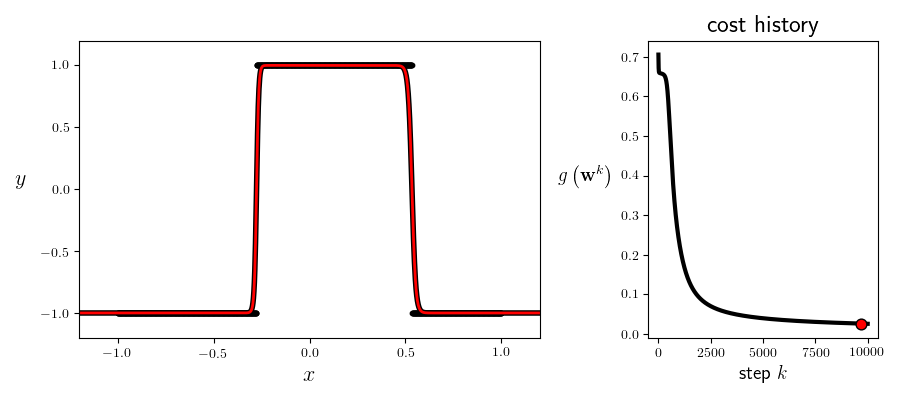
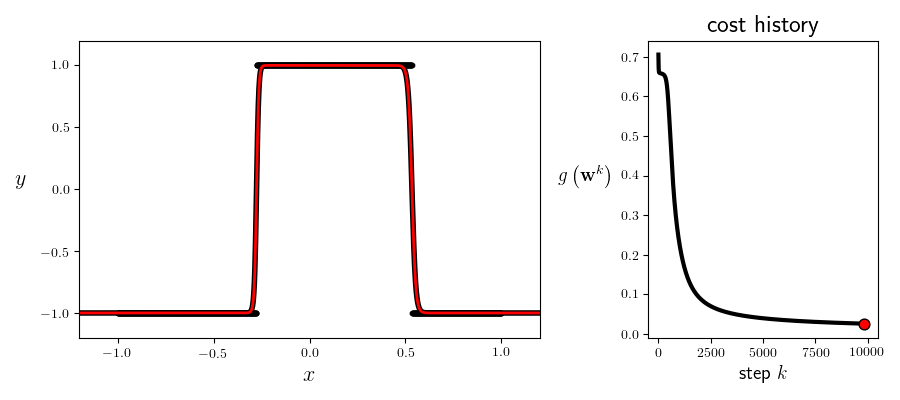
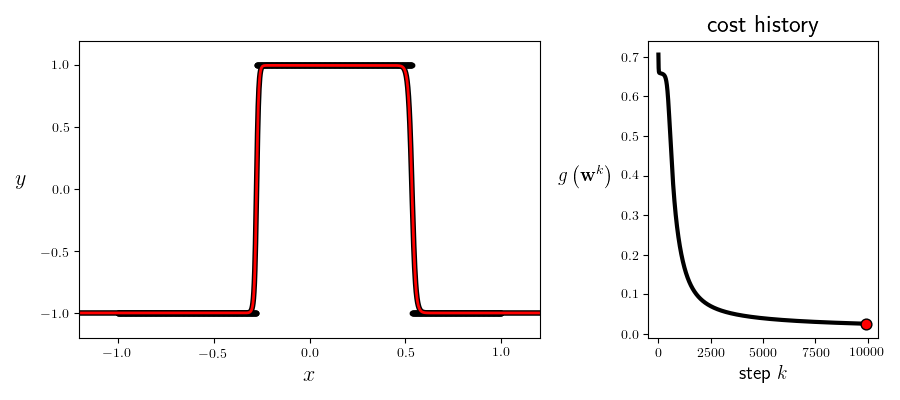
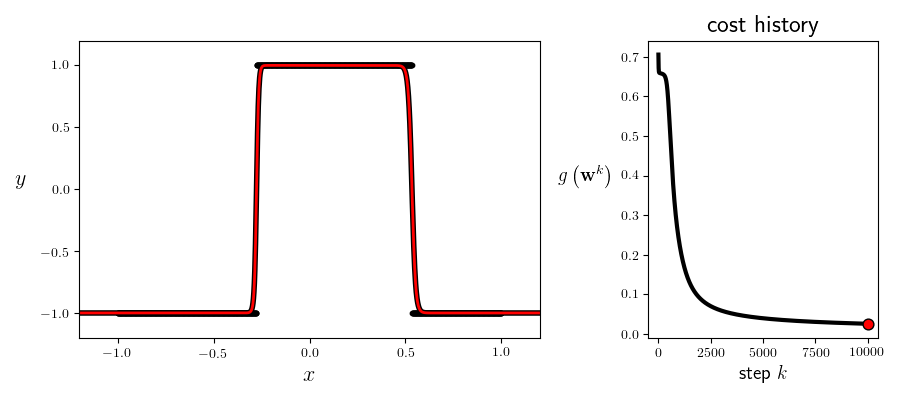

In [41]:
# load up animator
demo = nonlib.run_animators.Visualizer(csvname)

# pluck out a sample of the weight history
num_frames = 100 # how many evenly spaced weights from the history to animate

# animate based on the sample weight history
demo.animate_1d_regression(mylib,num_frames,scatter = 'function',show_history = True)

# make and store a discrete function 

<IPython.core.display.Javascript object>


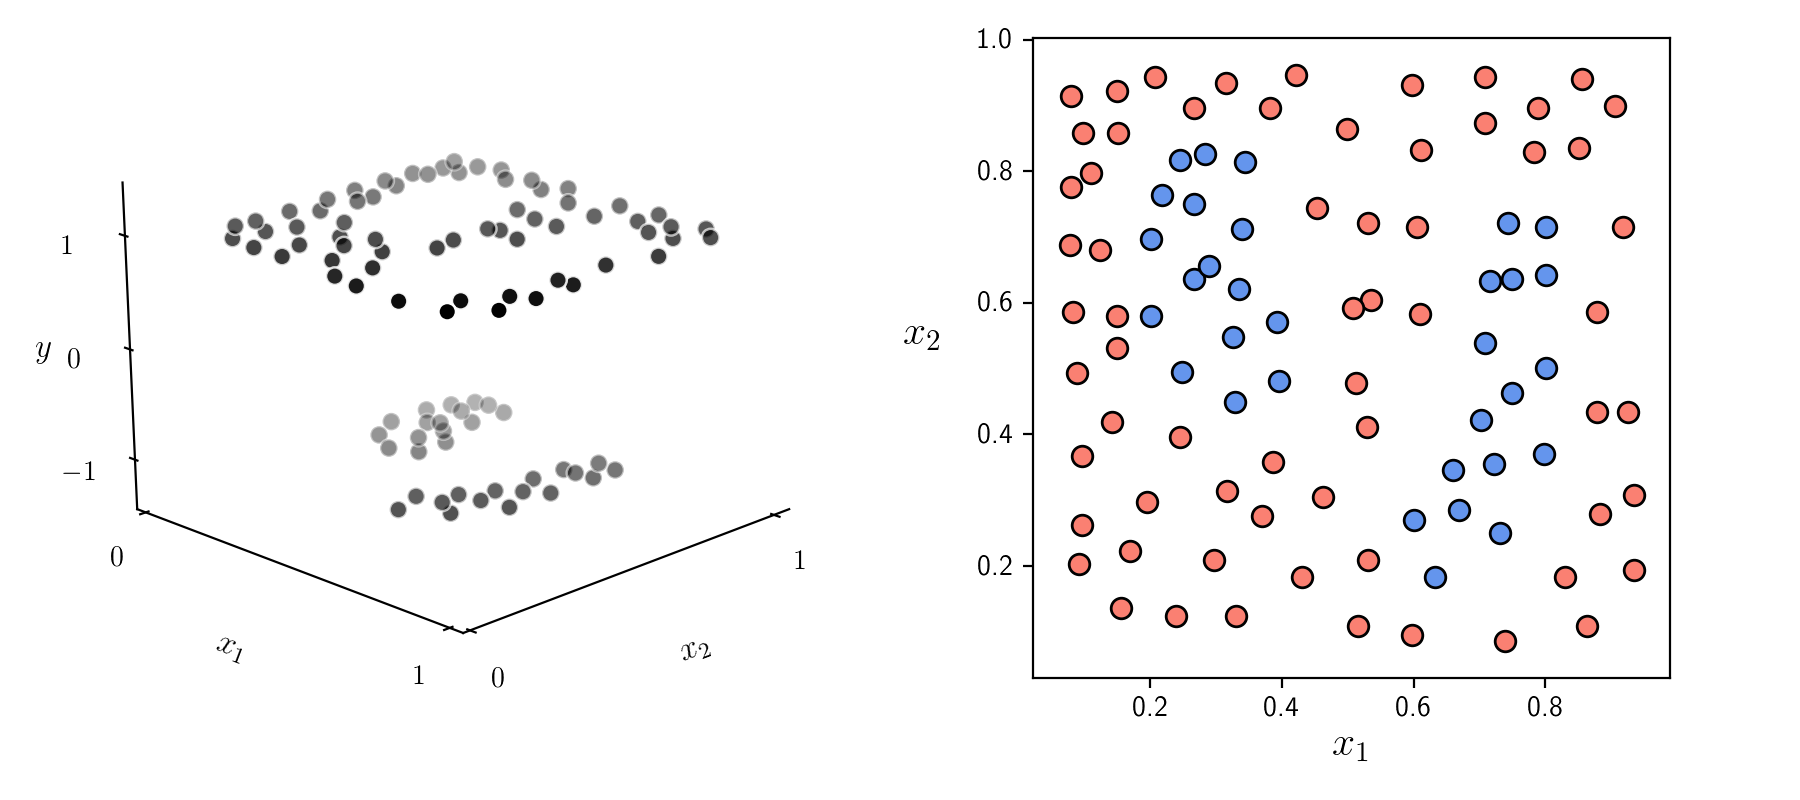

In [62]:
# create instance of linear regression demo, used below and in the next examples
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + '2eggs_data.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data()

<IPython.core.display.Javascript object>


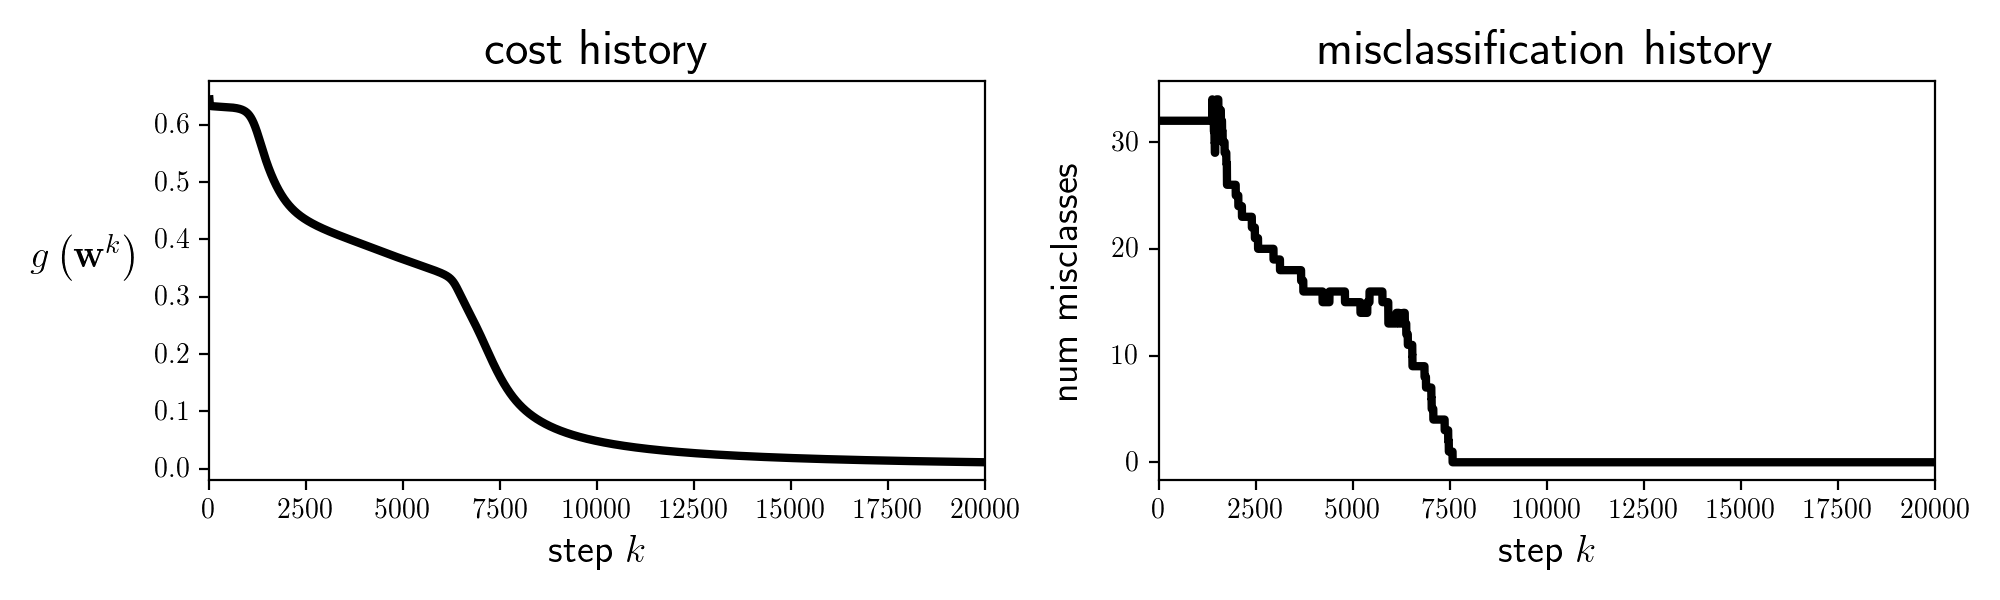

In [66]:
# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,100,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 20000,alpha_choice = 10**(-1))

# plot cost history
mylib.show_histories(start = 10)


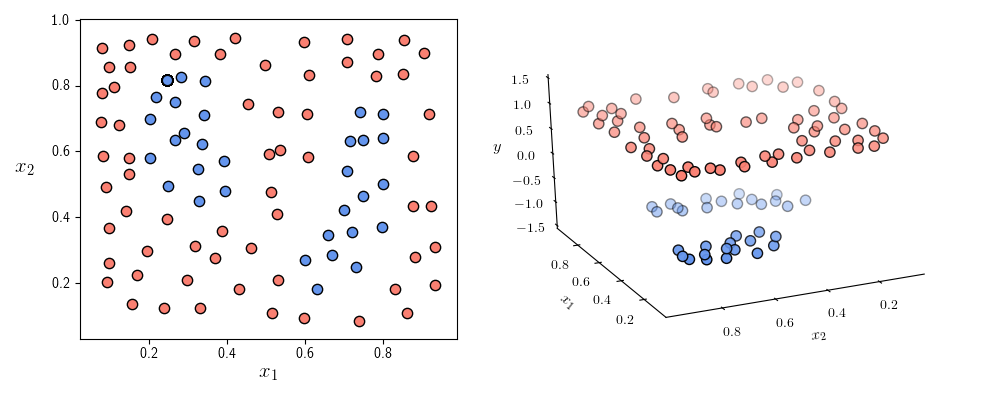
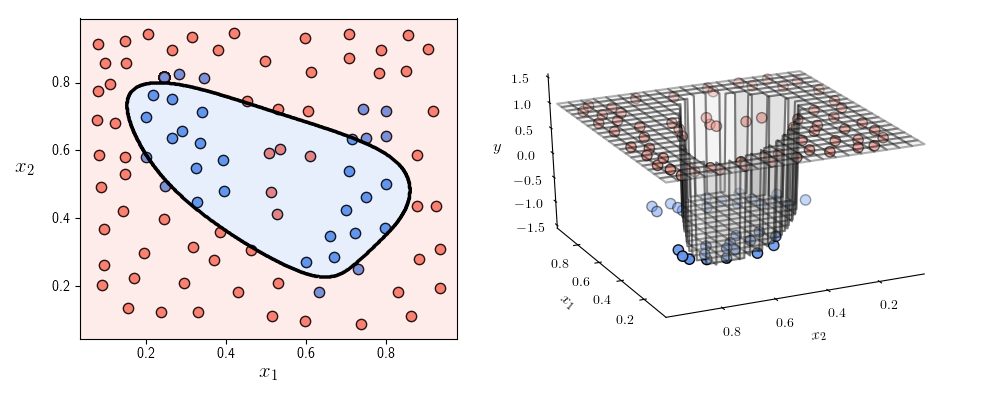
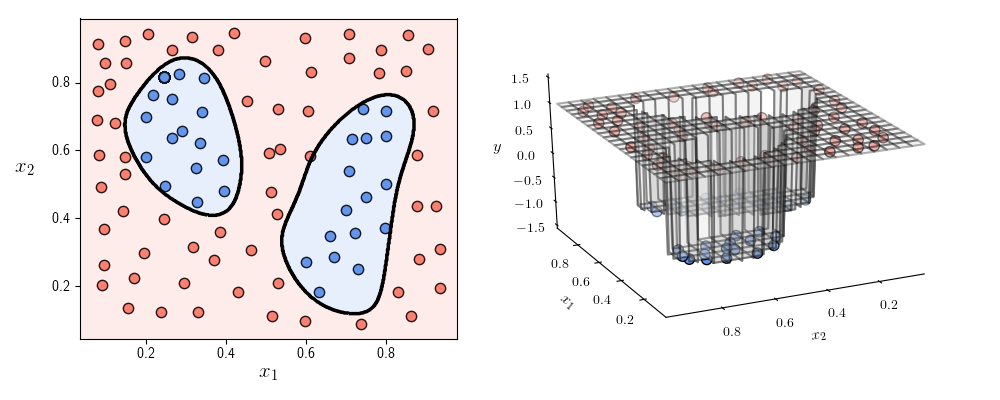
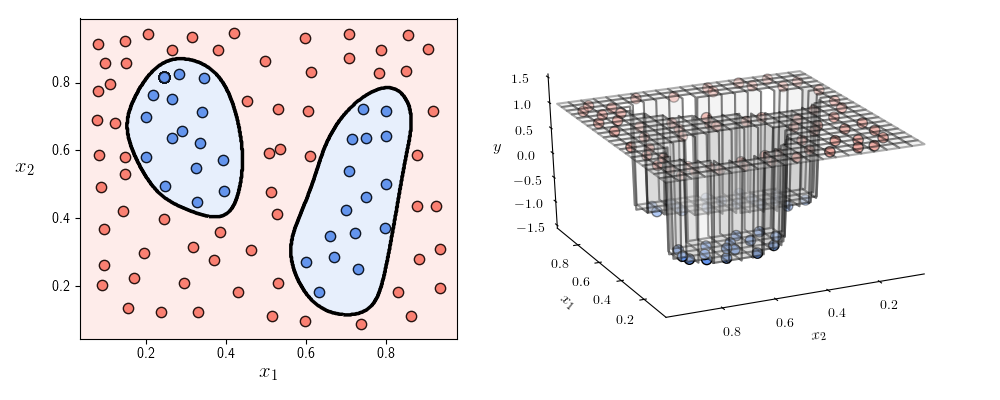
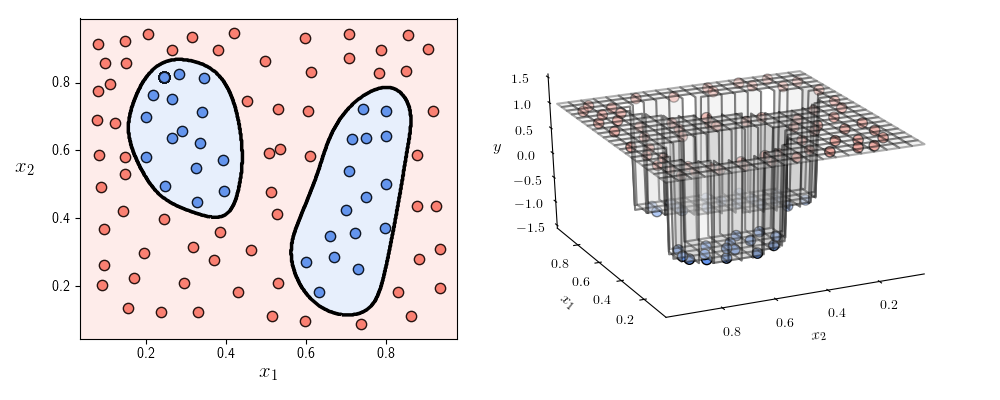
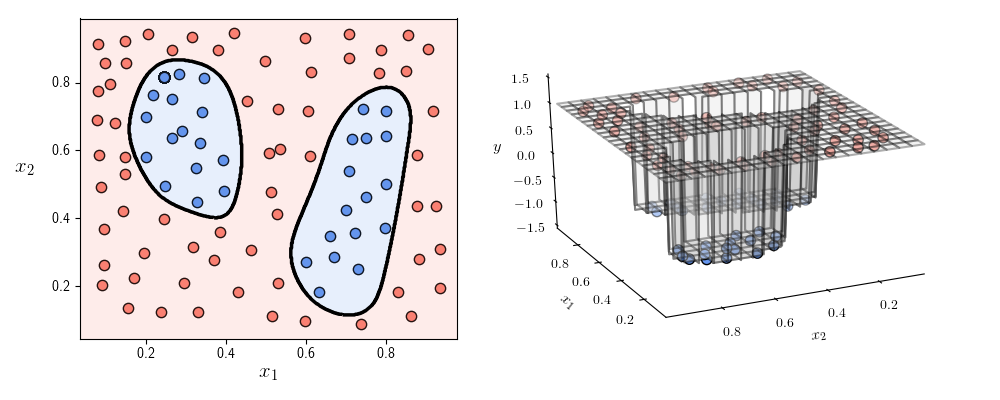

In [67]:
demo = nonlib.run_animators.Visualizer(datapath + '2eggs_data.csv')
frames = 5
demo.animate_static_N2_simple(mylib,frames,show_history = False)

In [93]:
import copy

# set plotting limits
xmax1 = np.max(copy.deepcopy(x[:,0]))
xmin1 = np.min(copy.deepcopy(x[:,0]))
xgap1 = (xmax1 - xmin1)*0
xmin1 -= xgap1
xmax1 += xgap1

xmax2 = np.max(copy.deepcopy(x[:,1]))
xmin2 = np.min(copy.deepcopy(x[:,1]))
xgap2 = (xmax2 - xmin2)*0
xmin2 -= xgap2
xmax2 += xgap2

# plot boundary for 2d plot
r1 = np.linspace(0,1,100)
r2 = np.linspace(0,1,100)
s,t = np.meshgrid(r1,r2)
s = np.reshape(s,(np.size(s),1))
t = np.reshape(t,(np.size(t),1))
h = np.concatenate((s,t),axis = 1)
z = mylib.model(mylib.normalizer(h.T),mylib.weight_histories[0][-1])
z = np.sign(z)

In [94]:
data = np.vstack((h.T,z))

In [95]:
data.shape

(3, 10000)

In [96]:
csvname = datapath + '2eggs_function.csv'
np.savetxt(csvname,data,delimiter = ',')

In [89]:
np.unique(data[2,:])

array([-1.,  1.])

In [47]:
xmax1

0.81725000000000003

In [49]:
xmin2

0.21773999999999999

<IPython.core.display.Javascript object>


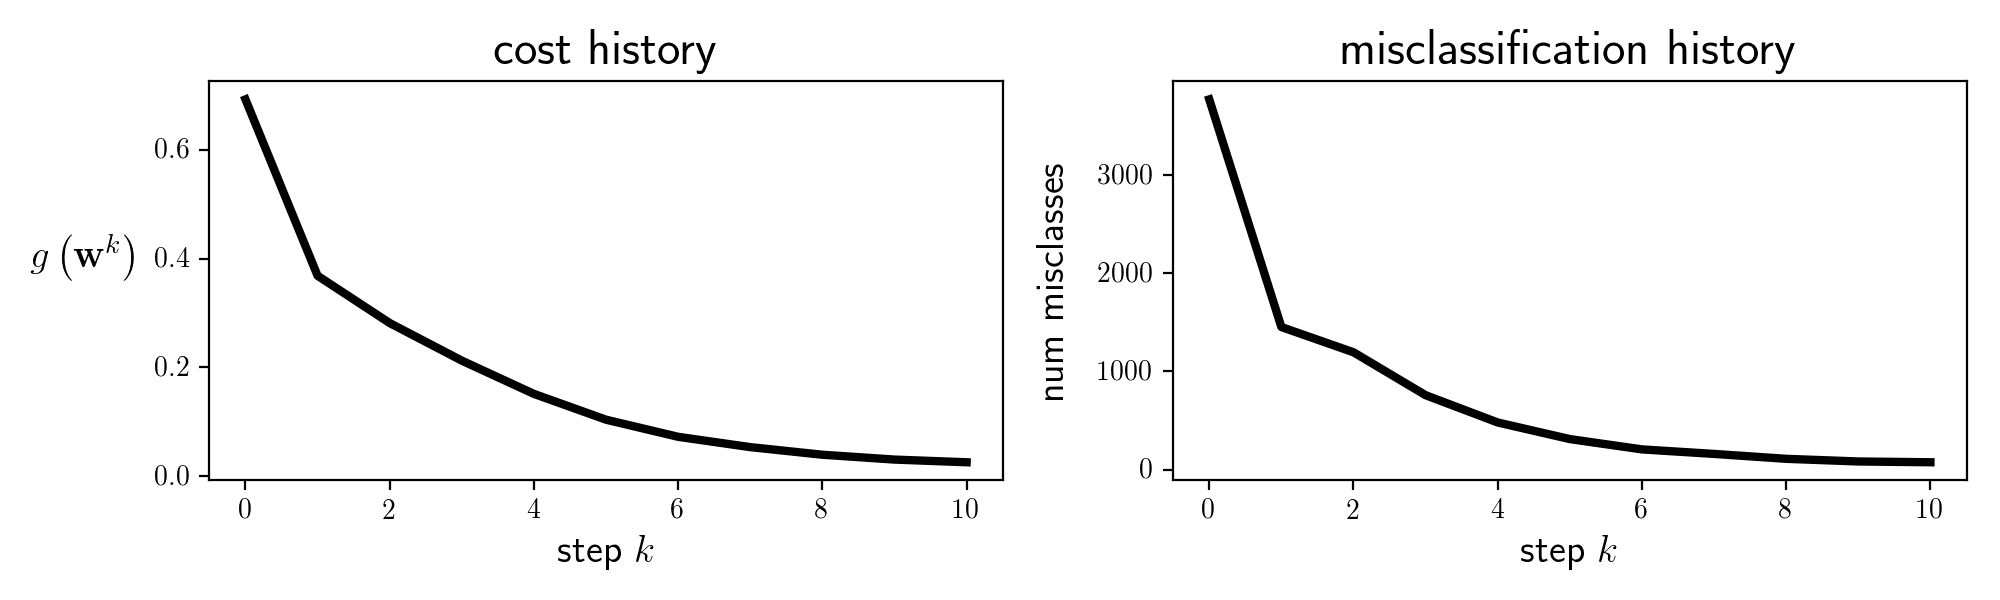

In [118]:
# load in data
csvname = datapath + '2eggs_function.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib3 = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib3.choose_features(name = 'polys',degree = 5)

# choose normalizer
mylib3.choose_normalizer(name = 'none')

# choose cost
mylib3.choose_cost(name = 'softmax')

# fit an optimization
mylib3.fit(optimizer = 'newtons method',max_its = 10,epsilon = 10**(-9))

# plot
demo5 = nonlib.run_animators.Visualizer(datapath + '2eggs_function.csv')
frames = 3
demo5.animate_static_N2_simple(mylib3,frames,show_history = False,scatter = 'off',view = [30,-50])


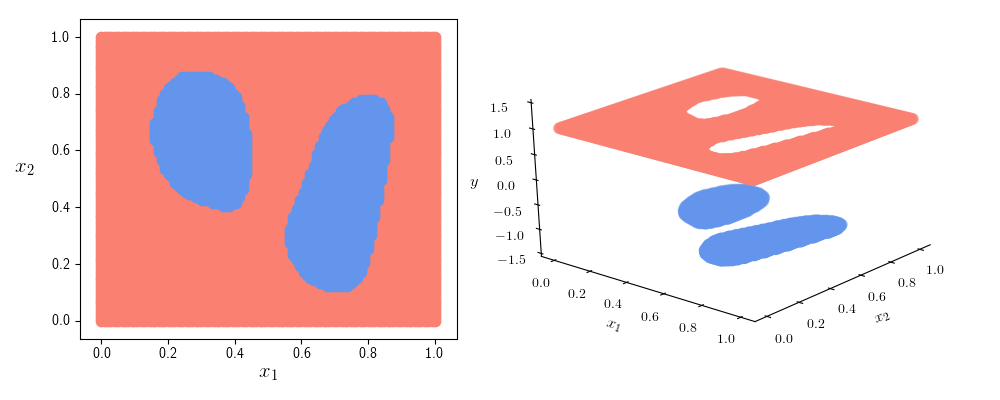
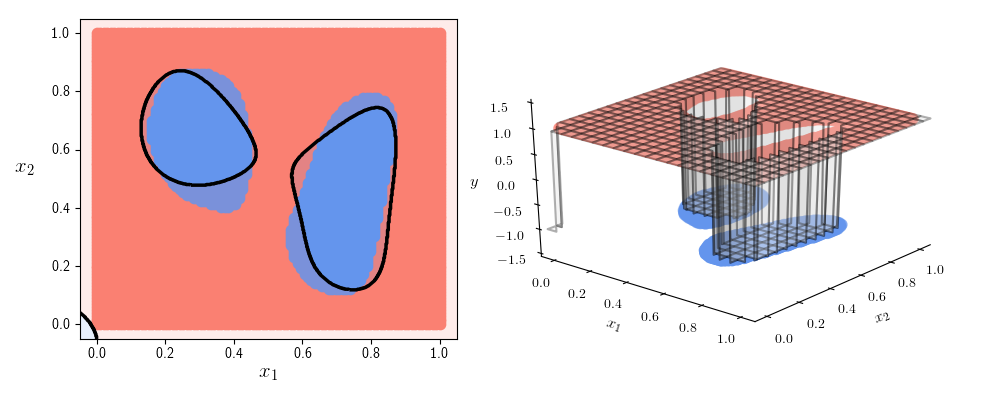
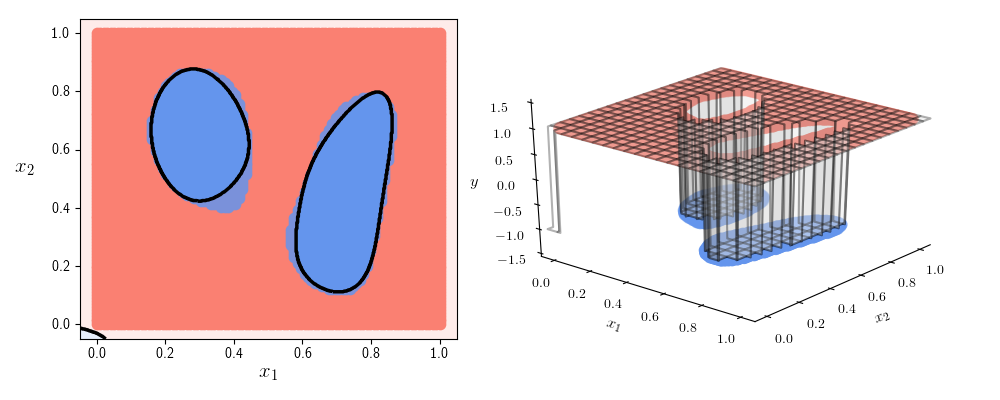
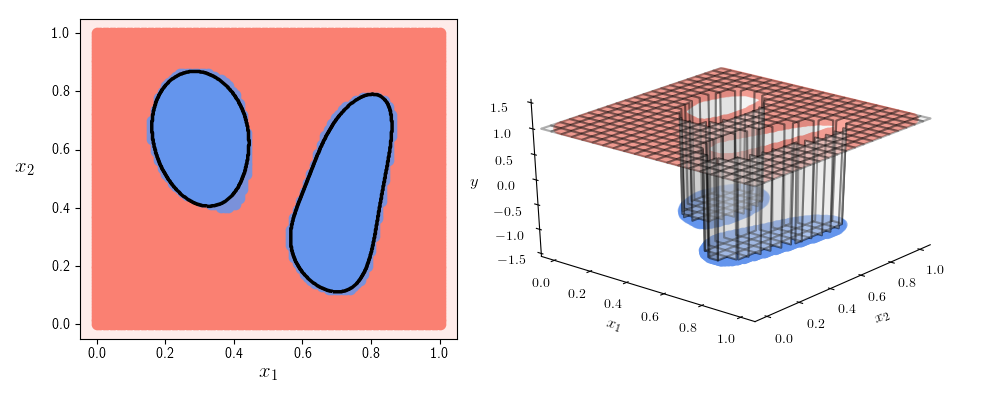

In [119]:
demo5 = nonlib.run_animators.Visualizer(datapath + '2eggs_function.csv')
frames = 3
demo5.animate_static_N2_simple(mylib3,frames,show_history = False,scatter = 'off',view = [30,-50])

# normalizing architecture

In [272]:
# create initial weights for arbitrary feedforward network
def initialize_network_weights():
    # container for entire weight tensor
    weights = []
    
    # loop over desired layer sizes and create appropriately sized initial 
    # weight matrix for each layer
    for k in range(len(layer_sizes)-1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k+1,U_k_plus_1)
        if k < len(layer_sizes)-2:
            v = scale*np.random.randn(2,1)
            weights.append([weight,v])
        else:
            weights.append(weight)

    # re-express weights so that w_init[0] = omega_inner contains all 
    # internal weight matrices, and w_init = w contains weights of 
    # final linear combination in predict function
    w_init = [weights[:-1],weights[-1]]
    
    return w_init

# choose a nonlinear activation function 
def activation(t):
    nonlinearity = np.tanh(t)
    return nonlinearity

# fully evaluate our network features using the tensor of weights in w
def feature_transforms_normalized(a, w):    
    # loop through each layer matrix
    for W,v in w:
        #  pad with ones (to compactly take care of bias) for next layer computation        
        o = np.ones((1,np.shape(a)[1]))
        a = np.vstack((o,a))
        
        # compute inner product with current layer weights
        a = np.dot(a.T, W).T
    
        # output of layer activation
        a = activation(a)
        
        # normalize output
        mynorm = nonlib.library_v1.normalizers.Setup(a,name = 'standard')
        a = v[0]*mynorm.normalizer(a) + v[1]
    return a

In [269]:
layer_sizes = [1,3,5,1]
b = initialize_network_weights()

<IPython.core.display.Javascript object>


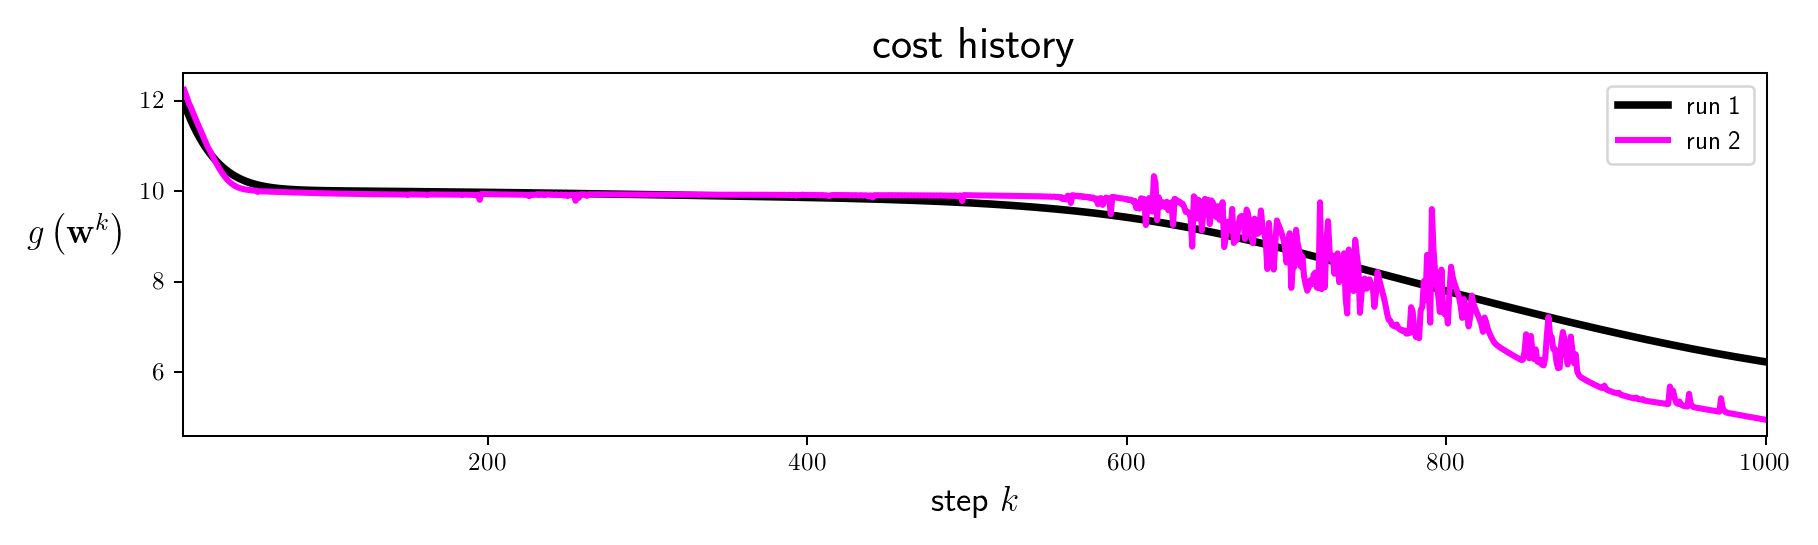

In [279]:
csvname = datapath + 'universal_regression_samples_0.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

layer_sizes = [1,10,10,1]; scale = 0.1

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-2))

# choose features
mylib.choose_features(name = 'custom',feature_transforms = feature_transforms_normalized,initializer = initialize_network_weights)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-2))

# plot cost history
mylib.show_histories(start = 10,labels = ['run 1','run 2'])

<IPython.core.display.Javascript object>


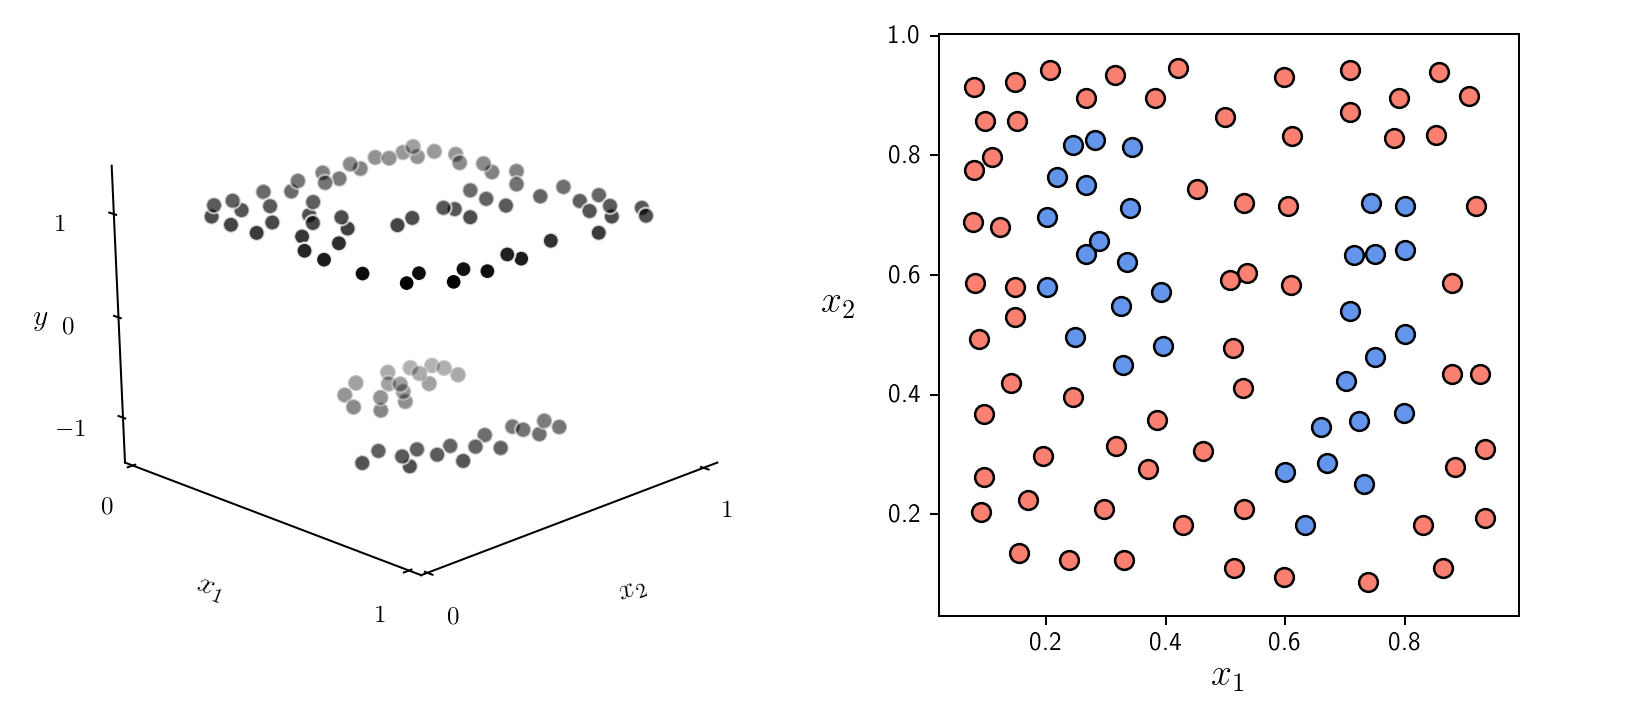

In [280]:
# create instance of linear regression demo, used below and in the next examples
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + '2eggs_data.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data()

<IPython.core.display.Javascript object>


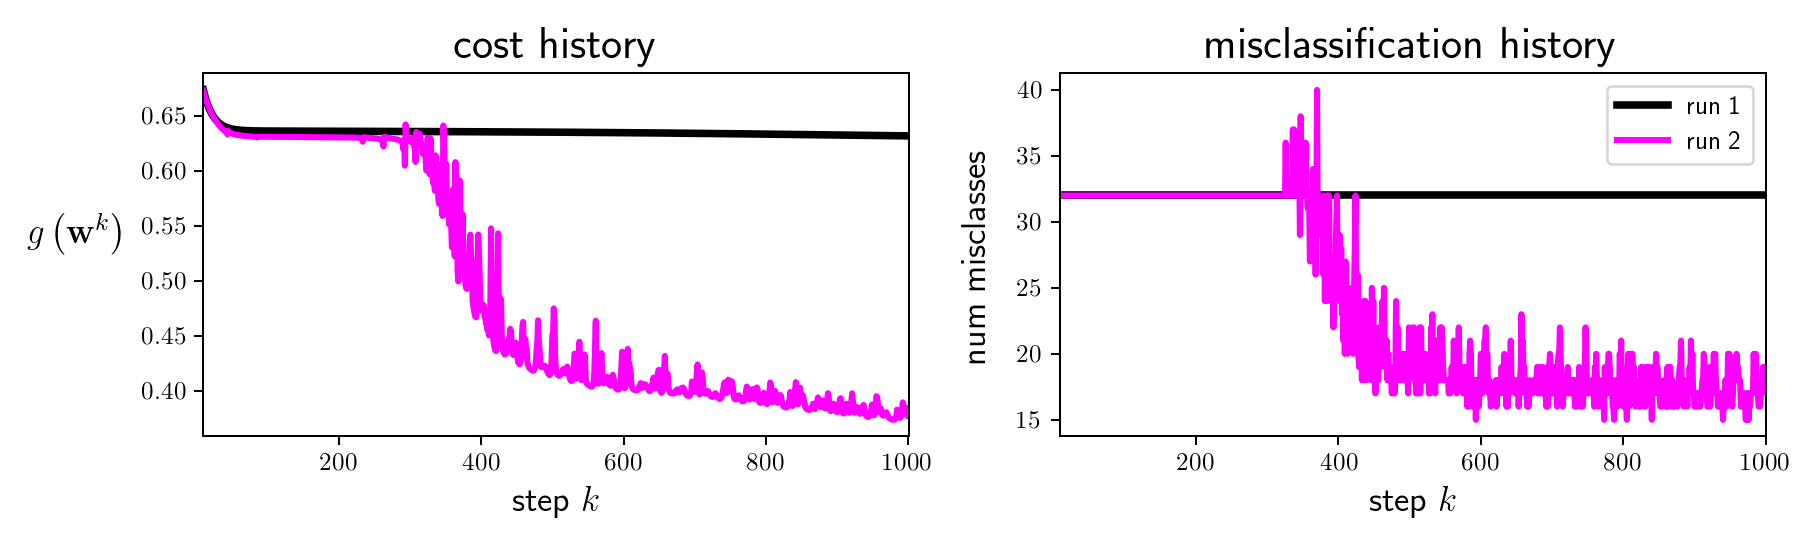

In [288]:

layer_sizes = [2,10,10,10,1]; scale = 0.1

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-1))

# choose features
mylib.choose_features(name = 'custom',feature_transforms = feature_transforms_normalized,initializer = initialize_network_weights)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-1))

# plot cost history
mylib.show_histories(start = 10,labels = ['run 1','run 2'])

In [306]:
# create initial weights for arbitrary feedforward network
def initialize_network_weights():
    # container for entire weight tensor
    weights = []
    
    # loop over desired layer sizes and create appropriately sized initial 
    # weight matrix for each layer
    for k in range(len(layer_sizes)-1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k+1,U_k_plus_1)
        weights.append(weight)

    # re-express weights so that w_init[0] = omega_inner contains all 
    # internal weight matrices, and w_init = w contains weights of 
    # final linear combination in predict function
    w_init = [weights[:-1],weights[-1]]
    
    return w_init

# choose a nonlinear activation function 
def activation(t):
    nonlinearity = np.tanh(t)
    return nonlinearity

# fully evaluate our network features using the tensor of weights in w
def feature_transforms_normalized(a, w):    
    # loop through each layer matrix
    for W in w:
        #  pad with ones (to compactly take care of bias) for next layer computation        
        o = np.ones((1,np.shape(a)[1]))
        a = np.vstack((o,a))
        
        # compute inner product with current layer weights
        a = np.dot(a.T, W).T
    
        # output of layer activation
        a = activation(a)
        
        # normalize output
        mynorm = nonlib.library_v1.normalizers.Setup(a,name = 'standard')
        a = mynorm.normalizer(a)
    return a

In [300]:
# load in mnist test set
csvname = '/Users/Nurgetson/Desktop/mnist/mnist_test_contrast_normalized.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

In [295]:
x.shape

(9999, 785)

In [301]:
data.shape

(785, 10000)

In [305]:
# define layer size
layer_sizes = [784,10,10,10,10]; scale = 0.1

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-1))


TypeError: initialize_network_weights() missing 2 required positional arguments: 'layer_sizes' and 'scale'

<IPython.core.display.Javascript object>


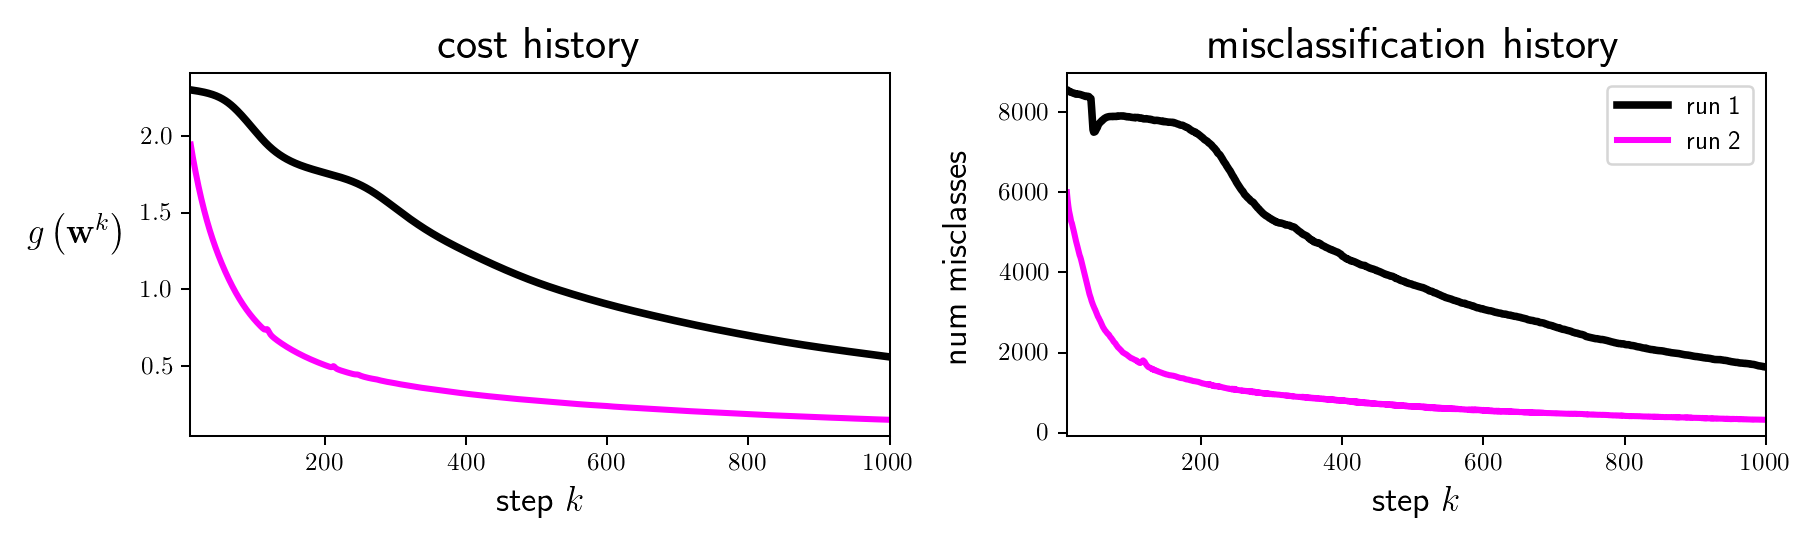

In [307]:

# choose features
mylib.choose_features(name = 'custom',feature_transforms = feature_transforms_normalized,initializer = initialize_network_weights)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-1))

# plot cost history
mylib.show_histories(start = 10,labels = ['run 1','run 2'])

## backend trees

<IPython.core.display.Javascript object>


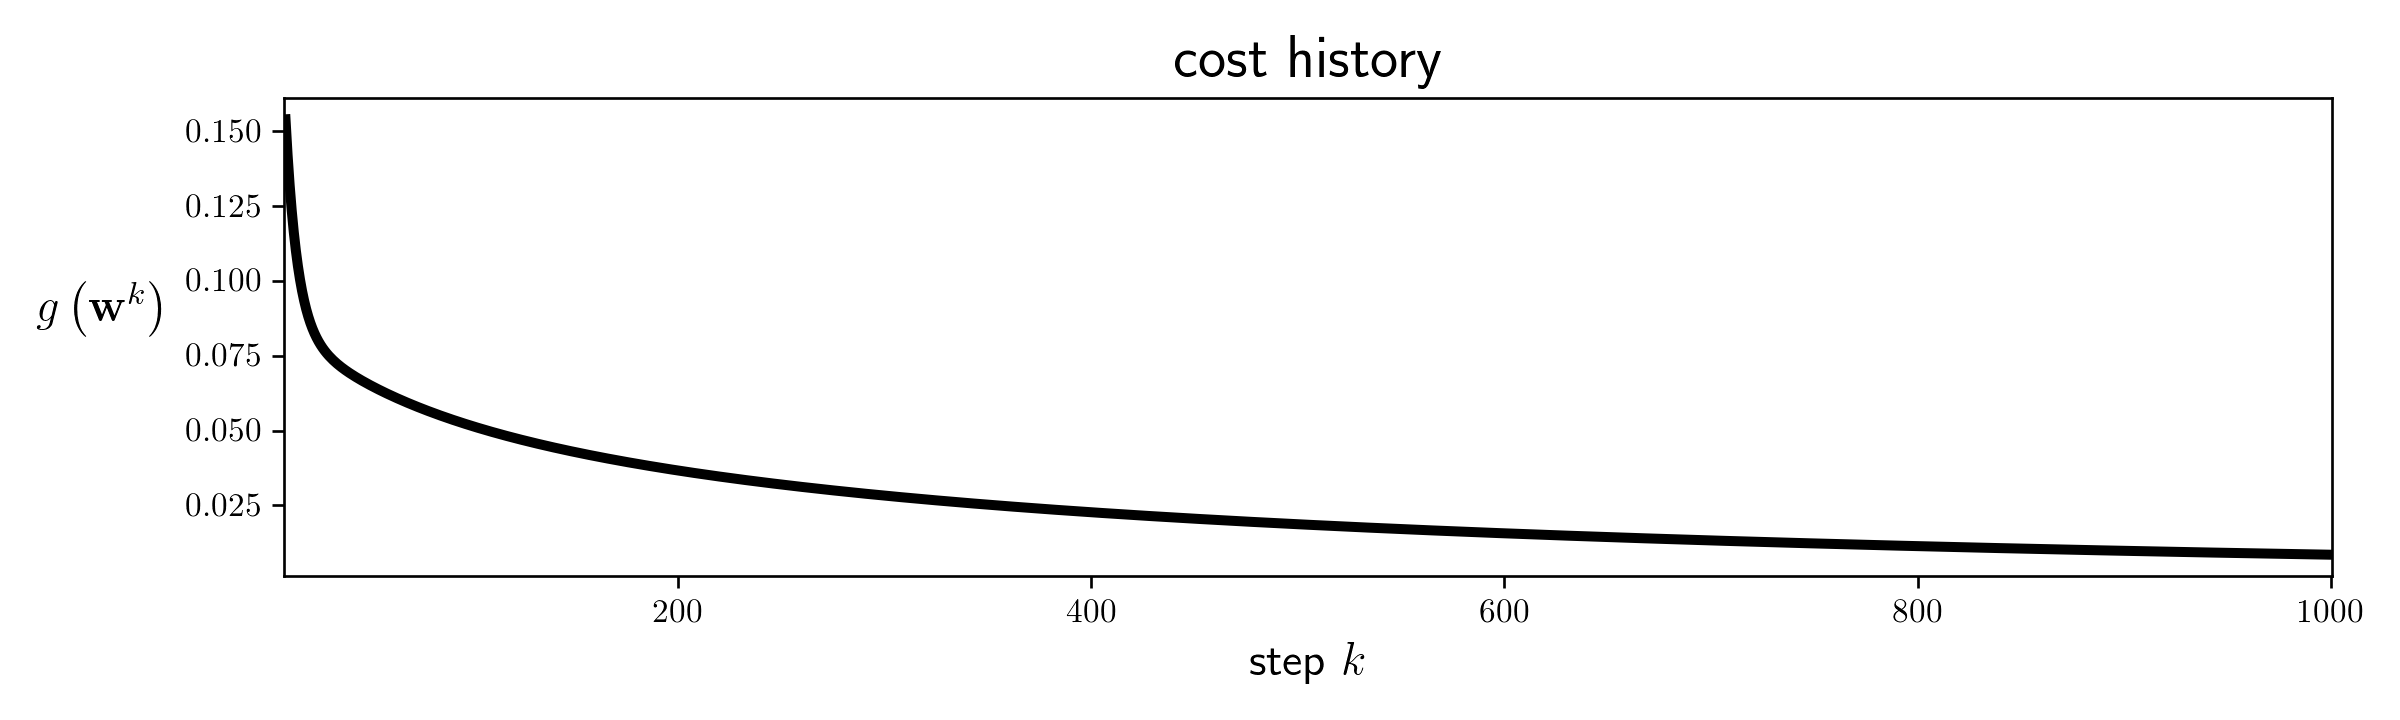

In [19]:
# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
D = 5
mylib.choose_features(name = 'stumps')

# choose normalizer
mylib.choose_normalizer(name = 'none')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-2))

# plot cost history
mylib.show_histories(start = 10)

<IPython.core.display.Javascript object>


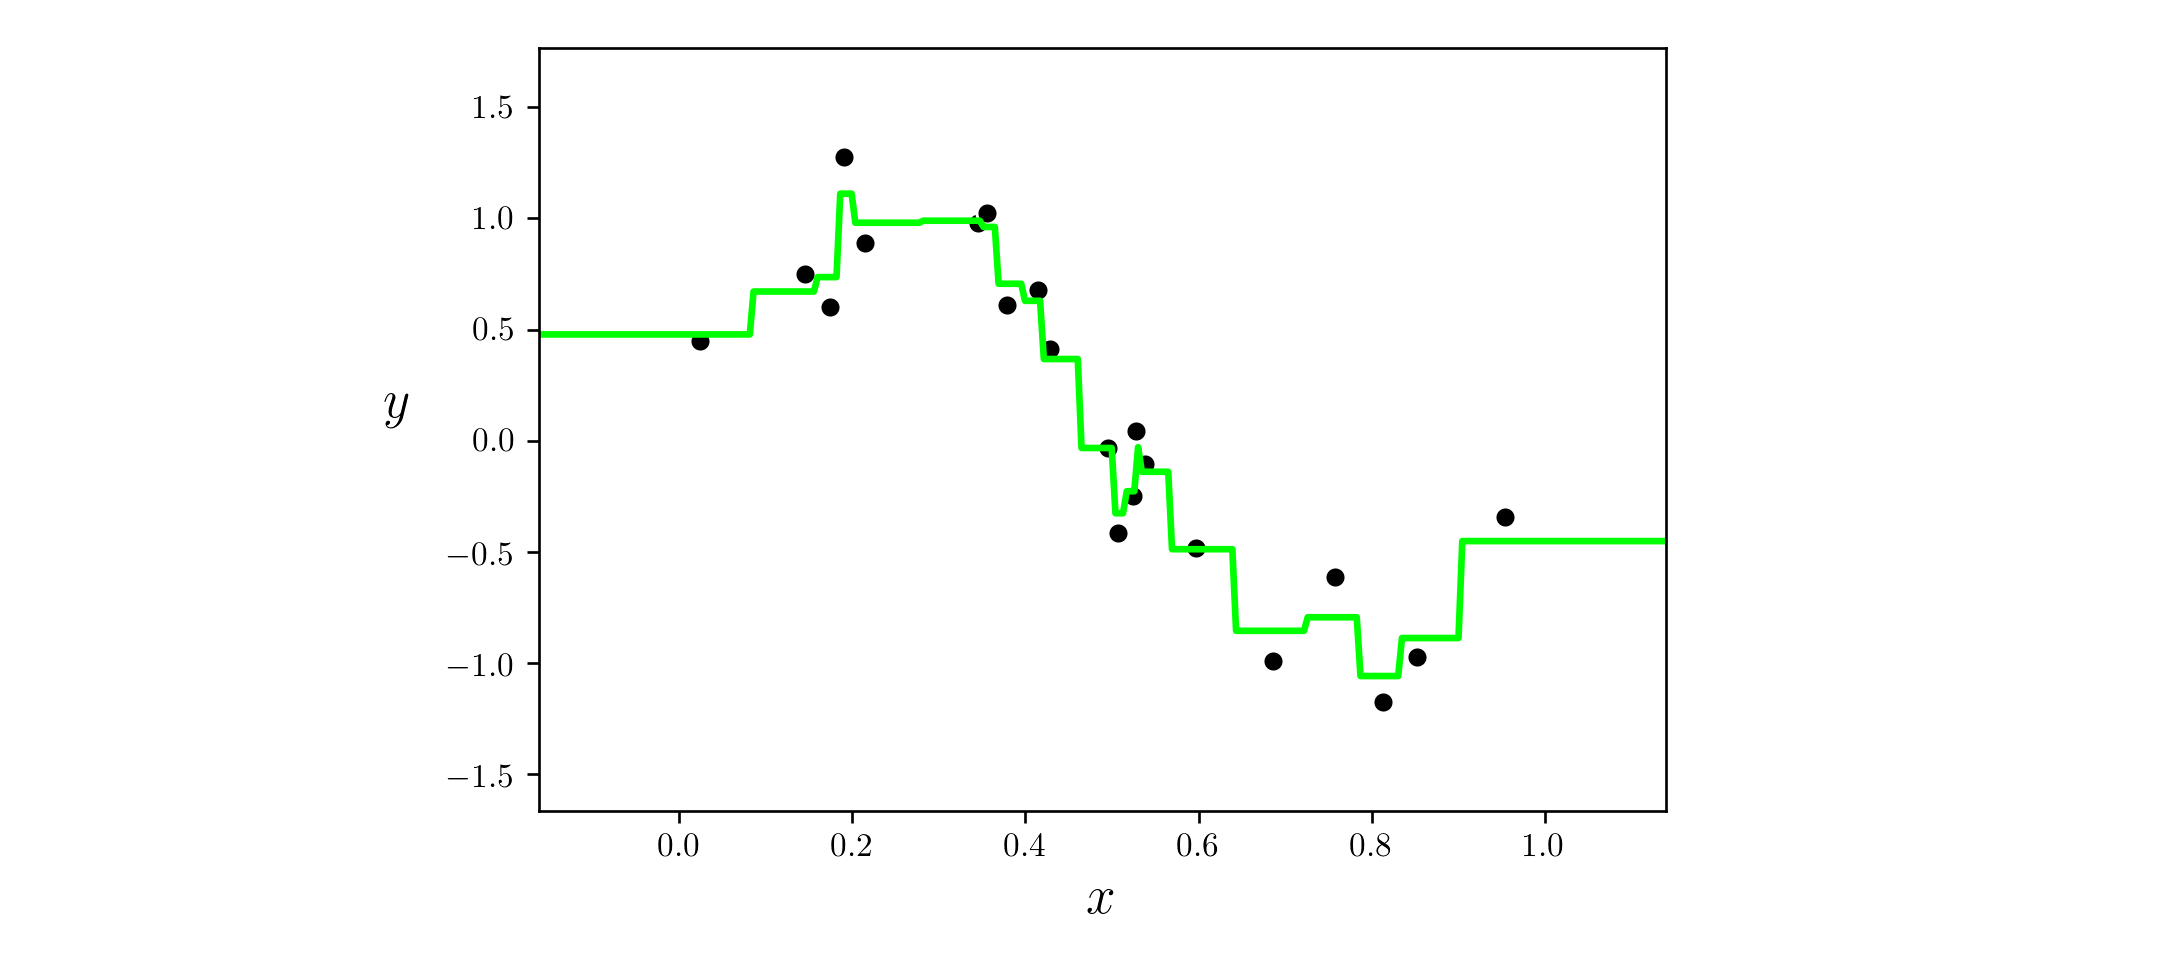

In [20]:
# plot dataset
demo = regress_plotter.Visualizer(data)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = mylib.cost_histories[-1]
w_best = mylib.weight_histories[0][-1]
demo.plot_fit(w_best,mylib.model,normalizer = mylib.normalizer);

# single variable animation

In [ ]:
aninmation_demo = nonlib.run_animators.Visualizer(datapath + '2eggs_data.csv')
weight_history = run.weight_history[40:90]
aninmation_demo.animate_static_N2_simple(weight_history,run)

# two-class classification

In [6]:
# load data
csvname = datapath + 'signed_projectile.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

<IPython.core.display.Javascript object>


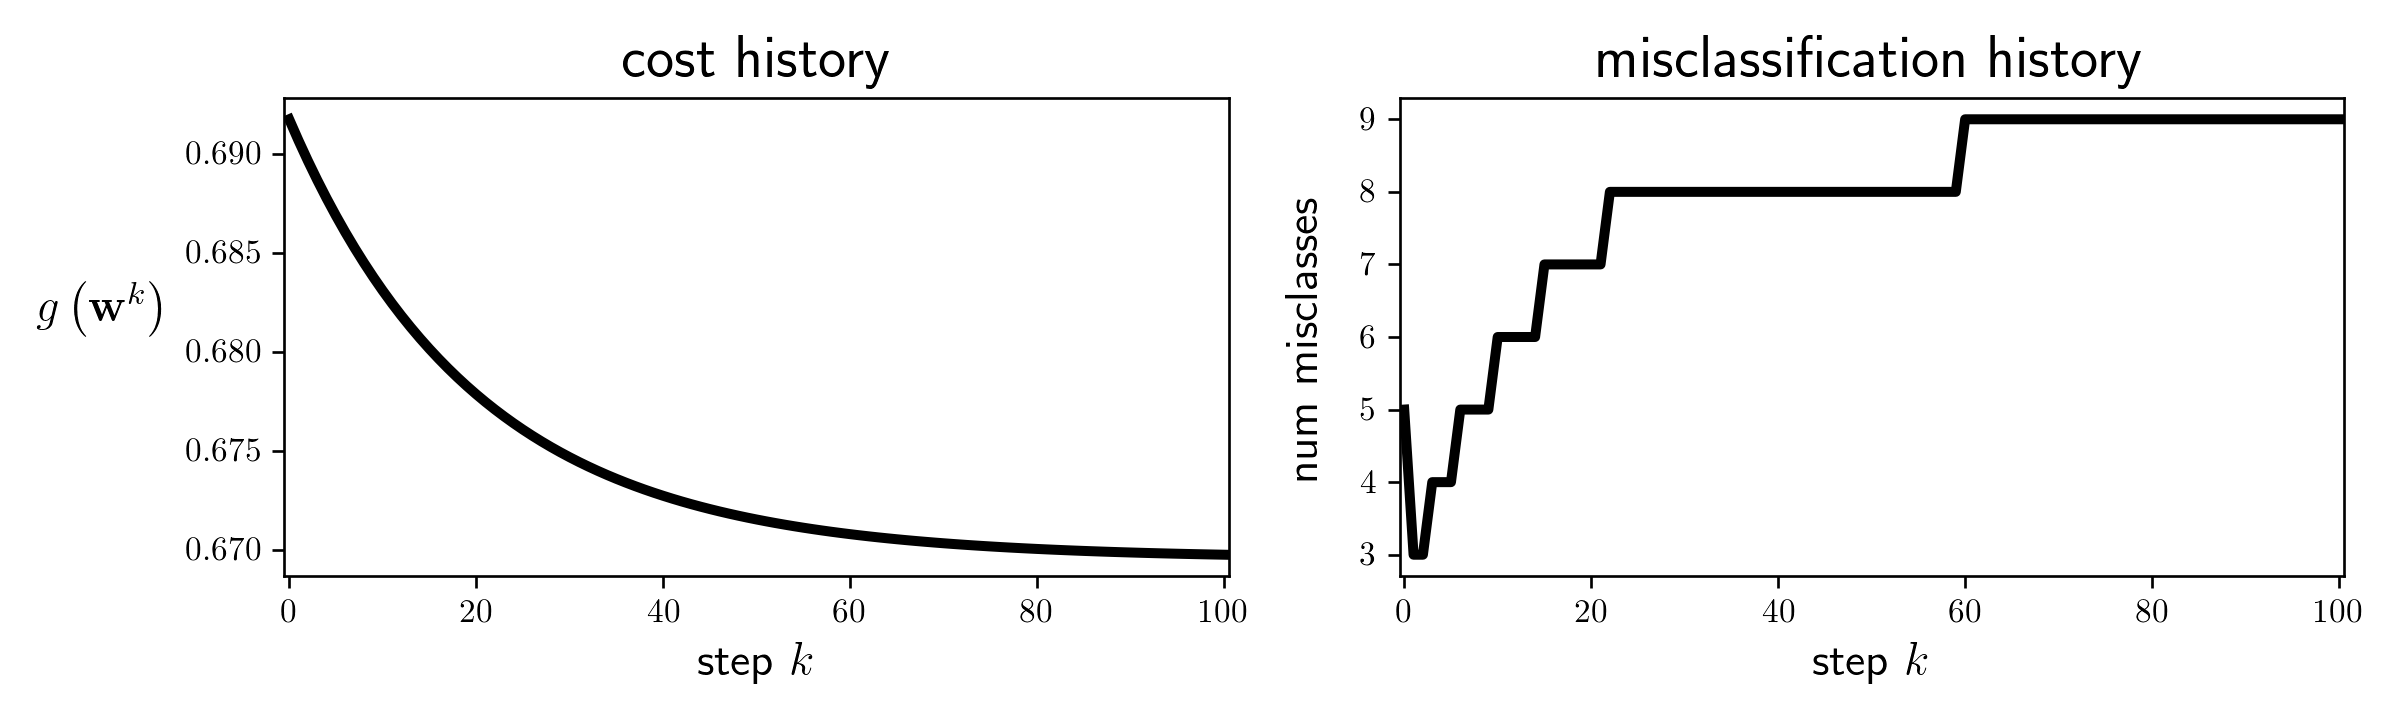

In [7]:
# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [1,1],activation = 'linear')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 100,alpha_choice = 10**(-1))

# plot histories
mylib.show_histories()

In [21]:
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + 'ellipse_2class_data.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]

<IPython.core.display.Javascript object>


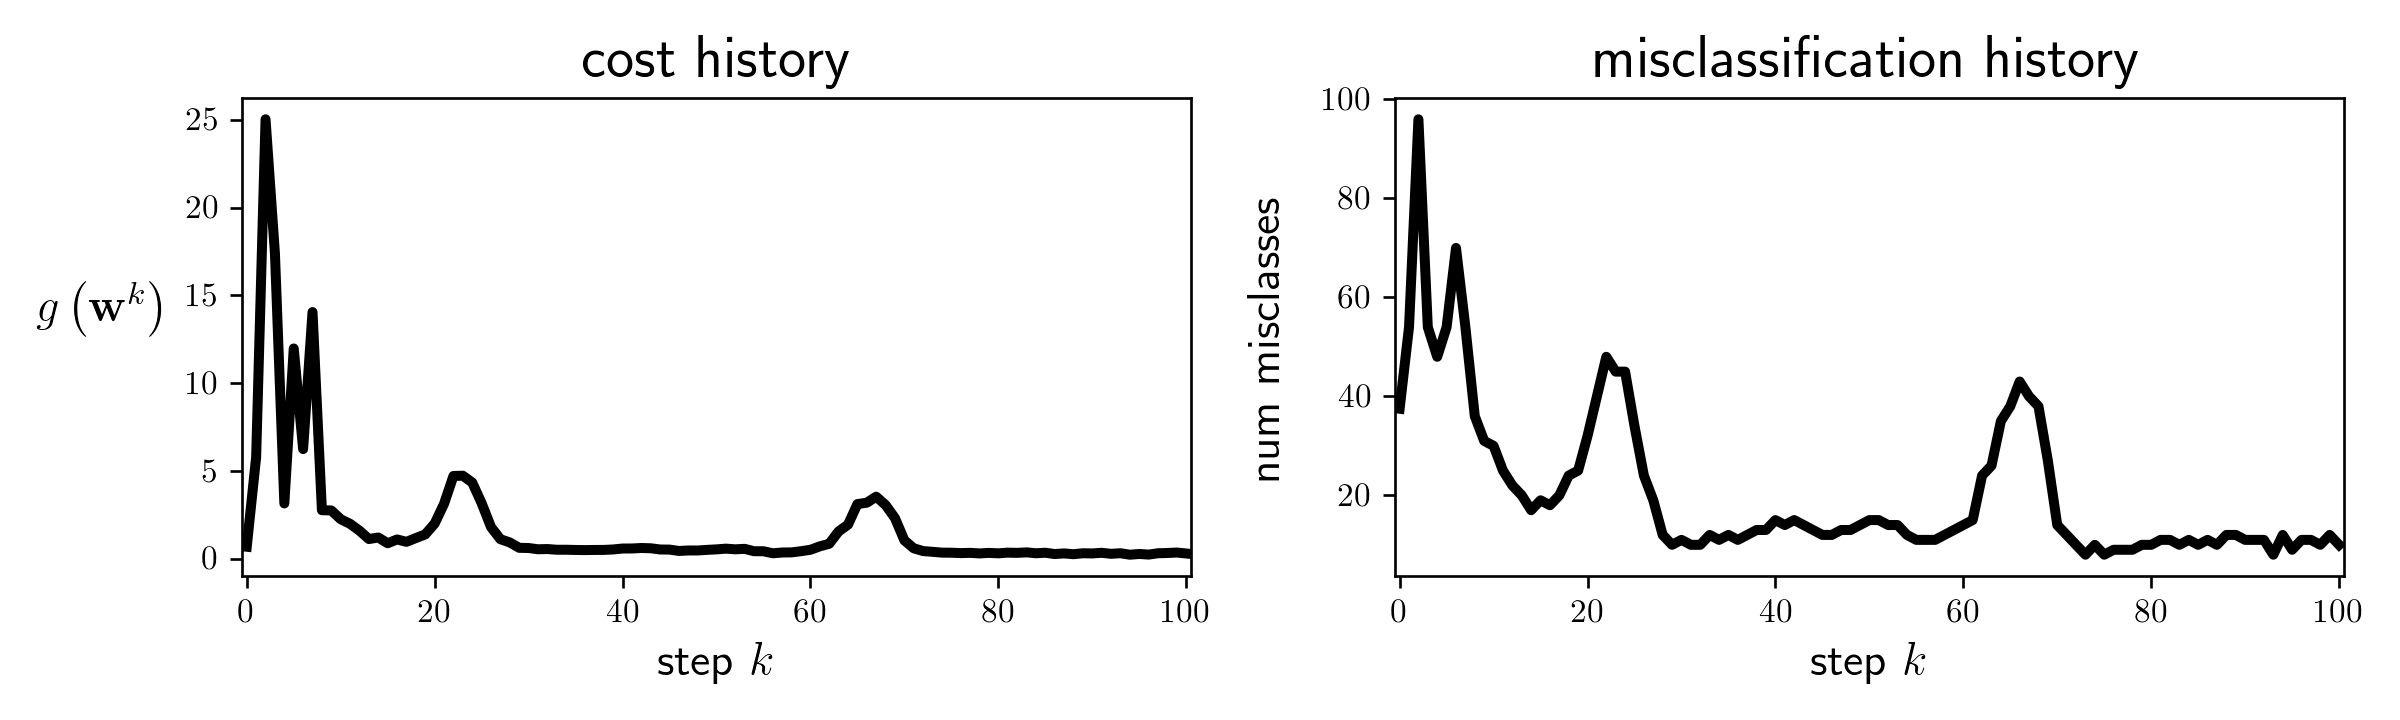

In [22]:
# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'stumps')

# mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,10,10,10,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 100,alpha_choice = 10**(0))

# plot histories
mylib.show_histories()

# Multiclass classification

In [21]:
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + '3_layercake_data.csv')
x = demo.x.T
y = demo.y[:,np.newaxis]

<IPython.core.display.Javascript object>


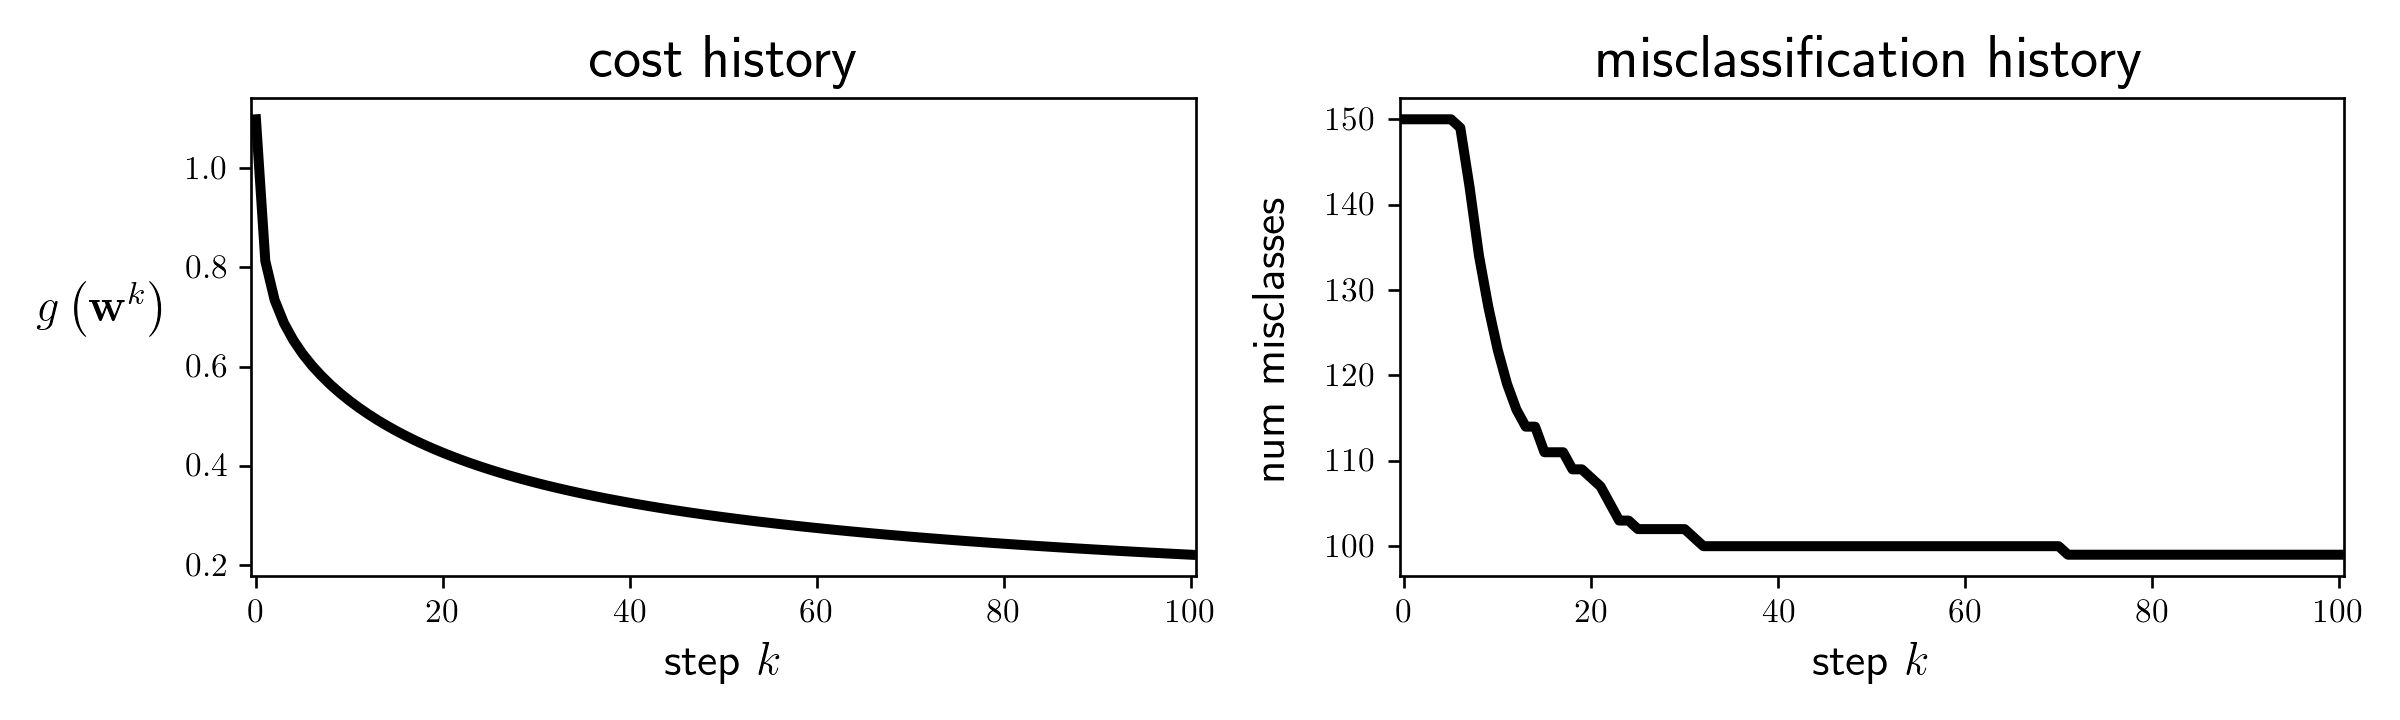

In [29]:
# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
# mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,10,10,3],activation = 'tanh')
mylib.choose_features(name = 'stumps',num_classifiers = 3)

# choose normalizer
mylib.choose_normalizer(name = 'none')

# choose cost
mylib.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib.fit(max_its = 100,alpha_choice = 10**(-2))

# plot histories
mylib.show_histories()

# Autoencoder

In [24]:
# import data
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
p = np.loadtxt(datapath + 'universal_autoencoder_manifold_0.csv',delimiter=',')
X = np.loadtxt(datapath + 'universal_autoencoder_samples_0.csv',delimiter=',')

# # scatter dataset
# fig = plt.figure(figsize = (9,4))
# gs = gridspec.GridSpec(1,1) 
# ax = plt.subplot(gs[0],aspect = 'equal'); 
# ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0);
# ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')
# plt.show()

<IPython.core.display.Javascript object>


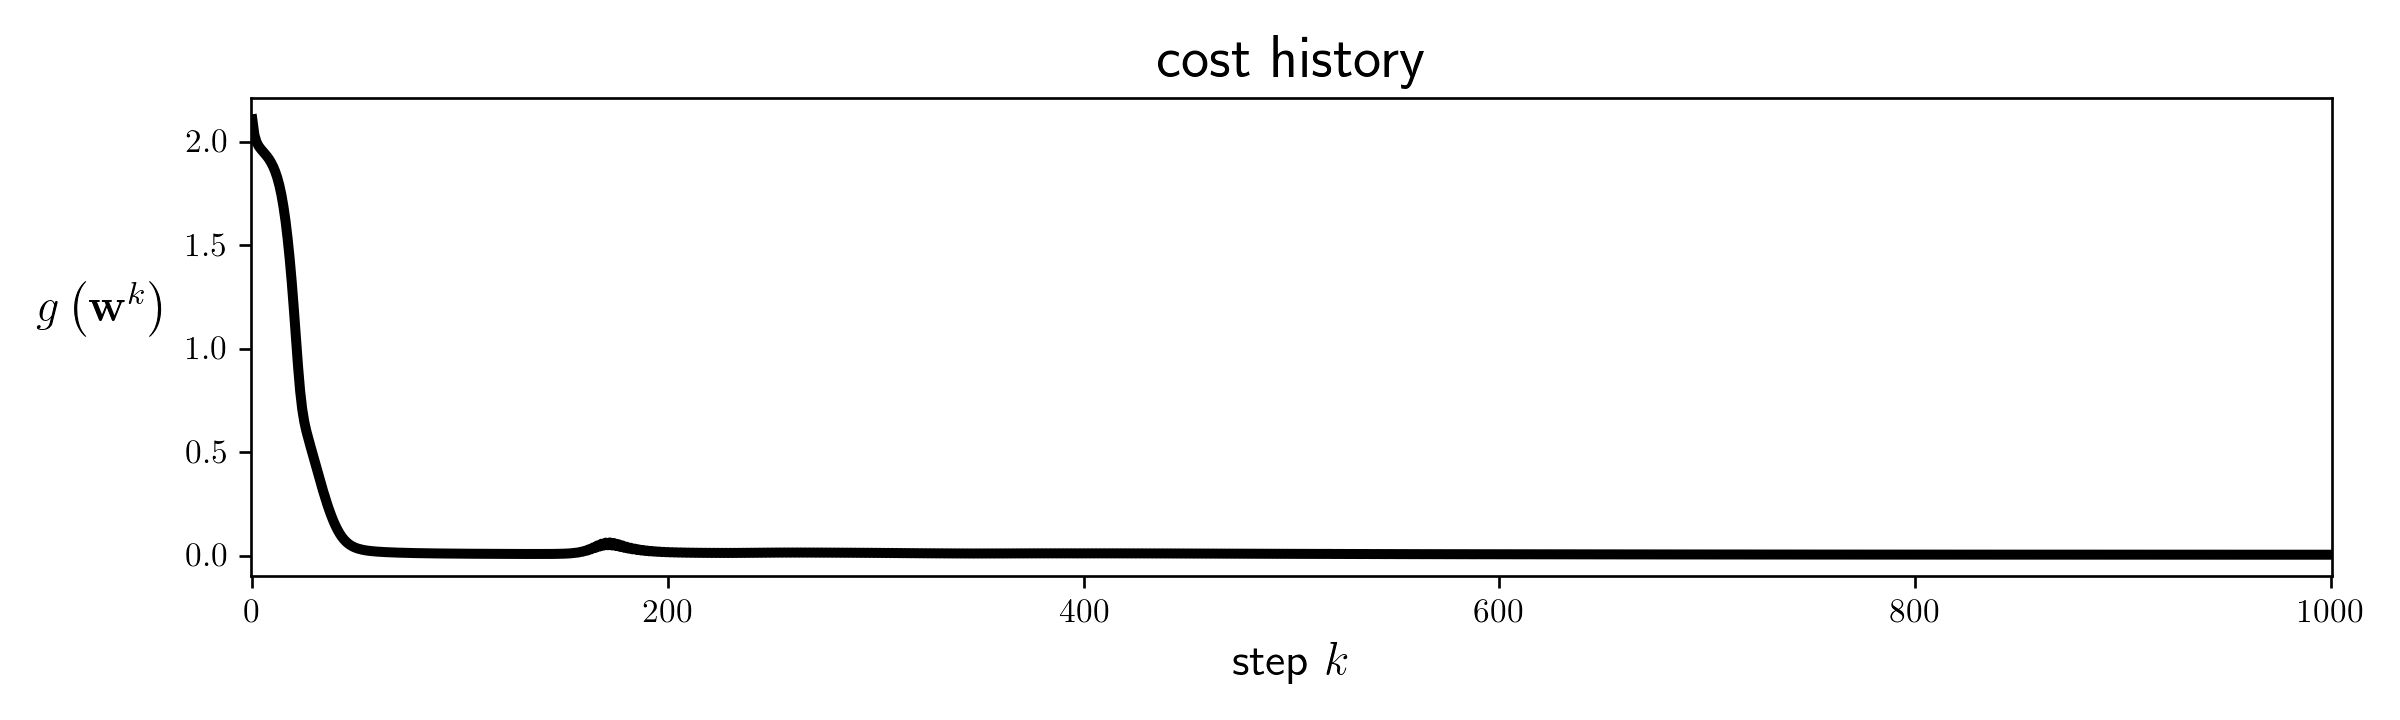

In [25]:
mylib = nonlib.library_v1.unsuperlearn_setup.Setup(X)

# choose features
mylib.choose_encoder(layer_sizes = [2,10,1],scale = 0.2)
mylib.choose_decoder(layer_sizes = [1,10,2],scale = 0.2)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'autoencoder')

# fit an optimization
mylib.fit(max_its = 1000,alpha_choice = 10**(-1))

# plot histories
mylib.show_histories()

<IPython.core.display.Javascript object>


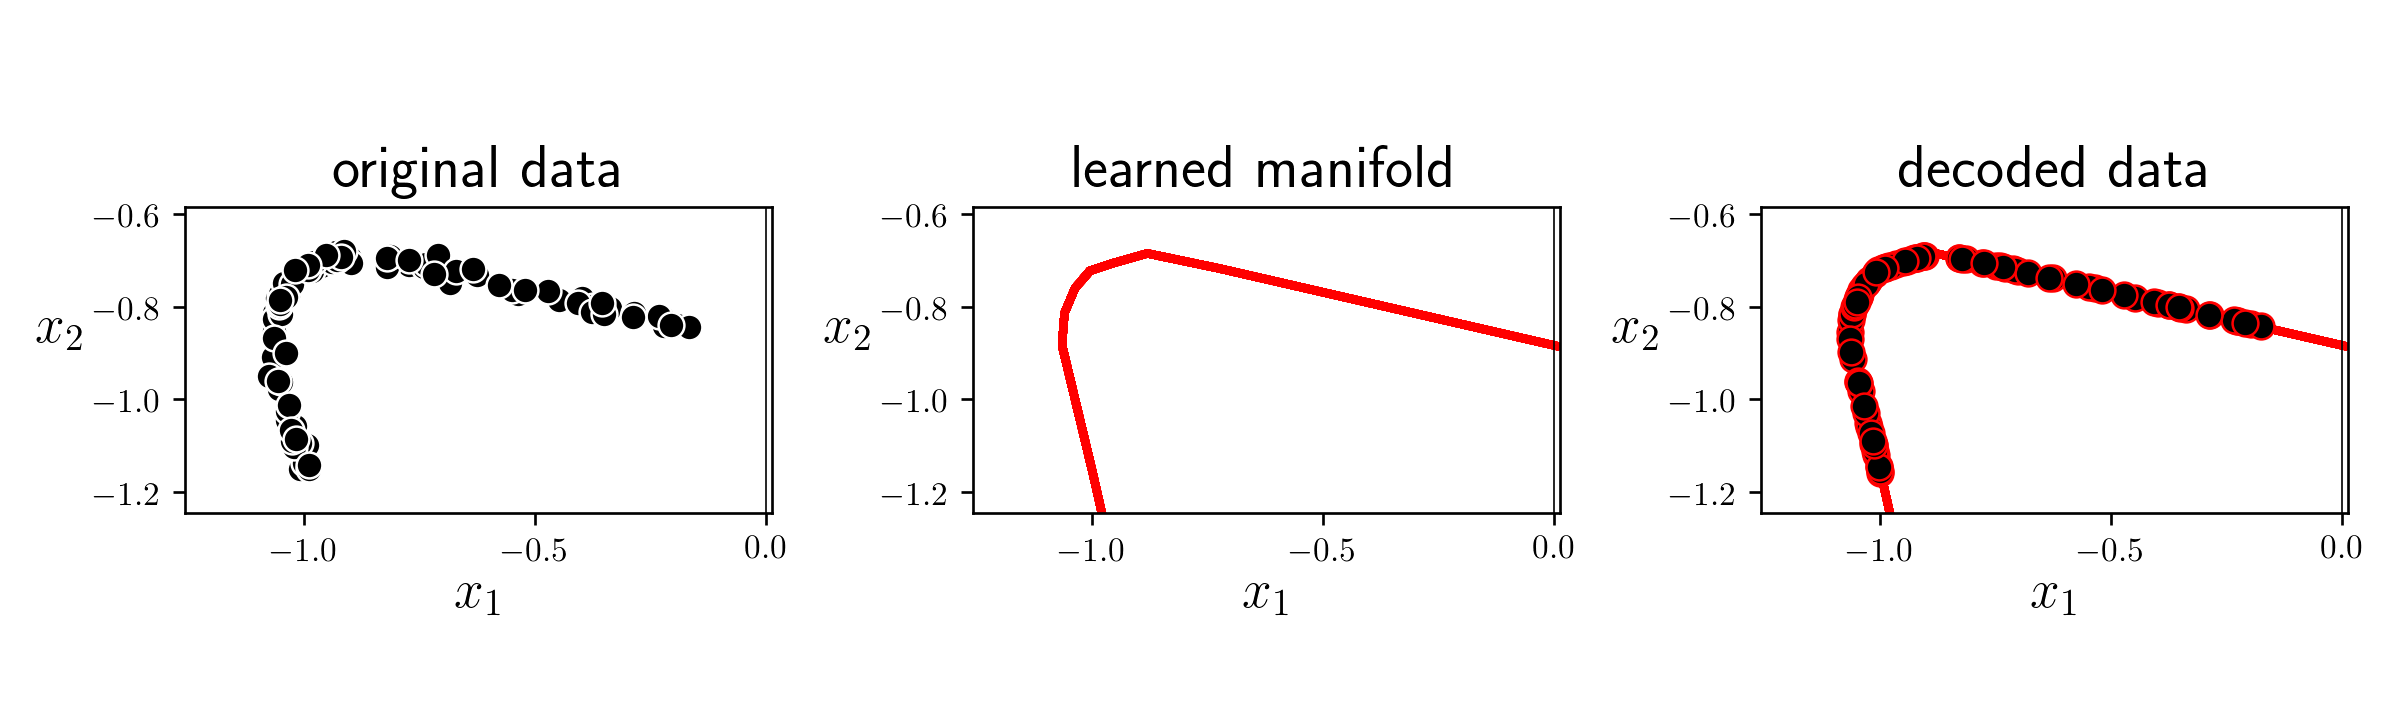

In [26]:
# plot results
nonlib.autoencoder_demos.show_encode_decode(X,mylib,projmap = False,scale = 10)